In [1]:
import os
import glob
import sys

import numpy as np
import pandas as pd
from scipy.misc import derivative
import scipy.integrate as intg
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant, RandomNormal

from sklearn.metrics import mean_squared_error
from astroNN.nn.layers import MCDropout

sys.path.append("/home/isidro/Documents/github/nnogada/")
from nnogada import Nnogada

np.random.seed(0)
%matplotlib inline

In [2]:
# absolute path to search all text files inside a specific folder
path = r'/home/isidro/Documents/github/model_independent_RC/data/MassModels/*.NFW.fix.REV.dat'
files = glob.glob(path)
print(files)

['/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2903.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3521.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC5055.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2841.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7331.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC6946.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2366.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC925.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3621.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2403.NFW.fix.REV.dat', '/home/isidro/Documents/github/model_independent_RC/data/Mas

In [3]:
for file in files:
    print(file)

len(files)

/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2903.NFW.fix.REV.dat
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3521.NFW.fix.REV.dat
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC5055.NFW.fix.REV.dat
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2841.NFW.fix.REV.dat
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC7331.NFW.fix.REV.dat
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC6946.NFW.fix.REV.dat
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2366.NFW.fix.REV.dat
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC925.NFW.fix.REV.dat
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3621.NFW.fix.REV.dat
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2403.NFW.fix.REV.dat
/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC3031.NFW.fix.REV.dat


17

In [4]:
def model_regression_dropout(num_nodes, num_hidden_layers):
    # Defeine Keras model for regression
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(batch_input_shape=((None, 1))))
    for _ in range(num_hidden_layers):
        model.add(Dense(units=num_nodes, activation='relu'))
        model.add(MCDropout(0.2))
    model.add(Dense(units=2, activation="linear"))
    return model

In [5]:
files[0]

'/home/isidro/Documents/github/model_independent_RC/data/MassModels/NGC2903.NFW.fix.REV.dat'

  0%|          | 0/8 [00:00<?, ?it/s]

Model 1/17
----------
X_train shape: (69, 1) | y_train shape: (69, 2) | x_val shape: (18, 1) | y_val shape: (18, 2)
Using CPU


100%|██████████| 8/8 [06:08<00:00, 45.52s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size          loss         score       time
0     4        150           8  19180.539062  19180.539062  11.434159
1     4        150           8  19180.539062  19180.539062  10.707484
2     4        200           8  19180.539062  19180.539062  11.724317
3     4        200          16  19180.539062  19180.539062   9.314642
4     4        150           8  19180.539062  19180.539062  12.007706
Epoch 1/1000
9/9 [==============================] - 2s 57ms/step - loss: 19334.0195 - val_loss: 19236.3965
Epoch 2/1000
9/9 [==============================] - 0s 14ms/step - loss: 19021.0625 - val_loss: 18705.3887
Epoch 3/1000
9/9 [==============================] - 0s 14ms/step - loss: 17892.7988 - val_loss: 16838.6250
Epoch 4/1000
9/9 [==============================] - 0s 11ms/step - loss: 14326.9717 - val_loss: 11215.5107
Epoch 5/1000
9/9 [==============================] - 0s 13ms/step - loss: 6730.2705 - val_loss: 2868.9795
Epoch 6/1

9/9 [==============================] - 0s 17ms/step - loss: 267.4521 - val_loss: 238.0033
Epoch 76/1000
9/9 [==============================] - 0s 14ms/step - loss: 262.7821 - val_loss: 254.1159
Epoch 77/1000
9/9 [==============================] - 0s 14ms/step - loss: 239.5647 - val_loss: 285.5418
Epoch 78/1000
9/9 [==============================] - 0s 11ms/step - loss: 291.4614 - val_loss: 258.6479
Epoch 79/1000
9/9 [==============================] - 0s 13ms/step - loss: 234.7593 - val_loss: 297.2886
Epoch 80/1000
9/9 [==============================] - 0s 14ms/step - loss: 276.4422 - val_loss: 226.1358
Epoch 81/1000
9/9 [==============================] - 0s 13ms/step - loss: 204.8457 - val_loss: 238.2350
Epoch 82/1000
9/9 [==============================] - 0s 14ms/step - loss: 269.2858 - val_loss: 219.8131
Epoch 83/1000
9/9 [==============================] - 0s 14ms/step - loss: 218.0018 - val_loss: 233.0119
Epoch 84/1000
9/9 [==============================] - 0s 14ms/step - loss: 230.

9/9 [==============================] - 0s 16ms/step - loss: 187.6755 - val_loss: 155.7833
Epoch 154/1000
9/9 [==============================] - 0s 14ms/step - loss: 262.7032 - val_loss: 166.7005
Epoch 155/1000
9/9 [==============================] - 0s 14ms/step - loss: 230.6074 - val_loss: 337.8908
Epoch 156/1000
9/9 [==============================] - 0s 14ms/step - loss: 203.8315 - val_loss: 207.2101
Epoch 157/1000
9/9 [==============================] - 0s 11ms/step - loss: 236.8978 - val_loss: 199.2204
Epoch 158/1000
9/9 [==============================] - 0s 11ms/step - loss: 206.3472 - val_loss: 230.2756
Epoch 159/1000
9/9 [==============================] - 0s 13ms/step - loss: 177.2762 - val_loss: 207.4900
Epoch 160/1000
9/9 [==============================] - 0s 14ms/step - loss: 243.3741 - val_loss: 245.3197
Epoch 161/1000
9/9 [==============================] - 0s 14ms/step - loss: 194.1465 - val_loss: 156.4461
Epoch 162/1000
9/9 [==============================] - 0s 12ms/step - l

9/9 [==============================] - 0s 9ms/step - loss: 211.9012 - val_loss: 147.2569
Epoch 232/1000
9/9 [==============================] - 0s 9ms/step - loss: 215.2552 - val_loss: 150.1856
Epoch 233/1000
9/9 [==============================] - 0s 9ms/step - loss: 204.5835 - val_loss: 301.5022
Epoch 234/1000
9/9 [==============================] - 0s 11ms/step - loss: 173.5330 - val_loss: 198.1304
Epoch 235/1000
9/9 [==============================] - 0s 10ms/step - loss: 107.0561 - val_loss: 267.2509
Epoch 236/1000
9/9 [==============================] - 0s 10ms/step - loss: 211.1635 - val_loss: 142.1436
Epoch 237/1000
9/9 [==============================] - 0s 10ms/step - loss: 193.6550 - val_loss: 173.0464
Epoch 238/1000
9/9 [==============================] - 0s 12ms/step - loss: 207.7373 - val_loss: 211.4280
Epoch 239/1000
9/9 [==============================] - 0s 13ms/step - loss: 210.3161 - val_loss: 220.8469
Epoch 240/1000
9/9 [==============================] - 0s 10ms/step - loss

9/9 [==============================] - 0s 14ms/step - loss: 203.2232 - val_loss: 143.7152
Epoch 310/1000
9/9 [==============================] - 0s 15ms/step - loss: 205.8262 - val_loss: 213.4228
Epoch 311/1000
9/9 [==============================] - 0s 15ms/step - loss: 233.6885 - val_loss: 184.0339
Epoch 312/1000
9/9 [==============================] - 0s 16ms/step - loss: 200.2019 - val_loss: 178.5991
Epoch 313/1000
9/9 [==============================] - 0s 13ms/step - loss: 192.0004 - val_loss: 69.6995
Epoch 314/1000
9/9 [==============================] - 0s 13ms/step - loss: 166.8368 - val_loss: 195.1708
Epoch 315/1000
9/9 [==============================] - 0s 13ms/step - loss: 165.5901 - val_loss: 204.2558
Epoch 316/1000
9/9 [==============================] - 0s 13ms/step - loss: 134.9297 - val_loss: 151.0760
Epoch 317/1000
9/9 [==============================] - 0s 14ms/step - loss: 222.3392 - val_loss: 169.9524
Epoch 318/1000
9/9 [==============================] - 0s 14ms/step - lo

9/9 [==============================] - 0s 15ms/step - loss: 166.3790 - val_loss: 178.4890
Epoch 388/1000
9/9 [==============================] - 0s 12ms/step - loss: 154.2747 - val_loss: 252.4080
Epoch 389/1000
9/9 [==============================] - 0s 11ms/step - loss: 132.1731 - val_loss: 102.5779
Epoch 390/1000
9/9 [==============================] - 0s 13ms/step - loss: 186.2846 - val_loss: 183.7340
Epoch 391/1000
9/9 [==============================] - 0s 15ms/step - loss: 167.4435 - val_loss: 342.0806
Epoch 392/1000
9/9 [==============================] - 0s 14ms/step - loss: 169.3768 - val_loss: 341.6158
Epoch 393/1000
9/9 [==============================] - 0s 14ms/step - loss: 148.3196 - val_loss: 137.8960
Epoch 394/1000
9/9 [==============================] - 0s 14ms/step - loss: 151.6368 - val_loss: 97.1348
Epoch 395/1000
9/9 [==============================] - 0s 11ms/step - loss: 207.3713 - val_loss: 174.9103
Epoch 396/1000
9/9 [==============================] - 0s 12ms/step - lo

9/9 [==============================] - 0s 18ms/step - loss: 150.7457 - val_loss: 208.1082
Epoch 466/1000
9/9 [==============================] - 0s 17ms/step - loss: 182.2052 - val_loss: 235.8872
Epoch 467/1000
9/9 [==============================] - 0s 13ms/step - loss: 162.8634 - val_loss: 66.8162
Epoch 468/1000
9/9 [==============================] - 0s 14ms/step - loss: 134.2678 - val_loss: 74.4269
Epoch 469/1000
9/9 [==============================] - 0s 14ms/step - loss: 168.1179 - val_loss: 118.3627
Epoch 470/1000
9/9 [==============================] - 0s 15ms/step - loss: 136.7494 - val_loss: 132.4812
Epoch 471/1000
9/9 [==============================] - 0s 14ms/step - loss: 123.6703 - val_loss: 133.2444
Epoch 472/1000
9/9 [==============================] - 0s 15ms/step - loss: 174.9539 - val_loss: 142.1509
Epoch 473/1000
9/9 [==============================] - 0s 14ms/step - loss: 118.5079 - val_loss: 128.0118
Epoch 474/1000
9/9 [==============================] - 0s 16ms/step - los

9/9 [==============================] - 0s 14ms/step - loss: 192.5769 - val_loss: 129.3195
Epoch 544/1000
9/9 [==============================] - 0s 13ms/step - loss: 143.0351 - val_loss: 138.4753
Epoch 545/1000
9/9 [==============================] - 0s 13ms/step - loss: 135.5337 - val_loss: 127.8990
Epoch 546/1000
9/9 [==============================] - 0s 14ms/step - loss: 119.3937 - val_loss: 168.0824
Epoch 547/1000
9/9 [==============================] - 0s 13ms/step - loss: 133.5178 - val_loss: 105.2721
Epoch 548/1000
9/9 [==============================] - 0s 14ms/step - loss: 154.7401 - val_loss: 122.1419
Epoch 549/1000
9/9 [==============================] - 0s 14ms/step - loss: 144.1135 - val_loss: 120.7203
Epoch 550/1000
9/9 [==============================] - 0s 12ms/step - loss: 153.1200 - val_loss: 103.8651
Epoch 551/1000
9/9 [==============================] - 0s 13ms/step - loss: 182.2201 - val_loss: 195.8562
Epoch 552/1000
9/9 [==============================] - 0s 14ms/step - l

9/9 [==============================] - 0s 14ms/step - loss: 140.8983 - val_loss: 154.0801
Epoch 622/1000
9/9 [==============================] - 0s 14ms/step - loss: 164.0003 - val_loss: 155.3218
Epoch 623/1000
9/9 [==============================] - 0s 15ms/step - loss: 178.9619 - val_loss: 189.0551
Epoch 624/1000
9/9 [==============================] - 0s 15ms/step - loss: 160.8837 - val_loss: 130.4139
Epoch 625/1000
9/9 [==============================] - 0s 10ms/step - loss: 143.7036 - val_loss: 122.5821
Epoch 626/1000
9/9 [==============================] - 0s 13ms/step - loss: 155.4192 - val_loss: 139.0873
Epoch 627/1000
9/9 [==============================] - 0s 13ms/step - loss: 168.2441 - val_loss: 59.8968
Epoch 628/1000
9/9 [==============================] - 0s 12ms/step - loss: 136.9747 - val_loss: 124.9912
Epoch 629/1000
9/9 [==============================] - 0s 16ms/step - loss: 140.7435 - val_loss: 112.9563
Epoch 630/1000
9/9 [==============================] - 0s 14ms/step - lo

9/9 [==============================] - 0s 13ms/step - loss: 129.9718 - val_loss: 119.9591
Epoch 700/1000
9/9 [==============================] - 0s 12ms/step - loss: 113.9396 - val_loss: 152.4623
Epoch 701/1000
9/9 [==============================] - 0s 13ms/step - loss: 135.9033 - val_loss: 153.2133
Epoch 702/1000
9/9 [==============================] - 0s 14ms/step - loss: 146.1891 - val_loss: 83.2423
Epoch 703/1000
9/9 [==============================] - 0s 14ms/step - loss: 157.6278 - val_loss: 182.2856
Epoch 704/1000
9/9 [==============================] - 0s 14ms/step - loss: 111.5031 - val_loss: 71.4667
Epoch 705/1000
9/9 [==============================] - 0s 13ms/step - loss: 122.4831 - val_loss: 132.8549
Epoch 706/1000
9/9 [==============================] - 0s 10ms/step - loss: 125.7934 - val_loss: 80.7117
Epoch 707/1000
9/9 [==============================] - 0s 10ms/step - loss: 147.0166 - val_loss: 233.3425
Epoch 708/1000
9/9 [==============================] - 0s 11ms/step - loss

9/9 [==============================] - 0s 13ms/step - loss: 144.1083 - val_loss: 157.2796
Epoch 778/1000
9/9 [==============================] - 0s 13ms/step - loss: 107.6116 - val_loss: 183.7190
Epoch 779/1000
9/9 [==============================] - 0s 13ms/step - loss: 149.7937 - val_loss: 152.2621
Epoch 780/1000
9/9 [==============================] - 0s 14ms/step - loss: 92.4964 - val_loss: 153.6204
Epoch 781/1000
9/9 [==============================] - 0s 14ms/step - loss: 136.8818 - val_loss: 98.8402
Epoch 782/1000
9/9 [==============================] - 0s 16ms/step - loss: 162.9680 - val_loss: 145.1600
Epoch 783/1000
9/9 [==============================] - 0s 13ms/step - loss: 135.5915 - val_loss: 202.1909
Epoch 784/1000
9/9 [==============================] - 0s 13ms/step - loss: 121.1685 - val_loss: 117.8920
Epoch 785/1000
9/9 [==============================] - 0s 15ms/step - loss: 89.7392 - val_loss: 129.0412
Epoch 786/1000
9/9 [==============================] - 0s 16ms/step - loss

9/9 [==============================] - 0s 14ms/step - loss: 131.9593 - val_loss: 150.0865
Epoch 856/1000
9/9 [==============================] - 0s 15ms/step - loss: 128.6132 - val_loss: 134.5690
Epoch 857/1000
9/9 [==============================] - 0s 14ms/step - loss: 79.6820 - val_loss: 80.8822
Epoch 858/1000
9/9 [==============================] - 0s 14ms/step - loss: 110.3531 - val_loss: 129.9386
Epoch 859/1000
9/9 [==============================] - 0s 14ms/step - loss: 175.9455 - val_loss: 192.7494
Epoch 860/1000
9/9 [==============================] - 0s 14ms/step - loss: 139.5733 - val_loss: 154.1419
Epoch 861/1000
9/9 [==============================] - 0s 13ms/step - loss: 124.9607 - val_loss: 87.1469
Epoch 862/1000
9/9 [==============================] - 0s 15ms/step - loss: 125.1222 - val_loss: 258.6740
Epoch 863/1000
9/9 [==============================] - 0s 16ms/step - loss: 139.3893 - val_loss: 166.2164
Epoch 864/1000
9/9 [==============================] - 0s 13ms/step - loss

9/9 [==============================] - 0s 13ms/step - loss: 118.2527 - val_loss: 85.0205
Epoch 934/1000
9/9 [==============================] - 0s 12ms/step - loss: 128.3094 - val_loss: 178.1069
Epoch 935/1000
9/9 [==============================] - 0s 10ms/step - loss: 157.1968 - val_loss: 111.6655
Epoch 936/1000
9/9 [==============================] - 0s 12ms/step - loss: 100.4819 - val_loss: 118.5590
Epoch 937/1000
9/9 [==============================] - 0s 13ms/step - loss: 115.1722 - val_loss: 105.4010
Epoch 938/1000
9/9 [==============================] - 0s 13ms/step - loss: 116.4165 - val_loss: 127.4722
Epoch 939/1000
9/9 [==============================] - 0s 13ms/step - loss: 112.3653 - val_loss: 207.6283
Epoch 940/1000
9/9 [==============================] - 0s 12ms/step - loss: 150.7272 - val_loss: 121.6161
Epoch 941/1000
9/9 [==============================] - 0s 13ms/step - loss: 132.4409 - val_loss: 112.9440
Epoch 942/1000
9/9 [==============================] - 0s 13ms/step - lo

16/16 [==============================] - 0s 2ms/step


100%|██████████| 8/8 [09:21<00:00, 70.20s/it]
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 2/17
----------
X_train shape: (80, 1) | y_train shape: (80, 2) | x_val shape: (20, 1) | y_val shape: (20, 2)
Using CPU


100%|██████████| 8/8 [05:34<00:00, 43.75s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size          loss         score       time
0     3        200           4  22446.796875  22446.796875  10.195440
1     3        200           4  22446.796875  22446.796875  10.277322
2     3        200           4  22446.796875  22446.796875   9.539392
3     3        200           4  22446.796875  22446.796875   9.653656
4     3        200           4  22446.796875  22446.796875  13.884866
Epoch 1/1000
20/20 [==============================] - 1s 19ms/step - loss: 21221.4395 - val_loss: 22027.8789
Epoch 2/1000
20/20 [==============================] - 0s 6ms/step - loss: 19411.5742 - val_loss: 17757.4961
Epoch 3/1000
20/20 [==============================] - 0s 5ms/step - loss: 11425.9385 - val_loss: 5064.9946
Epoch 4/1000
20/20 [==============================] - 0s 5ms/step - loss: 3423.6921 - val_loss: 1301.3687
Epoch 5/1000
20/20 [==============================] - 0s 6ms/step - loss: 2767.2698 - val_loss: 943.9624
Epoch 6

20/20 [==============================] - 0s 7ms/step - loss: 673.1622 - val_loss: 459.9862
Epoch 75/1000
20/20 [==============================] - 0s 5ms/step - loss: 711.9095 - val_loss: 333.1423
Epoch 76/1000
20/20 [==============================] - 0s 5ms/step - loss: 780.5276 - val_loss: 382.3397
Epoch 77/1000
20/20 [==============================] - 0s 6ms/step - loss: 752.3351 - val_loss: 352.1839
Epoch 78/1000
20/20 [==============================] - 0s 5ms/step - loss: 654.7657 - val_loss: 373.8032
Epoch 79/1000
20/20 [==============================] - 0s 6ms/step - loss: 726.6646 - val_loss: 413.9324
Epoch 80/1000
20/20 [==============================] - 0s 5ms/step - loss: 686.2523 - val_loss: 234.6627
Epoch 81/1000
20/20 [==============================] - 0s 6ms/step - loss: 627.2821 - val_loss: 218.9111
Epoch 82/1000
20/20 [==============================] - 0s 6ms/step - loss: 539.5466 - val_loss: 333.7047
Epoch 83/1000
20/20 [==============================] - 0s 7ms/step - 

20/20 [==============================] - 0s 6ms/step - loss: 555.0243 - val_loss: 303.2922
Epoch 152/1000
20/20 [==============================] - 0s 6ms/step - loss: 622.5056 - val_loss: 325.4236
Epoch 153/1000
20/20 [==============================] - 0s 7ms/step - loss: 537.5849 - val_loss: 324.7585
Epoch 154/1000
20/20 [==============================] - 0s 6ms/step - loss: 574.0214 - val_loss: 250.6313
Epoch 155/1000
20/20 [==============================] - 0s 5ms/step - loss: 596.7594 - val_loss: 253.2375
Epoch 156/1000
20/20 [==============================] - 0s 5ms/step - loss: 495.6130 - val_loss: 233.5019
Epoch 157/1000
20/20 [==============================] - 0s 6ms/step - loss: 566.1229 - val_loss: 247.4691
Epoch 158/1000
20/20 [==============================] - 0s 6ms/step - loss: 554.4018 - val_loss: 348.2108
Epoch 159/1000
20/20 [==============================] - 0s 6ms/step - loss: 600.1374 - val_loss: 327.4898
Epoch 160/1000
20/20 [==============================] - 0s 5m

20/20 [==============================] - 0s 7ms/step - loss: 508.7589 - val_loss: 266.1671
Epoch 229/1000
20/20 [==============================] - 0s 6ms/step - loss: 560.4856 - val_loss: 349.9752
Epoch 230/1000
20/20 [==============================] - 0s 6ms/step - loss: 498.7915 - val_loss: 196.7693
Epoch 231/1000
20/20 [==============================] - 0s 5ms/step - loss: 594.9059 - val_loss: 276.5433
Epoch 232/1000
20/20 [==============================] - 0s 5ms/step - loss: 443.3345 - val_loss: 323.1351
Epoch 233/1000
20/20 [==============================] - 0s 6ms/step - loss: 632.8625 - val_loss: 367.4030
Epoch 234/1000
20/20 [==============================] - 0s 5ms/step - loss: 599.8162 - val_loss: 223.7347
Epoch 235/1000
20/20 [==============================] - 0s 6ms/step - loss: 460.6562 - val_loss: 200.8559
Epoch 236/1000
20/20 [==============================] - 0s 6ms/step - loss: 480.5164 - val_loss: 335.8862
Epoch 237/1000
20/20 [==============================] - 0s 7m

20/20 [==============================] - 0s 7ms/step - loss: 503.3923 - val_loss: 339.8505
Epoch 306/1000
20/20 [==============================] - 0s 6ms/step - loss: 478.9060 - val_loss: 252.6664
Epoch 307/1000
20/20 [==============================] - 0s 5ms/step - loss: 471.5923 - val_loss: 156.4485
Epoch 308/1000
20/20 [==============================] - 0s 5ms/step - loss: 484.1404 - val_loss: 162.4045
Epoch 309/1000
20/20 [==============================] - 0s 5ms/step - loss: 506.9649 - val_loss: 376.2598
Epoch 310/1000
20/20 [==============================] - 0s 5ms/step - loss: 420.7057 - val_loss: 99.7319
Epoch 311/1000
20/20 [==============================] - 0s 5ms/step - loss: 510.9118 - val_loss: 194.6046
Epoch 312/1000
20/20 [==============================] - 0s 6ms/step - loss: 523.2959 - val_loss: 375.8523
Epoch 313/1000
20/20 [==============================] - 0s 6ms/step - loss: 504.7095 - val_loss: 274.0782
Epoch 314/1000
20/20 [==============================] - 0s 6ms

20/20 [==============================] - 0s 7ms/step - loss: 485.0845 - val_loss: 203.5754
Epoch 383/1000
20/20 [==============================] - 0s 6ms/step - loss: 420.8882 - val_loss: 210.1713
Epoch 384/1000
20/20 [==============================] - 0s 5ms/step - loss: 451.4505 - val_loss: 153.0181
Epoch 385/1000
20/20 [==============================] - 0s 5ms/step - loss: 417.0500 - val_loss: 154.0155
Epoch 386/1000
20/20 [==============================] - 0s 5ms/step - loss: 422.3341 - val_loss: 330.2343
Epoch 387/1000
20/20 [==============================] - 0s 5ms/step - loss: 356.9431 - val_loss: 145.5361
Epoch 388/1000
20/20 [==============================] - 0s 5ms/step - loss: 389.6004 - val_loss: 204.9970
Epoch 389/1000
20/20 [==============================] - 0s 6ms/step - loss: 435.5377 - val_loss: 235.8850
Epoch 390/1000
20/20 [==============================] - 0s 5ms/step - loss: 347.9498 - val_loss: 244.0931
Epoch 391/1000
20/20 [==============================] - 0s 5m

20/20 [==============================] - 0s 6ms/step - loss: 317.2070 - val_loss: 112.0350
Epoch 460/1000
20/20 [==============================] - 0s 7ms/step - loss: 342.6205 - val_loss: 226.2984
Epoch 461/1000
20/20 [==============================] - 0s 5ms/step - loss: 309.0999 - val_loss: 126.5758
Epoch 462/1000
20/20 [==============================] - 0s 6ms/step - loss: 222.4472 - val_loss: 201.7224
Epoch 463/1000
20/20 [==============================] - 0s 5ms/step - loss: 343.7872 - val_loss: 202.4775
Epoch 464/1000
20/20 [==============================] - 0s 5ms/step - loss: 367.1395 - val_loss: 178.0689
Epoch 465/1000
20/20 [==============================] - 0s 5ms/step - loss: 339.7466 - val_loss: 132.2113
Epoch 466/1000
20/20 [==============================] - 0s 5ms/step - loss: 391.9149 - val_loss: 245.0690
Epoch 467/1000
20/20 [==============================] - 0s 5ms/step - loss: 279.6031 - val_loss: 174.0243
Epoch 468/1000
20/20 [==============================] - 0s 5m

20/20 [==============================] - 0s 6ms/step - loss: 305.4990 - val_loss: 165.3005
Epoch 537/1000
20/20 [==============================] - 0s 6ms/step - loss: 286.6386 - val_loss: 134.4250
Epoch 538/1000
20/20 [==============================] - 0s 5ms/step - loss: 342.9700 - val_loss: 325.3575
Epoch 539/1000
20/20 [==============================] - 0s 5ms/step - loss: 398.6723 - val_loss: 191.7597
Epoch 540/1000
20/20 [==============================] - 0s 5ms/step - loss: 249.5114 - val_loss: 156.3325
Epoch 541/1000
20/20 [==============================] - 0s 6ms/step - loss: 304.5010 - val_loss: 297.5998
Epoch 542/1000
20/20 [==============================] - 0s 6ms/step - loss: 264.2477 - val_loss: 304.3154
Epoch 543/1000
20/20 [==============================] - 0s 6ms/step - loss: 257.1863 - val_loss: 254.2985
Epoch 544/1000
20/20 [==============================] - 0s 6ms/step - loss: 330.0593 - val_loss: 127.7146
Epoch 545/1000
20/20 [==============================] - 0s 6m

20/20 [==============================] - 0s 5ms/step - loss: 277.6893 - val_loss: 107.9441
Epoch 614/1000
20/20 [==============================] - 0s 5ms/step - loss: 225.9444 - val_loss: 173.7766
Epoch 615/1000
20/20 [==============================] - 0s 5ms/step - loss: 328.9351 - val_loss: 220.9797
Epoch 616/1000
20/20 [==============================] - 0s 5ms/step - loss: 297.0778 - val_loss: 346.8280
Epoch 617/1000
20/20 [==============================] - 0s 5ms/step - loss: 309.3231 - val_loss: 170.0655
Epoch 618/1000
20/20 [==============================] - 0s 4ms/step - loss: 341.4523 - val_loss: 279.9260
Epoch 619/1000
20/20 [==============================] - 0s 4ms/step - loss: 237.0401 - val_loss: 192.0036
Epoch 620/1000
20/20 [==============================] - 0s 4ms/step - loss: 239.0775 - val_loss: 99.2148
Epoch 621/1000
20/20 [==============================] - 0s 4ms/step - loss: 254.5360 - val_loss: 107.3917
Epoch 622/1000
20/20 [==============================] - 0s 4ms

20/20 [==============================] - 0s 6ms/step - loss: 332.5318 - val_loss: 229.3531
Epoch 691/1000
20/20 [==============================] - 0s 6ms/step - loss: 186.7605 - val_loss: 212.1170
Epoch 692/1000
20/20 [==============================] - 0s 6ms/step - loss: 249.2771 - val_loss: 180.6535
Epoch 693/1000
20/20 [==============================] - 0s 6ms/step - loss: 250.4760 - val_loss: 99.5177
Epoch 694/1000
20/20 [==============================] - 0s 5ms/step - loss: 278.0983 - val_loss: 253.1496
Epoch 695/1000
20/20 [==============================] - 0s 4ms/step - loss: 154.3836 - val_loss: 174.6711
Epoch 696/1000
20/20 [==============================] - 0s 5ms/step - loss: 177.3531 - val_loss: 185.0317
Epoch 697/1000
20/20 [==============================] - 0s 6ms/step - loss: 194.7707 - val_loss: 106.4709
Epoch 698/1000
20/20 [==============================] - 0s 6ms/step - loss: 221.2618 - val_loss: 211.8856
Epoch 699/1000
20/20 [==============================] - 0s 6ms

20/20 [==============================] - 0s 5ms/step - loss: 312.8577 - val_loss: 200.3676
Epoch 768/1000
20/20 [==============================] - 0s 5ms/step - loss: 264.8077 - val_loss: 129.3522
Epoch 769/1000
20/20 [==============================] - 0s 5ms/step - loss: 275.3828 - val_loss: 158.5875
Epoch 770/1000
20/20 [==============================] - 0s 4ms/step - loss: 355.3465 - val_loss: 175.2423
Epoch 771/1000
20/20 [==============================] - 0s 5ms/step - loss: 273.1895 - val_loss: 157.1419
Epoch 772/1000
20/20 [==============================] - 0s 4ms/step - loss: 227.9709 - val_loss: 112.6750
Epoch 773/1000
20/20 [==============================] - 0s 4ms/step - loss: 135.7764 - val_loss: 169.2671
Epoch 774/1000
20/20 [==============================] - 0s 4ms/step - loss: 222.4410 - val_loss: 130.1448
Epoch 775/1000
20/20 [==============================] - 0s 5ms/step - loss: 211.5959 - val_loss: 162.0513
Epoch 776/1000
20/20 [==============================] - 0s 6m

20/20 [==============================] - 0s 6ms/step - loss: 178.9300 - val_loss: 124.3631
Epoch 845/1000
20/20 [==============================] - 0s 7ms/step - loss: 204.8920 - val_loss: 185.4508
Epoch 846/1000
20/20 [==============================] - 0s 6ms/step - loss: 126.7924 - val_loss: 192.7428
Epoch 847/1000
20/20 [==============================] - 0s 6ms/step - loss: 247.9851 - val_loss: 154.7769
Epoch 848/1000
20/20 [==============================] - 0s 5ms/step - loss: 216.7089 - val_loss: 100.7949
Epoch 849/1000
20/20 [==============================] - 0s 6ms/step - loss: 190.0693 - val_loss: 381.9173
Epoch 850/1000
20/20 [==============================] - 0s 6ms/step - loss: 254.3144 - val_loss: 77.5067
Epoch 851/1000
20/20 [==============================] - 0s 5ms/step - loss: 274.7369 - val_loss: 76.1944
Epoch 852/1000
20/20 [==============================] - 0s 6ms/step - loss: 166.2804 - val_loss: 153.3042
Epoch 853/1000
20/20 [==============================] - 0s 7ms/

20/20 [==============================] - 0s 6ms/step - loss: 196.5442 - val_loss: 127.1925
Epoch 922/1000
20/20 [==============================] - 0s 6ms/step - loss: 131.8384 - val_loss: 102.1662
Epoch 923/1000
20/20 [==============================] - 0s 6ms/step - loss: 167.6999 - val_loss: 84.2892
Epoch 924/1000
20/20 [==============================] - 0s 8ms/step - loss: 190.5521 - val_loss: 121.0998
Epoch 925/1000
20/20 [==============================] - 0s 7ms/step - loss: 226.8535 - val_loss: 197.6715
Epoch 926/1000
20/20 [==============================] - 0s 6ms/step - loss: 231.5198 - val_loss: 109.0630
Epoch 927/1000
20/20 [==============================] - 0s 5ms/step - loss: 175.0221 - val_loss: 89.3042
Epoch 928/1000
20/20 [==============================] - 0s 6ms/step - loss: 143.2868 - val_loss: 140.5263
Epoch 929/1000
20/20 [==============================] - 0s 6ms/step - loss: 171.7514 - val_loss: 102.8318
Epoch 930/1000
20/20 [==============================] - 0s 6ms/

20/20 [==============================] - 0s 7ms/step - loss: 193.3971 - val_loss: 141.6688
Epoch 999/1000
20/20 [==============================] - 0s 7ms/step - loss: 244.3626 - val_loss: 89.9144
Epoch 1000/1000
16/16 [==============================] - 0s 2ms/step


/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "

  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 3/17
----------
X_train shape: (159, 1) | y_train shape: (159, 2) | x_val shape: (40, 1) | y_val shape: (40, 2)
Using CPU


100%|██████████| 8/8 [09:22<00:00, 70.32s/it]

100%|██████████| 8/8 [06:47<00:00, 56.30s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size          loss         score       time
0     4        100           4  18549.964844  18549.964844  16.705464
1     4        100           4  18549.964844  18549.964844  13.872076
2     4        100           4  18549.964844  18549.964844  15.057521
3     4        100           4  18549.964844  18549.964844  16.675902
4     4        100           4  18549.964844  18549.964844  16.723420
Epoch 1/1000
40/40 [==============================] - 2s 9ms/step - loss: 18243.1367 - val_loss: 16422.8965
Epoch 2/1000
40/40 [==============================] - 0s 4ms/step - loss: 7854.7432 - val_loss: 2784.2122
Epoch 3/1000
40/40 [==============================] - 0s 4ms/step - loss: 1693.0334 - val_loss: 2267.1897
Epoch 4/1000
40/40 [==============================] - 0s 4ms/step - loss: 1199.6638 - val_loss: 1185.8218
Epoch 5/1000
40/40 [==============================] - 0s 4ms/step - loss: 773.5807 - val_loss: 1127.2717
Epoch 6/100

40/40 [==============================] - 0s 4ms/step - loss: 287.9468 - val_loss: 579.1797
Epoch 75/1000
40/40 [==============================] - 0s 4ms/step - loss: 329.7749 - val_loss: 548.5110
Epoch 76/1000
40/40 [==============================] - 0s 3ms/step - loss: 280.0554 - val_loss: 390.0120
Epoch 77/1000
40/40 [==============================] - 0s 3ms/step - loss: 275.1573 - val_loss: 420.4589
Epoch 78/1000
40/40 [==============================] - 0s 3ms/step - loss: 280.1478 - val_loss: 387.6914
Epoch 79/1000
40/40 [==============================] - 0s 3ms/step - loss: 313.1718 - val_loss: 499.2389
Epoch 80/1000
40/40 [==============================] - 0s 3ms/step - loss: 290.8711 - val_loss: 512.7119
Epoch 81/1000
40/40 [==============================] - 0s 3ms/step - loss: 316.5110 - val_loss: 454.9352
Epoch 82/1000
40/40 [==============================] - 0s 3ms/step - loss: 310.3745 - val_loss: 487.0558
Epoch 83/1000
40/40 [==============================] - 0s 3ms/step - 

40/40 [==============================] - 0s 4ms/step - loss: 208.4436 - val_loss: 511.5747
Epoch 152/1000
40/40 [==============================] - 0s 4ms/step - loss: 243.9368 - val_loss: 293.8074
Epoch 153/1000
40/40 [==============================] - 0s 4ms/step - loss: 258.2898 - val_loss: 460.0325
Epoch 154/1000
40/40 [==============================] - 0s 4ms/step - loss: 270.1488 - val_loss: 448.5717
Epoch 155/1000
40/40 [==============================] - 0s 4ms/step - loss: 262.6631 - val_loss: 574.1185
Epoch 156/1000
40/40 [==============================] - 0s 4ms/step - loss: 257.4399 - val_loss: 347.9598
Epoch 157/1000
40/40 [==============================] - 0s 4ms/step - loss: 197.5899 - val_loss: 404.9201
Epoch 158/1000
40/40 [==============================] - 0s 4ms/step - loss: 234.5254 - val_loss: 353.8163
Epoch 159/1000
40/40 [==============================] - 0s 4ms/step - loss: 254.4855 - val_loss: 585.9729
Epoch 160/1000
40/40 [==============================] - 0s 4m

40/40 [==============================] - 0s 4ms/step - loss: 234.2632 - val_loss: 417.1591
Epoch 229/1000
40/40 [==============================] - 0s 4ms/step - loss: 202.4731 - val_loss: 394.6719
Epoch 230/1000
40/40 [==============================] - 0s 4ms/step - loss: 222.8375 - val_loss: 388.0316
Epoch 231/1000
40/40 [==============================] - 0s 4ms/step - loss: 210.4720 - val_loss: 383.8377
Epoch 232/1000
40/40 [==============================] - 0s 4ms/step - loss: 191.8802 - val_loss: 364.8581
Epoch 233/1000
40/40 [==============================] - 0s 4ms/step - loss: 205.5404 - val_loss: 319.1625
Epoch 234/1000
40/40 [==============================] - 0s 5ms/step - loss: 232.2426 - val_loss: 335.8066
Epoch 235/1000
40/40 [==============================] - 0s 4ms/step - loss: 210.1345 - val_loss: 334.3933
Epoch 236/1000
40/40 [==============================] - 0s 4ms/step - loss: 215.6500 - val_loss: 362.1743
Epoch 237/1000
40/40 [==============================] - 0s 4m

40/40 [==============================] - 0s 4ms/step - loss: 204.3649 - val_loss: 289.5135
Epoch 306/1000
40/40 [==============================] - 0s 4ms/step - loss: 153.6909 - val_loss: 443.0012
Epoch 307/1000
40/40 [==============================] - 0s 4ms/step - loss: 220.7523 - val_loss: 334.2783
Epoch 308/1000
40/40 [==============================] - 0s 4ms/step - loss: 179.5690 - val_loss: 341.2162
Epoch 309/1000
40/40 [==============================] - 0s 4ms/step - loss: 153.6293 - val_loss: 283.5252
Epoch 310/1000
40/40 [==============================] - 0s 4ms/step - loss: 218.2761 - val_loss: 317.4150
Epoch 311/1000
40/40 [==============================] - 0s 4ms/step - loss: 180.9147 - val_loss: 261.0127
Epoch 312/1000
40/40 [==============================] - 0s 4ms/step - loss: 197.8745 - val_loss: 323.9505
Epoch 313/1000
40/40 [==============================] - 0s 4ms/step - loss: 201.8084 - val_loss: 282.6435
Epoch 314/1000
40/40 [==============================] - 0s 4m

40/40 [==============================] - 0s 4ms/step - loss: 171.7318 - val_loss: 349.6270
Epoch 383/1000
40/40 [==============================] - 0s 4ms/step - loss: 178.1009 - val_loss: 320.1602
Epoch 384/1000
40/40 [==============================] - 0s 4ms/step - loss: 166.3036 - val_loss: 369.5534
Epoch 385/1000
40/40 [==============================] - 0s 4ms/step - loss: 212.5137 - val_loss: 354.7561
Epoch 386/1000
40/40 [==============================] - 0s 4ms/step - loss: 155.5890 - val_loss: 260.1405
Epoch 387/1000
40/40 [==============================] - 0s 4ms/step - loss: 161.7524 - val_loss: 218.6832
Epoch 388/1000
40/40 [==============================] - 0s 4ms/step - loss: 157.4323 - val_loss: 272.8821
Epoch 389/1000
40/40 [==============================] - 0s 4ms/step - loss: 174.1075 - val_loss: 264.4927
Epoch 390/1000
40/40 [==============================] - 0s 4ms/step - loss: 190.1021 - val_loss: 359.8583
Epoch 391/1000
40/40 [==============================] - 0s 4m

40/40 [==============================] - 0s 4ms/step - loss: 139.4946 - val_loss: 323.0598
Epoch 460/1000
40/40 [==============================] - 0s 4ms/step - loss: 146.3292 - val_loss: 307.6871
Epoch 461/1000
40/40 [==============================] - 0s 4ms/step - loss: 203.6250 - val_loss: 358.2516
Epoch 462/1000
40/40 [==============================] - 0s 4ms/step - loss: 178.4796 - val_loss: 282.1105
Epoch 463/1000
40/40 [==============================] - 0s 4ms/step - loss: 160.3388 - val_loss: 277.6101
Epoch 464/1000
40/40 [==============================] - 0s 4ms/step - loss: 131.3537 - val_loss: 361.8024
Epoch 465/1000
40/40 [==============================] - 0s 4ms/step - loss: 199.2001 - val_loss: 245.8992
Epoch 466/1000
40/40 [==============================] - 0s 4ms/step - loss: 177.2247 - val_loss: 374.9700
Epoch 467/1000
40/40 [==============================] - 0s 4ms/step - loss: 169.7093 - val_loss: 343.9674
Epoch 468/1000
40/40 [==============================] - 0s 4m

40/40 [==============================] - 0s 4ms/step - loss: 161.1580 - val_loss: 372.0042
Epoch 537/1000
40/40 [==============================] - 0s 4ms/step - loss: 181.2170 - val_loss: 329.5334
Epoch 538/1000
40/40 [==============================] - 0s 4ms/step - loss: 132.5304 - val_loss: 282.8267
Epoch 539/1000
40/40 [==============================] - 0s 4ms/step - loss: 171.5614 - val_loss: 335.9781
Epoch 540/1000
40/40 [==============================] - 0s 4ms/step - loss: 176.1855 - val_loss: 322.4092
Epoch 541/1000
40/40 [==============================] - 0s 4ms/step - loss: 155.6116 - val_loss: 267.1552
Epoch 542/1000
40/40 [==============================] - 0s 4ms/step - loss: 172.8468 - val_loss: 325.3083
Epoch 543/1000
40/40 [==============================] - 0s 4ms/step - loss: 165.0100 - val_loss: 281.1602
Epoch 544/1000
40/40 [==============================] - 0s 4ms/step - loss: 155.5857 - val_loss: 306.9316
Epoch 545/1000
40/40 [==============================] - 0s 4m

40/40 [==============================] - 0s 3ms/step - loss: 165.4792 - val_loss: 350.9353
Epoch 614/1000
40/40 [==============================] - 0s 3ms/step - loss: 149.9753 - val_loss: 293.3293
Epoch 615/1000
40/40 [==============================] - 0s 3ms/step - loss: 162.5705 - val_loss: 291.6402
Epoch 616/1000
40/40 [==============================] - 0s 3ms/step - loss: 196.7351 - val_loss: 357.2366
Epoch 617/1000
40/40 [==============================] - 0s 3ms/step - loss: 145.2678 - val_loss: 319.3341
Epoch 618/1000
40/40 [==============================] - 0s 3ms/step - loss: 175.7573 - val_loss: 337.7984
Epoch 619/1000
40/40 [==============================] - 0s 4ms/step - loss: 202.3249 - val_loss: 282.3827
Epoch 620/1000
40/40 [==============================] - 0s 4ms/step - loss: 173.0161 - val_loss: 345.6035
Epoch 621/1000
40/40 [==============================] - 0s 4ms/step - loss: 169.6980 - val_loss: 359.7804
Epoch 622/1000
40/40 [==============================] - 0s 4m

40/40 [==============================] - 0s 4ms/step - loss: 164.2368 - val_loss: 318.8822
Epoch 691/1000
40/40 [==============================] - 0s 4ms/step - loss: 139.3503 - val_loss: 324.1534
Epoch 692/1000
40/40 [==============================] - 0s 4ms/step - loss: 165.1934 - val_loss: 325.3778
Epoch 693/1000
40/40 [==============================] - 0s 4ms/step - loss: 137.1264 - val_loss: 323.4201
Epoch 694/1000
40/40 [==============================] - 0s 4ms/step - loss: 136.0882 - val_loss: 451.1894
Epoch 695/1000
40/40 [==============================] - 0s 4ms/step - loss: 141.8628 - val_loss: 311.9885
Epoch 696/1000
40/40 [==============================] - 0s 6ms/step - loss: 127.0456 - val_loss: 216.4784
Epoch 697/1000
40/40 [==============================] - 0s 5ms/step - loss: 136.0437 - val_loss: 273.4633
Epoch 698/1000
40/40 [==============================] - 0s 5ms/step - loss: 145.0590 - val_loss: 251.4648
Epoch 699/1000
40/40 [==============================] - 0s 3m

40/40 [==============================] - 0s 3ms/step - loss: 132.1066 - val_loss: 214.3973
Epoch 768/1000
40/40 [==============================] - 0s 4ms/step - loss: 136.1273 - val_loss: 290.6414
Epoch 769/1000
40/40 [==============================] - 0s 3ms/step - loss: 144.1840 - val_loss: 310.6219
Epoch 770/1000
40/40 [==============================] - 0s 3ms/step - loss: 214.5409 - val_loss: 335.0329
Epoch 771/1000
40/40 [==============================] - 0s 3ms/step - loss: 167.7119 - val_loss: 295.1600
Epoch 772/1000
40/40 [==============================] - 0s 3ms/step - loss: 179.6969 - val_loss: 469.0757
Epoch 773/1000
40/40 [==============================] - 0s 3ms/step - loss: 173.5659 - val_loss: 376.6891
Epoch 774/1000
40/40 [==============================] - 0s 3ms/step - loss: 166.8069 - val_loss: 288.3367
Epoch 775/1000
40/40 [==============================] - 0s 3ms/step - loss: 167.3615 - val_loss: 229.3904
Epoch 776/1000
40/40 [==============================] - 0s 3m

40/40 [==============================] - 0s 4ms/step - loss: 156.8749 - val_loss: 356.7136
Epoch 845/1000
40/40 [==============================] - 0s 4ms/step - loss: 139.0443 - val_loss: 244.5723
Epoch 846/1000
40/40 [==============================] - 0s 4ms/step - loss: 133.9239 - val_loss: 348.6841
Epoch 847/1000
40/40 [==============================] - 0s 4ms/step - loss: 158.0419 - val_loss: 344.8624
Epoch 848/1000
40/40 [==============================] - 0s 5ms/step - loss: 143.2217 - val_loss: 354.4858
Epoch 849/1000
40/40 [==============================] - 0s 4ms/step - loss: 170.4510 - val_loss: 338.3228
Epoch 850/1000
40/40 [==============================] - 0s 4ms/step - loss: 163.5390 - val_loss: 343.7302
Epoch 851/1000
40/40 [==============================] - 0s 5ms/step - loss: 159.6821 - val_loss: 317.7717
Epoch 852/1000
40/40 [==============================] - 0s 4ms/step - loss: 135.2980 - val_loss: 354.9429
Epoch 853/1000
40/40 [==============================] - 0s 5m

40/40 [==============================] - 0s 4ms/step - loss: 132.5382 - val_loss: 368.0817
Epoch 922/1000
40/40 [==============================] - 0s 4ms/step - loss: 137.2720 - val_loss: 231.1220
Epoch 923/1000
40/40 [==============================] - 0s 4ms/step - loss: 132.6153 - val_loss: 365.4135
Epoch 924/1000
40/40 [==============================] - 0s 4ms/step - loss: 107.1657 - val_loss: 227.2655
Epoch 925/1000
40/40 [==============================] - 0s 4ms/step - loss: 134.3939 - val_loss: 323.6632
Epoch 926/1000
40/40 [==============================] - 0s 4ms/step - loss: 127.6212 - val_loss: 336.4761
Epoch 927/1000
40/40 [==============================] - 0s 4ms/step - loss: 170.2761 - val_loss: 245.1357
Epoch 928/1000
40/40 [==============================] - 0s 3ms/step - loss: 133.9818 - val_loss: 374.2617
Epoch 929/1000
40/40 [==============================] - 0s 4ms/step - loss: 152.2792 - val_loss: 309.9207
Epoch 930/1000
40/40 [==============================] - 0s 4m

40/40 [==============================] - 0s 4ms/step - loss: 109.2898 - val_loss: 253.3066
Epoch 999/1000
40/40 [==============================] - 0s 5ms/step - loss: 128.1713 - val_loss: 318.7570
Epoch 1000/1000
16/16 [==============================] - 0s 2ms/step


/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 4/17
----------
X_train shape: (112, 1) | y_train shape: (112, 2) | x_val shape: (29, 1) | y_val shape: (29, 2)
Using CPU


100%|██████████| 8/8 [04:08<00:00, 29.10s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size          loss         score       time
0     3        200          16  43683.320312  43683.320312   6.245171
1     4        200           8  43683.320312  43683.320312   9.734829
2     3        200          16  43683.320312  43683.320312   6.194814
3     3        200          16  43683.320312  43683.320312   6.362627
4     3        200           4  43683.320312  43683.320312  11.600530
Epoch 1/1000
7/7 [==============================] - 1s 37ms/step - loss: 43618.4766 - val_loss: 43776.2227
Epoch 2/1000
7/7 [==============================] - 0s 11ms/step - loss: 43281.1055 - val_loss: 43316.4141
Epoch 3/1000
7/7 [==============================] - 0s 11ms/step - loss: 42469.4570 - val_loss: 42341.4492
Epoch 4/1000
7/7 [==============================] - 0s 11ms/step - loss: 40783.4336 - val_loss: 40082.8984
Epoch 5/1000
7/7 [==============================] - 0s 11ms/step - loss: 37554.0352 - val_loss: 35908.7539
Epoch 6

7/7 [==============================] - 0s 9ms/step - loss: 317.9562 - val_loss: 225.3765
Epoch 76/1000
7/7 [==============================] - 0s 9ms/step - loss: 259.3762 - val_loss: 249.3039
Epoch 77/1000
7/7 [==============================] - 0s 12ms/step - loss: 283.6755 - val_loss: 351.2392
Epoch 78/1000
7/7 [==============================] - 0s 9ms/step - loss: 306.4615 - val_loss: 266.5007
Epoch 79/1000
7/7 [==============================] - 0s 11ms/step - loss: 293.8915 - val_loss: 339.0502
Epoch 80/1000
7/7 [==============================] - 0s 11ms/step - loss: 357.2981 - val_loss: 302.2637
Epoch 81/1000
7/7 [==============================] - 0s 11ms/step - loss: 250.8575 - val_loss: 321.8124
Epoch 82/1000
7/7 [==============================] - 0s 11ms/step - loss: 314.1371 - val_loss: 246.5424
Epoch 83/1000
7/7 [==============================] - 0s 10ms/step - loss: 318.0288 - val_loss: 251.5751
Epoch 84/1000
7/7 [==============================] - 0s 9ms/step - loss: 267.3779

Epoch 154/1000
7/7 [==============================] - 0s 9ms/step - loss: 293.4221 - val_loss: 364.9147
Epoch 155/1000
7/7 [==============================] - 0s 11ms/step - loss: 281.9390 - val_loss: 260.1512
Epoch 156/1000
7/7 [==============================] - 0s 9ms/step - loss: 380.1426 - val_loss: 193.9162
Epoch 157/1000
7/7 [==============================] - 0s 11ms/step - loss: 315.0768 - val_loss: 342.8152
Epoch 158/1000
7/7 [==============================] - 0s 9ms/step - loss: 351.7707 - val_loss: 253.6516
Epoch 159/1000
7/7 [==============================] - 0s 11ms/step - loss: 306.8451 - val_loss: 155.4173
Epoch 160/1000
7/7 [==============================] - 0s 9ms/step - loss: 333.2042 - val_loss: 286.7387
Epoch 161/1000
7/7 [==============================] - 0s 9ms/step - loss: 250.0194 - val_loss: 327.8608
Epoch 162/1000
7/7 [==============================] - 0s 11ms/step - loss: 272.3720 - val_loss: 320.4751
Epoch 163/1000
7/7 [==============================] - 0s 11m

7/7 [==============================] - 0s 11ms/step - loss: 228.1401 - val_loss: 303.5403
Epoch 233/1000
7/7 [==============================] - 0s 9ms/step - loss: 248.7202 - val_loss: 314.5385
Epoch 234/1000
7/7 [==============================] - 0s 9ms/step - loss: 274.9530 - val_loss: 252.0659
Epoch 235/1000
7/7 [==============================] - 0s 11ms/step - loss: 335.5086 - val_loss: 339.2455
Epoch 236/1000
7/7 [==============================] - 0s 11ms/step - loss: 245.3308 - val_loss: 330.0200
Epoch 237/1000
7/7 [==============================] - 0s 9ms/step - loss: 307.2298 - val_loss: 241.2818
Epoch 238/1000
7/7 [==============================] - 0s 9ms/step - loss: 250.1804 - val_loss: 292.5760
Epoch 239/1000
7/7 [==============================] - 0s 9ms/step - loss: 290.3334 - val_loss: 326.7455
Epoch 240/1000
7/7 [==============================] - 0s 11ms/step - loss: 265.8327 - val_loss: 224.7461
Epoch 241/1000
7/7 [==============================] - 0s 9ms/step - loss: 2

7/7 [==============================] - 0s 11ms/step - loss: 286.7788 - val_loss: 253.4919
Epoch 311/1000
7/7 [==============================] - 0s 9ms/step - loss: 266.2153 - val_loss: 311.5780
Epoch 312/1000
7/7 [==============================] - 0s 11ms/step - loss: 290.1558 - val_loss: 197.6838
Epoch 313/1000
7/7 [==============================] - 0s 11ms/step - loss: 273.4377 - val_loss: 199.8070
Epoch 314/1000
7/7 [==============================] - 0s 11ms/step - loss: 274.6829 - val_loss: 217.8450
Epoch 315/1000
7/7 [==============================] - 0s 9ms/step - loss: 263.7853 - val_loss: 351.2864
Epoch 316/1000
7/7 [==============================] - 0s 11ms/step - loss: 283.5285 - val_loss: 133.7567
Epoch 317/1000
7/7 [==============================] - 0s 9ms/step - loss: 269.5817 - val_loss: 211.1303
Epoch 318/1000
7/7 [==============================] - 0s 9ms/step - loss: 234.4054 - val_loss: 208.6336
Epoch 319/1000
7/7 [==============================] - 0s 11ms/step - loss:

7/7 [==============================] - 0s 12ms/step - loss: 261.1123 - val_loss: 299.8401
Epoch 389/1000
7/7 [==============================] - 0s 9ms/step - loss: 261.6832 - val_loss: 227.4852
Epoch 390/1000
7/7 [==============================] - 0s 9ms/step - loss: 319.3572 - val_loss: 374.1349
Epoch 391/1000
7/7 [==============================] - 0s 10ms/step - loss: 271.5644 - val_loss: 430.2557
Epoch 392/1000
7/7 [==============================] - 0s 9ms/step - loss: 214.3573 - val_loss: 445.9457
Epoch 393/1000
7/7 [==============================] - 0s 10ms/step - loss: 248.2576 - val_loss: 200.6278
Epoch 394/1000
7/7 [==============================] - 0s 11ms/step - loss: 409.8237 - val_loss: 378.4525
Epoch 395/1000
7/7 [==============================] - 0s 9ms/step - loss: 306.5942 - val_loss: 121.4889
Epoch 396/1000
7/7 [==============================] - 0s 9ms/step - loss: 299.5342 - val_loss: 193.2688
Epoch 397/1000
7/7 [==============================] - 0s 10ms/step - loss: 

7/7 [==============================] - 0s 8ms/step - loss: 299.2300 - val_loss: 224.5951
Epoch 467/1000
7/7 [==============================] - 0s 8ms/step - loss: 233.6650 - val_loss: 260.5854
Epoch 468/1000
7/7 [==============================] - 0s 8ms/step - loss: 185.1025 - val_loss: 237.7224
Epoch 469/1000
7/7 [==============================] - 0s 9ms/step - loss: 300.8500 - val_loss: 206.1214
Epoch 470/1000
7/7 [==============================] - 0s 8ms/step - loss: 299.6206 - val_loss: 226.5451
Epoch 471/1000
7/7 [==============================] - 0s 8ms/step - loss: 237.4895 - val_loss: 283.8858
Epoch 472/1000
7/7 [==============================] - 0s 9ms/step - loss: 263.9514 - val_loss: 236.0381
Epoch 473/1000
7/7 [==============================] - 0s 8ms/step - loss: 258.6328 - val_loss: 174.2660
Epoch 474/1000
7/7 [==============================] - 0s 8ms/step - loss: 217.7840 - val_loss: 199.3833
Epoch 475/1000
7/7 [==============================] - 0s 8ms/step - loss: 217.7

7/7 [==============================] - 0s 9ms/step - loss: 304.3172 - val_loss: 372.3190
Epoch 545/1000
7/7 [==============================] - 0s 11ms/step - loss: 238.4867 - val_loss: 293.3713
Epoch 546/1000
7/7 [==============================] - 0s 9ms/step - loss: 253.9035 - val_loss: 239.2766
Epoch 547/1000
7/7 [==============================] - 0s 10ms/step - loss: 250.9353 - val_loss: 248.5172
Epoch 548/1000
7/7 [==============================] - 0s 9ms/step - loss: 246.8170 - val_loss: 271.5646
Epoch 549/1000
7/7 [==============================] - 0s 9ms/step - loss: 271.2653 - val_loss: 376.8143
Epoch 550/1000
7/7 [==============================] - 0s 9ms/step - loss: 238.7261 - val_loss: 163.6852
Epoch 551/1000
7/7 [==============================] - 0s 11ms/step - loss: 252.5737 - val_loss: 176.5418
Epoch 552/1000
7/7 [==============================] - 0s 9ms/step - loss: 208.3036 - val_loss: 218.4125
Epoch 553/1000
7/7 [==============================] - 0s 9ms/step - loss: 32

7/7 [==============================] - 0s 10ms/step - loss: 268.1488 - val_loss: 201.5396
Epoch 623/1000
7/7 [==============================] - 0s 9ms/step - loss: 270.6264 - val_loss: 299.9047
Epoch 624/1000
7/7 [==============================] - 0s 11ms/step - loss: 278.4445 - val_loss: 226.6515
Epoch 625/1000
7/7 [==============================] - 0s 11ms/step - loss: 270.3654 - val_loss: 180.8685
Epoch 626/1000
7/7 [==============================] - 0s 9ms/step - loss: 254.6750 - val_loss: 259.4216
Epoch 627/1000
7/7 [==============================] - 0s 9ms/step - loss: 294.5014 - val_loss: 225.1012
Epoch 628/1000
7/7 [==============================] - 0s 12ms/step - loss: 239.1646 - val_loss: 227.2575
Epoch 629/1000
7/7 [==============================] - 0s 11ms/step - loss: 232.9534 - val_loss: 264.5480
Epoch 630/1000
7/7 [==============================] - 0s 10ms/step - loss: 245.3595 - val_loss: 327.4970
Epoch 631/1000
7/7 [==============================] - 0s 10ms/step - loss

7/7 [==============================] - 0s 10ms/step - loss: 233.8833 - val_loss: 244.3701
Epoch 701/1000
7/7 [==============================] - 0s 8ms/step - loss: 234.7603 - val_loss: 233.1968
Epoch 702/1000
7/7 [==============================] - 0s 10ms/step - loss: 281.3128 - val_loss: 297.7919
Epoch 703/1000
7/7 [==============================] - 0s 10ms/step - loss: 264.4111 - val_loss: 184.3074
Epoch 704/1000
7/7 [==============================] - 0s 10ms/step - loss: 257.9052 - val_loss: 233.0429
Epoch 705/1000
7/7 [==============================] - 0s 10ms/step - loss: 245.5562 - val_loss: 274.2616
Epoch 706/1000
7/7 [==============================] - 0s 11ms/step - loss: 242.1694 - val_loss: 239.4528
Epoch 707/1000
7/7 [==============================] - 0s 11ms/step - loss: 242.6292 - val_loss: 293.6270
Epoch 708/1000
7/7 [==============================] - 0s 10ms/step - loss: 267.9984 - val_loss: 179.7730
Epoch 709/1000
7/7 [==============================] - 0s 8ms/step - los

7/7 [==============================] - 0s 9ms/step - loss: 296.3815 - val_loss: 200.1212
Epoch 779/1000
7/7 [==============================] - 0s 9ms/step - loss: 249.9461 - val_loss: 225.9908
Epoch 780/1000
7/7 [==============================] - 0s 11ms/step - loss: 297.9866 - val_loss: 173.1185
Epoch 781/1000
7/7 [==============================] - 0s 10ms/step - loss: 283.3371 - val_loss: 280.0674
Epoch 782/1000
7/7 [==============================] - 0s 10ms/step - loss: 223.4264 - val_loss: 160.4146
Epoch 783/1000
7/7 [==============================] - 0s 11ms/step - loss: 247.3657 - val_loss: 214.1983
Epoch 784/1000
7/7 [==============================] - 0s 11ms/step - loss: 259.3703 - val_loss: 228.0839
Epoch 785/1000
7/7 [==============================] - 0s 9ms/step - loss: 229.5892 - val_loss: 240.3465
Epoch 786/1000
7/7 [==============================] - 0s 9ms/step - loss: 211.3961 - val_loss: 223.6742
Epoch 787/1000
7/7 [==============================] - 0s 10ms/step - loss:

7/7 [==============================] - 0s 9ms/step - loss: 209.9373 - val_loss: 207.8146
Epoch 857/1000
7/7 [==============================] - 0s 11ms/step - loss: 284.2277 - val_loss: 176.7572
Epoch 858/1000
7/7 [==============================] - 0s 11ms/step - loss: 237.0842 - val_loss: 241.3703
Epoch 859/1000
7/7 [==============================] - 0s 9ms/step - loss: 241.6036 - val_loss: 248.8031
Epoch 860/1000
7/7 [==============================] - 0s 9ms/step - loss: 186.8119 - val_loss: 198.8283
Epoch 861/1000
7/7 [==============================] - 0s 11ms/step - loss: 217.3460 - val_loss: 240.4623
Epoch 862/1000
7/7 [==============================] - 0s 11ms/step - loss: 263.7365 - val_loss: 265.1124
Epoch 863/1000
7/7 [==============================] - 0s 11ms/step - loss: 222.5000 - val_loss: 155.6217
Epoch 864/1000
7/7 [==============================] - 0s 11ms/step - loss: 248.1457 - val_loss: 272.3752
Epoch 865/1000
7/7 [==============================] - 0s 10ms/step - loss

7/7 [==============================] - 0s 9ms/step - loss: 239.4162 - val_loss: 192.0547
Epoch 935/1000
7/7 [==============================] - 0s 11ms/step - loss: 248.4568 - val_loss: 343.5174
Epoch 936/1000
7/7 [==============================] - 0s 9ms/step - loss: 235.1200 - val_loss: 248.4449
Epoch 937/1000
7/7 [==============================] - 0s 11ms/step - loss: 199.6594 - val_loss: 215.9287
Epoch 938/1000
7/7 [==============================] - 0s 9ms/step - loss: 238.7128 - val_loss: 212.4526
Epoch 939/1000
7/7 [==============================] - 0s 9ms/step - loss: 268.7857 - val_loss: 368.1929
Epoch 940/1000
7/7 [==============================] - 0s 11ms/step - loss: 214.7533 - val_loss: 286.3613
Epoch 941/1000
7/7 [==============================] - 0s 10ms/step - loss: 216.9055 - val_loss: 232.2489
Epoch 942/1000
7/7 [==============================] - 0s 11ms/step - loss: 218.6514 - val_loss: 264.3442
Epoch 943/1000
7/7 [==============================] - 0s 9ms/step - loss: 

16/16 [==============================] - 0s 3ms/step


/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "

  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 5/17
----------
X_train shape: (84, 1) | y_train shape: (84, 2) | x_val shape: (21, 1) | y_val shape: (21, 2)
Using CPU



100%|██████████| 8/8 [06:55<00:00, 51.98s/it]

100%|██████████| 8/8 [03:06<00:00, 23.87s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size          loss         score      time
0     3        200           4  30764.578125  30764.578125  6.040789
1     4        200           8  30764.578125  30764.578125  5.649266
2     4        200           8  30764.578125  30764.578125  6.350553
3     4        200           8  30764.578125  30764.578125  4.805130
4     4        200           4  30764.578125  30764.578125  6.326908
Epoch 1/1000
21/21 [==============================] - 1s 7ms/step - loss: 30807.0664 - val_loss: 30078.1152
Epoch 2/1000
21/21 [==============================] - 0s 3ms/step - loss: 27626.0098 - val_loss: 22760.5723
Epoch 3/1000
21/21 [==============================] - 0s 3ms/step - loss: 12667.8418 - val_loss: 2680.4519
Epoch 4/1000
21/21 [==============================] - 0s 3ms/step - loss: 2407.7825 - val_loss: 1268.1143
Epoch 5/1000
21/21 [==============================] - 0s 3ms/step - loss: 1555.8265 - val_loss: 1020.7264
Epoch 6/1000


21/21 [==============================] - 0s 3ms/step - loss: 208.1808 - val_loss: 257.5847
Epoch 75/1000
21/21 [==============================] - 0s 3ms/step - loss: 154.6933 - val_loss: 207.2191
Epoch 76/1000
21/21 [==============================] - 0s 3ms/step - loss: 233.0941 - val_loss: 197.2120
Epoch 77/1000
21/21 [==============================] - 0s 3ms/step - loss: 221.7765 - val_loss: 96.2844
Epoch 78/1000
21/21 [==============================] - 0s 3ms/step - loss: 263.0606 - val_loss: 148.0490
Epoch 79/1000
21/21 [==============================] - 0s 3ms/step - loss: 205.0634 - val_loss: 149.2127
Epoch 80/1000
21/21 [==============================] - 0s 3ms/step - loss: 174.9164 - val_loss: 160.1204
Epoch 81/1000
21/21 [==============================] - 0s 3ms/step - loss: 241.4132 - val_loss: 173.4869
Epoch 82/1000
21/21 [==============================] - 0s 3ms/step - loss: 217.6396 - val_loss: 132.5039
Epoch 83/1000
21/21 [==============================] - 0s 3ms/step - l

21/21 [==============================] - 0s 3ms/step - loss: 235.9880 - val_loss: 251.2928
Epoch 152/1000
21/21 [==============================] - 0s 3ms/step - loss: 211.9372 - val_loss: 242.8385
Epoch 153/1000
21/21 [==============================] - 0s 3ms/step - loss: 207.9796 - val_loss: 115.6697
Epoch 154/1000
21/21 [==============================] - 0s 3ms/step - loss: 238.9724 - val_loss: 150.9061
Epoch 155/1000
21/21 [==============================] - 0s 3ms/step - loss: 210.2950 - val_loss: 234.4392
Epoch 156/1000
21/21 [==============================] - 0s 3ms/step - loss: 220.6320 - val_loss: 154.6925
Epoch 157/1000
21/21 [==============================] - 0s 3ms/step - loss: 187.2766 - val_loss: 215.9710
Epoch 158/1000
21/21 [==============================] - 0s 3ms/step - loss: 193.4966 - val_loss: 207.0056
Epoch 159/1000
21/21 [==============================] - 0s 3ms/step - loss: 173.4113 - val_loss: 145.1221
Epoch 160/1000
21/21 [==============================] - 0s 3m

21/21 [==============================] - 0s 3ms/step - loss: 181.9281 - val_loss: 126.2252
Epoch 229/1000
21/21 [==============================] - 0s 3ms/step - loss: 156.3156 - val_loss: 158.3040
Epoch 230/1000
21/21 [==============================] - 0s 3ms/step - loss: 194.6887 - val_loss: 221.7684
Epoch 231/1000
21/21 [==============================] - 0s 3ms/step - loss: 208.7011 - val_loss: 116.0349
Epoch 232/1000
21/21 [==============================] - 0s 3ms/step - loss: 153.6156 - val_loss: 115.6238
Epoch 233/1000
21/21 [==============================] - 0s 3ms/step - loss: 160.2274 - val_loss: 98.9303
Epoch 234/1000
21/21 [==============================] - 0s 3ms/step - loss: 201.4598 - val_loss: 283.2902
Epoch 235/1000
21/21 [==============================] - 0s 3ms/step - loss: 169.7893 - val_loss: 224.3660
Epoch 236/1000
21/21 [==============================] - 0s 3ms/step - loss: 209.6016 - val_loss: 186.5772
Epoch 237/1000
21/21 [==============================] - 0s 3ms

21/21 [==============================] - 0s 3ms/step - loss: 188.1869 - val_loss: 180.0063
Epoch 306/1000
21/21 [==============================] - 0s 3ms/step - loss: 164.5317 - val_loss: 152.6988
Epoch 307/1000
21/21 [==============================] - 0s 3ms/step - loss: 232.7865 - val_loss: 145.4882
Epoch 308/1000
21/21 [==============================] - 0s 3ms/step - loss: 171.6870 - val_loss: 130.1587
Epoch 309/1000
21/21 [==============================] - 0s 3ms/step - loss: 127.5394 - val_loss: 142.1344
Epoch 310/1000
21/21 [==============================] - 0s 3ms/step - loss: 186.5249 - val_loss: 167.6508
Epoch 311/1000
21/21 [==============================] - 0s 3ms/step - loss: 202.6148 - val_loss: 313.0200
Epoch 312/1000
21/21 [==============================] - 0s 3ms/step - loss: 147.0910 - val_loss: 216.1954
Epoch 313/1000
21/21 [==============================] - 0s 3ms/step - loss: 192.1487 - val_loss: 109.6611
Epoch 314/1000
21/21 [==============================] - 0s 3m

21/21 [==============================] - 0s 3ms/step - loss: 212.2906 - val_loss: 162.1378
Epoch 383/1000
21/21 [==============================] - 0s 3ms/step - loss: 143.9391 - val_loss: 124.6245
Epoch 384/1000
21/21 [==============================] - 0s 3ms/step - loss: 155.6997 - val_loss: 238.2408
Epoch 385/1000
21/21 [==============================] - 0s 3ms/step - loss: 162.9088 - val_loss: 133.4367
Epoch 386/1000
21/21 [==============================] - 0s 3ms/step - loss: 144.6968 - val_loss: 180.0722
Epoch 387/1000
21/21 [==============================] - 0s 3ms/step - loss: 150.6339 - val_loss: 151.0278
Epoch 388/1000
21/21 [==============================] - 0s 3ms/step - loss: 210.7191 - val_loss: 92.4672
Epoch 389/1000
21/21 [==============================] - 0s 3ms/step - loss: 178.0584 - val_loss: 252.1649
Epoch 390/1000
21/21 [==============================] - 0s 3ms/step - loss: 177.3784 - val_loss: 246.8201
Epoch 391/1000
21/21 [==============================] - 0s 3ms

21/21 [==============================] - 0s 3ms/step - loss: 137.5992 - val_loss: 179.8339
Epoch 460/1000
21/21 [==============================] - 0s 3ms/step - loss: 167.0175 - val_loss: 151.3493
Epoch 461/1000
21/21 [==============================] - 0s 3ms/step - loss: 182.5084 - val_loss: 131.6895
Epoch 462/1000
21/21 [==============================] - 0s 3ms/step - loss: 132.9213 - val_loss: 164.0722
Epoch 463/1000
21/21 [==============================] - 0s 3ms/step - loss: 158.2449 - val_loss: 137.6298
Epoch 464/1000
21/21 [==============================] - 0s 3ms/step - loss: 143.5233 - val_loss: 120.1568
Epoch 465/1000
21/21 [==============================] - 0s 3ms/step - loss: 172.7509 - val_loss: 205.5818
Epoch 466/1000
21/21 [==============================] - 0s 3ms/step - loss: 162.5166 - val_loss: 144.8458
Epoch 467/1000
21/21 [==============================] - 0s 3ms/step - loss: 177.5397 - val_loss: 223.1207
Epoch 468/1000
21/21 [==============================] - 0s 3m

21/21 [==============================] - 0s 3ms/step - loss: 158.6688 - val_loss: 108.9467
Epoch 537/1000
21/21 [==============================] - 0s 3ms/step - loss: 137.6196 - val_loss: 195.4717
Epoch 538/1000
21/21 [==============================] - 0s 3ms/step - loss: 159.2187 - val_loss: 93.6064
Epoch 539/1000
21/21 [==============================] - 0s 3ms/step - loss: 188.6486 - val_loss: 99.8261
Epoch 540/1000
21/21 [==============================] - 0s 3ms/step - loss: 178.3923 - val_loss: 173.6207
Epoch 541/1000
21/21 [==============================] - 0s 3ms/step - loss: 162.0408 - val_loss: 114.5606
Epoch 542/1000
21/21 [==============================] - 0s 3ms/step - loss: 135.0338 - val_loss: 216.3749
Epoch 543/1000
21/21 [==============================] - 0s 3ms/step - loss: 174.9107 - val_loss: 155.0984
Epoch 544/1000
21/21 [==============================] - 0s 3ms/step - loss: 107.2220 - val_loss: 89.6133
Epoch 545/1000
21/21 [==============================] - 0s 3ms/s

21/21 [==============================] - 0s 3ms/step - loss: 117.4308 - val_loss: 278.0537
Epoch 614/1000
21/21 [==============================] - 0s 3ms/step - loss: 161.6370 - val_loss: 85.9490
Epoch 615/1000
21/21 [==============================] - 0s 3ms/step - loss: 165.1134 - val_loss: 146.6007
Epoch 616/1000
21/21 [==============================] - 0s 3ms/step - loss: 179.9899 - val_loss: 205.3403
Epoch 617/1000
21/21 [==============================] - 0s 3ms/step - loss: 115.0579 - val_loss: 100.4828
Epoch 618/1000
21/21 [==============================] - 0s 3ms/step - loss: 161.0576 - val_loss: 112.7042
Epoch 619/1000
21/21 [==============================] - 0s 3ms/step - loss: 158.3857 - val_loss: 165.3653
Epoch 620/1000
21/21 [==============================] - 0s 3ms/step - loss: 173.8059 - val_loss: 201.9159
Epoch 621/1000
21/21 [==============================] - 0s 3ms/step - loss: 179.7417 - val_loss: 151.8676
Epoch 622/1000
21/21 [==============================] - 0s 3ms

21/21 [==============================] - 0s 3ms/step - loss: 138.0878 - val_loss: 139.4268
Epoch 691/1000
21/21 [==============================] - 0s 3ms/step - loss: 106.1278 - val_loss: 249.0251
Epoch 692/1000
21/21 [==============================] - 0s 3ms/step - loss: 123.6507 - val_loss: 173.8206
Epoch 693/1000
21/21 [==============================] - 0s 3ms/step - loss: 148.1851 - val_loss: 83.5996
Epoch 694/1000
21/21 [==============================] - 0s 3ms/step - loss: 148.0625 - val_loss: 104.9300
Epoch 695/1000
21/21 [==============================] - 0s 3ms/step - loss: 136.1955 - val_loss: 55.0390
Epoch 696/1000
21/21 [==============================] - 0s 3ms/step - loss: 129.2807 - val_loss: 198.1886
Epoch 697/1000
21/21 [==============================] - 0s 3ms/step - loss: 98.8565 - val_loss: 161.8952
Epoch 698/1000
21/21 [==============================] - 0s 3ms/step - loss: 99.5714 - val_loss: 115.5095
Epoch 699/1000
21/21 [==============================] - 0s 3ms/st

21/21 [==============================] - 0s 3ms/step - loss: 181.7726 - val_loss: 142.9995
Epoch 768/1000
21/21 [==============================] - 0s 3ms/step - loss: 135.6821 - val_loss: 166.5054
Epoch 769/1000
21/21 [==============================] - 0s 3ms/step - loss: 124.0913 - val_loss: 145.3355
Epoch 770/1000
21/21 [==============================] - 0s 3ms/step - loss: 128.1396 - val_loss: 82.5364
Epoch 771/1000
21/21 [==============================] - 0s 3ms/step - loss: 156.0332 - val_loss: 253.0468
Epoch 772/1000
21/21 [==============================] - 0s 3ms/step - loss: 151.7390 - val_loss: 93.4355
Epoch 773/1000
21/21 [==============================] - 0s 3ms/step - loss: 115.9906 - val_loss: 113.4054
Epoch 774/1000
21/21 [==============================] - 0s 3ms/step - loss: 116.3781 - val_loss: 184.8526
Epoch 775/1000
21/21 [==============================] - 0s 3ms/step - loss: 113.4250 - val_loss: 105.1290
Epoch 776/1000
21/21 [==============================] - 0s 3ms/

21/21 [==============================] - 0s 3ms/step - loss: 127.2836 - val_loss: 112.2704
Epoch 845/1000
21/21 [==============================] - 0s 3ms/step - loss: 135.0820 - val_loss: 104.8795
Epoch 846/1000
21/21 [==============================] - 0s 3ms/step - loss: 165.1140 - val_loss: 134.1294
Epoch 847/1000
21/21 [==============================] - 0s 3ms/step - loss: 139.8421 - val_loss: 75.1490
Epoch 848/1000
21/21 [==============================] - 0s 3ms/step - loss: 115.9219 - val_loss: 100.3700
Epoch 849/1000
21/21 [==============================] - 0s 3ms/step - loss: 98.8069 - val_loss: 107.5170
Epoch 850/1000
21/21 [==============================] - 0s 3ms/step - loss: 127.6862 - val_loss: 175.1094
Epoch 851/1000
21/21 [==============================] - 0s 3ms/step - loss: 101.5132 - val_loss: 98.0784
Epoch 852/1000
21/21 [==============================] - 0s 3ms/step - loss: 161.9601 - val_loss: 100.0914
Epoch 853/1000
21/21 [==============================] - 0s 3ms/s

21/21 [==============================] - 0s 3ms/step - loss: 136.7948 - val_loss: 186.5594
Epoch 922/1000
21/21 [==============================] - 0s 3ms/step - loss: 130.9186 - val_loss: 121.0217
Epoch 923/1000
21/21 [==============================] - 0s 3ms/step - loss: 142.6292 - val_loss: 189.4850
Epoch 924/1000
21/21 [==============================] - 0s 3ms/step - loss: 126.2891 - val_loss: 78.6360
Epoch 925/1000
21/21 [==============================] - 0s 3ms/step - loss: 130.1801 - val_loss: 79.3984
Epoch 926/1000
21/21 [==============================] - 0s 3ms/step - loss: 99.8025 - val_loss: 110.8780
Epoch 927/1000
21/21 [==============================] - 0s 3ms/step - loss: 145.3284 - val_loss: 104.8478
Epoch 928/1000
21/21 [==============================] - 0s 3ms/step - loss: 121.8928 - val_loss: 94.0950
Epoch 929/1000
21/21 [==============================] - 0s 3ms/step - loss: 105.0548 - val_loss: 88.7089
Epoch 930/1000
21/21 [==============================] - 0s 3ms/ste

Epoch 999/1000
21/21 [==============================] - 0s 3ms/step - loss: 118.9578 - val_loss: 141.7912
Epoch 1000/1000
16/16 [==============================] - 0s 1ms/step


/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 6/17
----------
X_train shape: (165, 1) | y_train shape: (165, 2) | x_val shape: (42, 1) | y_val shape: (42, 2)
Using CPU


100%|██████████| 8/8 [03:51<00:00, 28.26s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size          loss         score      time
0     4        200           8  17936.839844  17936.839844  7.323511
1     4        200           8  17936.839844  17936.839844  8.478738
2     4        200           8  17936.839844  17936.839844  8.511834
3     4        150           8  17936.839844  17936.839844  7.926746
4     4        200           8  17936.839844  17936.839844  9.101971
Epoch 1/1000
21/21 [==============================] - 1s 10ms/step - loss: 18014.1992 - val_loss: 15572.3262
Epoch 2/1000
21/21 [==============================] - 0s 4ms/step - loss: 9357.0479 - val_loss: 4641.6558
Epoch 3/1000
21/21 [==============================] - 0s 4ms/step - loss: 2673.4021 - val_loss: 2660.2947
Epoch 4/1000
21/21 [==============================] - 0s 4ms/step - loss: 1620.6453 - val_loss: 1514.5061
Epoch 5/1000
21/21 [==============================] - 0s 4ms/step - loss: 1268.9398 - val_loss: 1231.1897
Epoch 6/1000
21

21/21 [==============================] - 0s 5ms/step - loss: 190.4825 - val_loss: 123.2359
Epoch 75/1000
21/21 [==============================] - 0s 4ms/step - loss: 189.3963 - val_loss: 280.0296
Epoch 76/1000
21/21 [==============================] - 0s 4ms/step - loss: 185.8877 - val_loss: 170.6870
Epoch 77/1000
21/21 [==============================] - 0s 4ms/step - loss: 169.1931 - val_loss: 223.0450
Epoch 78/1000
21/21 [==============================] - 0s 4ms/step - loss: 210.9344 - val_loss: 188.2250
Epoch 79/1000
21/21 [==============================] - 0s 4ms/step - loss: 191.9848 - val_loss: 246.2803
Epoch 80/1000
21/21 [==============================] - 0s 4ms/step - loss: 159.7762 - val_loss: 185.0951
Epoch 81/1000
21/21 [==============================] - 0s 4ms/step - loss: 199.4364 - val_loss: 224.9452
Epoch 82/1000
21/21 [==============================] - 0s 4ms/step - loss: 164.2663 - val_loss: 167.4663
Epoch 83/1000
21/21 [==============================] - 0s 4ms/step - 

21/21 [==============================] - 0s 3ms/step - loss: 169.1823 - val_loss: 160.2686
Epoch 152/1000
21/21 [==============================] - 0s 3ms/step - loss: 180.3197 - val_loss: 128.9494
Epoch 153/1000
21/21 [==============================] - 0s 3ms/step - loss: 211.3381 - val_loss: 308.4058
Epoch 154/1000
21/21 [==============================] - 0s 3ms/step - loss: 126.3587 - val_loss: 175.0620
Epoch 155/1000
21/21 [==============================] - 0s 3ms/step - loss: 165.3540 - val_loss: 163.6123
Epoch 156/1000
21/21 [==============================] - 0s 3ms/step - loss: 135.2497 - val_loss: 130.7958
Epoch 157/1000
21/21 [==============================] - 0s 3ms/step - loss: 133.5976 - val_loss: 239.0218
Epoch 158/1000
21/21 [==============================] - 0s 3ms/step - loss: 151.2912 - val_loss: 223.3307
Epoch 159/1000
21/21 [==============================] - 0s 3ms/step - loss: 167.7030 - val_loss: 147.5510
Epoch 160/1000
21/21 [==============================] - 0s 3m

21/21 [==============================] - 0s 3ms/step - loss: 156.3763 - val_loss: 182.0525
Epoch 229/1000
21/21 [==============================] - 0s 3ms/step - loss: 139.8195 - val_loss: 163.6444
Epoch 230/1000
21/21 [==============================] - 0s 3ms/step - loss: 143.1853 - val_loss: 159.6414
Epoch 231/1000
21/21 [==============================] - 0s 3ms/step - loss: 145.7463 - val_loss: 147.4165
Epoch 232/1000
21/21 [==============================] - 0s 3ms/step - loss: 123.7967 - val_loss: 116.0593
Epoch 233/1000
21/21 [==============================] - 0s 3ms/step - loss: 200.1199 - val_loss: 165.6053
Epoch 234/1000
21/21 [==============================] - 0s 3ms/step - loss: 143.5383 - val_loss: 98.3981
Epoch 235/1000
21/21 [==============================] - 0s 3ms/step - loss: 112.9748 - val_loss: 114.5126
Epoch 236/1000
21/21 [==============================] - 0s 3ms/step - loss: 114.7513 - val_loss: 126.2892
Epoch 237/1000
21/21 [==============================] - 0s 3ms

21/21 [==============================] - 0s 3ms/step - loss: 112.4058 - val_loss: 132.4213
Epoch 306/1000
21/21 [==============================] - 0s 3ms/step - loss: 125.2730 - val_loss: 76.6038
Epoch 307/1000
21/21 [==============================] - 0s 3ms/step - loss: 124.4576 - val_loss: 154.7686
Epoch 308/1000
21/21 [==============================] - 0s 3ms/step - loss: 127.9053 - val_loss: 107.0016
Epoch 309/1000
21/21 [==============================] - 0s 3ms/step - loss: 119.3270 - val_loss: 112.7022
Epoch 310/1000
21/21 [==============================] - 0s 3ms/step - loss: 126.1912 - val_loss: 87.3867
Epoch 311/1000
21/21 [==============================] - 0s 3ms/step - loss: 101.4317 - val_loss: 119.2469
Epoch 312/1000
21/21 [==============================] - 0s 3ms/step - loss: 133.6746 - val_loss: 107.1604
Epoch 313/1000
21/21 [==============================] - 0s 3ms/step - loss: 107.3562 - val_loss: 132.9345
Epoch 314/1000
21/21 [==============================] - 0s 3ms/

21/21 [==============================] - 0s 4ms/step - loss: 144.5980 - val_loss: 103.0030
Epoch 383/1000
21/21 [==============================] - 0s 3ms/step - loss: 125.0234 - val_loss: 132.0209
Epoch 384/1000
21/21 [==============================] - 0s 3ms/step - loss: 117.9701 - val_loss: 97.7842
Epoch 385/1000
21/21 [==============================] - 0s 3ms/step - loss: 109.9000 - val_loss: 81.1667
Epoch 386/1000
21/21 [==============================] - 0s 3ms/step - loss: 94.6556 - val_loss: 89.1206
Epoch 387/1000
21/21 [==============================] - 0s 3ms/step - loss: 112.6436 - val_loss: 92.5429
Epoch 388/1000
21/21 [==============================] - 0s 3ms/step - loss: 122.8756 - val_loss: 106.6516
Epoch 389/1000
21/21 [==============================] - 0s 3ms/step - loss: 147.2445 - val_loss: 100.1074
Epoch 390/1000
21/21 [==============================] - 0s 3ms/step - loss: 124.5490 - val_loss: 88.1721
Epoch 391/1000
21/21 [==============================] - 0s 5ms/step

21/21 [==============================] - 0s 3ms/step - loss: 112.3748 - val_loss: 96.4193
Epoch 460/1000
21/21 [==============================] - 0s 3ms/step - loss: 110.3131 - val_loss: 86.8340
Epoch 461/1000
21/21 [==============================] - 0s 3ms/step - loss: 107.8464 - val_loss: 86.7822
Epoch 462/1000
21/21 [==============================] - 0s 4ms/step - loss: 96.3732 - val_loss: 82.8828
Epoch 463/1000
21/21 [==============================] - 0s 3ms/step - loss: 110.2119 - val_loss: 101.6116
Epoch 464/1000
21/21 [==============================] - 0s 3ms/step - loss: 121.6606 - val_loss: 122.3188
Epoch 465/1000
21/21 [==============================] - 0s 3ms/step - loss: 115.0121 - val_loss: 90.3067
Epoch 466/1000
21/21 [==============================] - 0s 3ms/step - loss: 103.7280 - val_loss: 139.2817
Epoch 467/1000
21/21 [==============================] - 0s 3ms/step - loss: 118.7175 - val_loss: 106.8932
Epoch 468/1000
21/21 [==============================] - 0s 3ms/step

Epoch 537/1000
21/21 [==============================] - 0s 3ms/step - loss: 113.2937 - val_loss: 131.4151
Epoch 538/1000
21/21 [==============================] - 0s 4ms/step - loss: 107.2472 - val_loss: 89.2666
Epoch 539/1000
21/21 [==============================] - 0s 3ms/step - loss: 100.2733 - val_loss: 135.9961
Epoch 540/1000
21/21 [==============================] - 0s 3ms/step - loss: 118.0842 - val_loss: 120.1539
Epoch 541/1000
21/21 [==============================] - 0s 3ms/step - loss: 127.0885 - val_loss: 170.2166
Epoch 542/1000
21/21 [==============================] - 0s 3ms/step - loss: 125.2061 - val_loss: 93.5653
Epoch 543/1000
21/21 [==============================] - 0s 3ms/step - loss: 89.6117 - val_loss: 97.9069
Epoch 544/1000
21/21 [==============================] - 0s 3ms/step - loss: 99.7871 - val_loss: 133.3174
Epoch 545/1000
21/21 [==============================] - 0s 3ms/step - loss: 90.1316 - val_loss: 82.9453
Epoch 546/1000
21/21 [==============================]

Epoch 615/1000
21/21 [==============================] - 0s 3ms/step - loss: 88.7254 - val_loss: 131.0824
Epoch 616/1000
21/21 [==============================] - 0s 3ms/step - loss: 117.4214 - val_loss: 106.9545
Epoch 617/1000
21/21 [==============================] - 0s 3ms/step - loss: 104.6497 - val_loss: 95.3446
Epoch 618/1000
21/21 [==============================] - 0s 3ms/step - loss: 121.6581 - val_loss: 99.5969
Epoch 619/1000
21/21 [==============================] - 0s 3ms/step - loss: 91.3124 - val_loss: 87.4202
Epoch 620/1000
21/21 [==============================] - 0s 3ms/step - loss: 83.1125 - val_loss: 134.1608
Epoch 621/1000
21/21 [==============================] - 0s 3ms/step - loss: 80.9278 - val_loss: 113.0462
Epoch 622/1000
21/21 [==============================] - 0s 3ms/step - loss: 93.0374 - val_loss: 122.5145
Epoch 623/1000
21/21 [==============================] - 0s 3ms/step - loss: 100.6581 - val_loss: 114.0071
Epoch 624/1000
21/21 [==============================] 

21/21 [==============================] - 0s 3ms/step - loss: 97.0080 - val_loss: 75.8843
Epoch 694/1000
21/21 [==============================] - 0s 3ms/step - loss: 108.0964 - val_loss: 90.4233
Epoch 695/1000
21/21 [==============================] - 0s 3ms/step - loss: 85.0459 - val_loss: 92.2944
Epoch 696/1000
21/21 [==============================] - 0s 3ms/step - loss: 114.5042 - val_loss: 90.6665
Epoch 697/1000
21/21 [==============================] - 0s 3ms/step - loss: 105.3151 - val_loss: 112.0487
Epoch 698/1000
21/21 [==============================] - 0s 3ms/step - loss: 113.8297 - val_loss: 82.7811
Epoch 699/1000
21/21 [==============================] - 0s 3ms/step - loss: 71.2497 - val_loss: 63.1955
Epoch 700/1000
21/21 [==============================] - 0s 3ms/step - loss: 93.1920 - val_loss: 107.7788
Epoch 701/1000
21/21 [==============================] - 0s 3ms/step - loss: 107.5758 - val_loss: 113.5297
Epoch 702/1000
21/21 [==============================] - 0s 3ms/step - l

21/21 [==============================] - 0s 3ms/step - loss: 91.8151 - val_loss: 85.9290
Epoch 772/1000
21/21 [==============================] - 0s 3ms/step - loss: 88.0170 - val_loss: 101.5286
Epoch 773/1000
21/21 [==============================] - 0s 3ms/step - loss: 82.1253 - val_loss: 93.0157
Epoch 774/1000
21/21 [==============================] - 0s 3ms/step - loss: 106.8305 - val_loss: 101.8162
Epoch 775/1000
21/21 [==============================] - 0s 3ms/step - loss: 98.1648 - val_loss: 103.6895
Epoch 776/1000
21/21 [==============================] - 0s 3ms/step - loss: 84.1127 - val_loss: 77.7255
Epoch 777/1000
21/21 [==============================] - 0s 4ms/step - loss: 81.0789 - val_loss: 100.9925
Epoch 778/1000
21/21 [==============================] - 0s 4ms/step - loss: 96.6505 - val_loss: 89.7908
Epoch 779/1000
21/21 [==============================] - 0s 4ms/step - loss: 106.1934 - val_loss: 94.7456
Epoch 780/1000
21/21 [==============================] - 0s 3ms/step - los

21/21 [==============================] - 0s 4ms/step - loss: 108.8439 - val_loss: 94.5936
Epoch 850/1000
21/21 [==============================] - 0s 4ms/step - loss: 84.7057 - val_loss: 81.9831
Epoch 851/1000
21/21 [==============================] - 0s 3ms/step - loss: 78.7687 - val_loss: 79.8951
Epoch 852/1000
21/21 [==============================] - 0s 4ms/step - loss: 103.1120 - val_loss: 93.2939
Epoch 853/1000
21/21 [==============================] - 0s 3ms/step - loss: 75.7015 - val_loss: 113.8127
Epoch 854/1000
21/21 [==============================] - 0s 3ms/step - loss: 97.9186 - val_loss: 77.9900
Epoch 855/1000
21/21 [==============================] - 0s 3ms/step - loss: 104.6645 - val_loss: 45.2815
Epoch 856/1000
21/21 [==============================] - 0s 3ms/step - loss: 87.1659 - val_loss: 82.3052
Epoch 857/1000
21/21 [==============================] - 0s 3ms/step - loss: 81.1504 - val_loss: 84.4549
Epoch 858/1000
21/21 [==============================] - 0s 3ms/step - loss:

21/21 [==============================] - 0s 4ms/step - loss: 89.9983 - val_loss: 89.6114
Epoch 928/1000
21/21 [==============================] - 0s 4ms/step - loss: 81.1777 - val_loss: 89.1356
Epoch 929/1000
21/21 [==============================] - 0s 4ms/step - loss: 83.0581 - val_loss: 101.6644
Epoch 930/1000
21/21 [==============================] - 0s 4ms/step - loss: 107.3050 - val_loss: 72.4045
Epoch 931/1000
21/21 [==============================] - 0s 3ms/step - loss: 86.6176 - val_loss: 68.2501
Epoch 932/1000
21/21 [==============================] - 0s 4ms/step - loss: 85.6983 - val_loss: 58.2473
Epoch 933/1000
21/21 [==============================] - 0s 4ms/step - loss: 75.7331 - val_loss: 87.0378
Epoch 934/1000
21/21 [==============================] - 0s 4ms/step - loss: 87.2894 - val_loss: 81.6251
Epoch 935/1000
21/21 [==============================] - 0s 4ms/step - loss: 107.7649 - val_loss: 54.0462
Epoch 936/1000
21/21 [==============================] - 0s 4ms/step - loss: 

16/16 [==============================] - 0s 2ms/step


/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "

  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 7/17
----------
X_train shape: (32, 1) | y_train shape: (32, 2) | x_val shape: (9, 1) | y_val shape: (9, 2)
Using CPU


100%|██████████| 8/8 [05:49<00:00, 43.72s/it]

100%|██████████| 8/8 [01:38<00:00, 10.79s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size         loss        score      time
0     4        200           8  1248.169678  1248.169678  4.431737
1     4        200           8  1248.169678  1248.169678  3.630927
2     4        200           8  1248.169922  1248.169922  4.499563
3     4        200           8  1248.169922  1248.169922  4.431393
4     4        200           8  1248.169922  1248.169922  4.399631
Epoch 1/1000
4/4 [==============================] - 1s 58ms/step - loss: 1367.3776 - val_loss: 1283.7028
Epoch 2/1000
4/4 [==============================] - 0s 12ms/step - loss: 1345.2599 - val_loss: 1250.9175
Epoch 3/1000
4/4 [==============================] - 0s 12ms/step - loss: 1299.1426 - val_loss: 1190.4066
Epoch 4/1000
4/4 [==============================] - 0s 11ms/step - loss: 1210.4253 - val_loss: 1083.3673
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 1050.7482 - val_loss: 847.8846
Epoch 6/1000
4/4 [==================

4/4 [==============================] - 0s 14ms/step - loss: 19.6988 - val_loss: 33.7776
Epoch 77/1000
4/4 [==============================] - 0s 14ms/step - loss: 26.8414 - val_loss: 32.6599
Epoch 78/1000
4/4 [==============================] - 0s 15ms/step - loss: 20.0416 - val_loss: 16.0708
Epoch 79/1000
4/4 [==============================] - 0s 14ms/step - loss: 38.5363 - val_loss: 17.6730
Epoch 80/1000
4/4 [==============================] - 0s 13ms/step - loss: 18.9966 - val_loss: 15.3598
Epoch 81/1000
4/4 [==============================] - 0s 14ms/step - loss: 34.2350 - val_loss: 20.9540
Epoch 82/1000
4/4 [==============================] - 0s 14ms/step - loss: 29.5179 - val_loss: 20.9386
Epoch 83/1000
4/4 [==============================] - 0s 14ms/step - loss: 22.5240 - val_loss: 27.8563
Epoch 84/1000
4/4 [==============================] - 0s 13ms/step - loss: 36.1198 - val_loss: 27.0308
Epoch 85/1000
4/4 [==============================] - 0s 14ms/step - loss: 18.5470 - val_loss: 20

Epoch 156/1000
4/4 [==============================] - 0s 14ms/step - loss: 16.3777 - val_loss: 9.7731
Epoch 157/1000
4/4 [==============================] - 0s 16ms/step - loss: 14.5543 - val_loss: 12.5872
Epoch 158/1000
4/4 [==============================] - 0s 14ms/step - loss: 20.4520 - val_loss: 15.6558
Epoch 159/1000
4/4 [==============================] - 0s 13ms/step - loss: 11.8375 - val_loss: 25.3219
Epoch 160/1000
4/4 [==============================] - 0s 14ms/step - loss: 22.0019 - val_loss: 15.8694
Epoch 161/1000
4/4 [==============================] - 0s 15ms/step - loss: 15.3040 - val_loss: 14.8022
Epoch 162/1000
4/4 [==============================] - 0s 13ms/step - loss: 19.9332 - val_loss: 10.4177
Epoch 163/1000
4/4 [==============================] - 0s 14ms/step - loss: 21.4859 - val_loss: 10.7464
Epoch 164/1000
4/4 [==============================] - 0s 13ms/step - loss: 18.4584 - val_loss: 17.8276
Epoch 165/1000
4/4 [==============================] - 0s 14ms/step - loss:

4/4 [==============================] - 0s 14ms/step - loss: 20.8946 - val_loss: 7.8840
Epoch 236/1000
4/4 [==============================] - 0s 14ms/step - loss: 17.3875 - val_loss: 16.5137
Epoch 237/1000
4/4 [==============================] - 0s 15ms/step - loss: 17.4590 - val_loss: 4.8765
Epoch 238/1000
4/4 [==============================] - 0s 14ms/step - loss: 16.0813 - val_loss: 10.0976
Epoch 239/1000
4/4 [==============================] - 0s 14ms/step - loss: 17.2230 - val_loss: 7.2454
Epoch 240/1000
4/4 [==============================] - 0s 14ms/step - loss: 14.4962 - val_loss: 15.1955
Epoch 241/1000
4/4 [==============================] - 0s 14ms/step - loss: 21.6619 - val_loss: 14.0226
Epoch 242/1000
4/4 [==============================] - 0s 13ms/step - loss: 25.9567 - val_loss: 15.5107
Epoch 243/1000
4/4 [==============================] - 0s 14ms/step - loss: 28.7019 - val_loss: 16.4495
Epoch 244/1000
4/4 [==============================] - 0s 14ms/step - loss: 24.7159 - val_lo

Epoch 315/1000
4/4 [==============================] - 0s 13ms/step - loss: 21.2285 - val_loss: 25.9926
Epoch 316/1000
4/4 [==============================] - 0s 13ms/step - loss: 13.3965 - val_loss: 5.8934
Epoch 317/1000
4/4 [==============================] - 0s 13ms/step - loss: 16.2796 - val_loss: 15.4150
Epoch 318/1000
4/4 [==============================] - 0s 14ms/step - loss: 16.0812 - val_loss: 15.5174
Epoch 319/1000
4/4 [==============================] - 0s 13ms/step - loss: 14.7898 - val_loss: 9.2021
Epoch 320/1000
4/4 [==============================] - 0s 14ms/step - loss: 14.1780 - val_loss: 18.6756
Epoch 321/1000
4/4 [==============================] - 0s 13ms/step - loss: 12.4047 - val_loss: 23.6056
Epoch 322/1000
4/4 [==============================] - 0s 13ms/step - loss: 14.1645 - val_loss: 17.7382
Epoch 323/1000
4/4 [==============================] - 0s 14ms/step - loss: 32.5829 - val_loss: 6.4073
Epoch 324/1000
4/4 [==============================] - 0s 13ms/step - loss: 1

Epoch 395/1000
4/4 [==============================] - 0s 15ms/step - loss: 11.9936 - val_loss: 15.0104
Epoch 396/1000
4/4 [==============================] - 0s 15ms/step - loss: 12.1989 - val_loss: 4.1931
Epoch 397/1000
4/4 [==============================] - 0s 15ms/step - loss: 16.3082 - val_loss: 8.7585
Epoch 398/1000
4/4 [==============================] - 0s 14ms/step - loss: 20.3772 - val_loss: 19.6080
Epoch 399/1000
4/4 [==============================] - 0s 14ms/step - loss: 18.1283 - val_loss: 26.8697
Epoch 400/1000
4/4 [==============================] - 0s 14ms/step - loss: 14.1748 - val_loss: 24.9987
Epoch 401/1000
4/4 [==============================] - 0s 14ms/step - loss: 18.9041 - val_loss: 6.7386
Epoch 402/1000
4/4 [==============================] - 0s 14ms/step - loss: 18.0589 - val_loss: 26.7976
Epoch 403/1000
4/4 [==============================] - 0s 13ms/step - loss: 17.5383 - val_loss: 17.2068
Epoch 404/1000
4/4 [==============================] - 0s 14ms/step - loss: 1

Epoch 475/1000
4/4 [==============================] - 0s 14ms/step - loss: 17.1555 - val_loss: 10.6118
Epoch 476/1000
4/4 [==============================] - 0s 14ms/step - loss: 18.7784 - val_loss: 17.6808
Epoch 477/1000
4/4 [==============================] - 0s 14ms/step - loss: 15.0964 - val_loss: 12.9826
Epoch 478/1000
4/4 [==============================] - 0s 14ms/step - loss: 11.8161 - val_loss: 7.7248
Epoch 479/1000
4/4 [==============================] - 0s 14ms/step - loss: 13.9262 - val_loss: 18.5671
Epoch 480/1000
4/4 [==============================] - 0s 14ms/step - loss: 12.6610 - val_loss: 14.9554
Epoch 481/1000
4/4 [==============================] - 0s 13ms/step - loss: 11.3978 - val_loss: 14.7816
Epoch 482/1000
4/4 [==============================] - 0s 13ms/step - loss: 12.3429 - val_loss: 7.9970
Epoch 483/1000
4/4 [==============================] - 0s 13ms/step - loss: 13.9165 - val_loss: 9.1840
Epoch 484/1000
4/4 [==============================] - 0s 13ms/step - loss: 1

Epoch 555/1000
4/4 [==============================] - 0s 14ms/step - loss: 16.8355 - val_loss: 25.0355
Epoch 556/1000
4/4 [==============================] - 0s 13ms/step - loss: 17.9854 - val_loss: 10.5440
Epoch 557/1000
4/4 [==============================] - 0s 13ms/step - loss: 12.8847 - val_loss: 16.2053
Epoch 558/1000
4/4 [==============================] - 0s 13ms/step - loss: 18.6693 - val_loss: 13.2602
Epoch 559/1000
4/4 [==============================] - 0s 13ms/step - loss: 8.7658 - val_loss: 25.3270
Epoch 560/1000
4/4 [==============================] - 0s 13ms/step - loss: 19.7777 - val_loss: 8.3873
Epoch 561/1000
4/4 [==============================] - 0s 13ms/step - loss: 14.9969 - val_loss: 27.3504
Epoch 562/1000
4/4 [==============================] - 0s 13ms/step - loss: 12.6769 - val_loss: 10.8873
Epoch 563/1000
4/4 [==============================] - 0s 13ms/step - loss: 13.8123 - val_loss: 15.7898
Epoch 564/1000
4/4 [==============================] - 0s 13ms/step - loss: 

Epoch 635/1000
4/4 [==============================] - 0s 13ms/step - loss: 7.5586 - val_loss: 5.5772
Epoch 636/1000
4/4 [==============================] - 0s 13ms/step - loss: 13.1960 - val_loss: 15.9690
Epoch 637/1000
4/4 [==============================] - 0s 13ms/step - loss: 15.3882 - val_loss: 19.8163
Epoch 638/1000
4/4 [==============================] - 0s 13ms/step - loss: 10.9504 - val_loss: 10.0932
Epoch 639/1000
4/4 [==============================] - 0s 13ms/step - loss: 14.6928 - val_loss: 9.0455
Epoch 640/1000
4/4 [==============================] - 0s 13ms/step - loss: 16.1572 - val_loss: 8.1675
Epoch 641/1000
4/4 [==============================] - 0s 13ms/step - loss: 13.8203 - val_loss: 5.8504
Epoch 642/1000
4/4 [==============================] - 0s 13ms/step - loss: 11.5002 - val_loss: 10.9216
Epoch 643/1000
4/4 [==============================] - 0s 13ms/step - loss: 13.2739 - val_loss: 24.4667
Epoch 644/1000
4/4 [==============================] - 0s 14ms/step - loss: 10.

4/4 [==============================] - 0s 14ms/step - loss: 16.8317 - val_loss: 48.0383
Epoch 716/1000
4/4 [==============================] - 0s 14ms/step - loss: 13.7496 - val_loss: 9.2819
Epoch 717/1000
4/4 [==============================] - 0s 15ms/step - loss: 14.2006 - val_loss: 7.6817
Epoch 718/1000
4/4 [==============================] - 0s 14ms/step - loss: 10.4544 - val_loss: 26.0799
Epoch 719/1000
4/4 [==============================] - 0s 14ms/step - loss: 12.2226 - val_loss: 23.0084
Epoch 720/1000
4/4 [==============================] - 0s 13ms/step - loss: 8.5112 - val_loss: 8.3119
Epoch 721/1000
4/4 [==============================] - 0s 14ms/step - loss: 14.4201 - val_loss: 18.0456
Epoch 722/1000
4/4 [==============================] - 0s 13ms/step - loss: 14.5147 - val_loss: 8.2695
Epoch 723/1000
4/4 [==============================] - 0s 14ms/step - loss: 9.3538 - val_loss: 20.2007
Epoch 724/1000
4/4 [==============================] - 0s 13ms/step - loss: 15.2324 - val_loss:

4/4 [==============================] - 0s 14ms/step - loss: 15.5033 - val_loss: 15.0449
Epoch 796/1000
4/4 [==============================] - 0s 14ms/step - loss: 15.2838 - val_loss: 13.0705
Epoch 797/1000
4/4 [==============================] - 0s 15ms/step - loss: 11.1535 - val_loss: 19.4762
Epoch 798/1000
4/4 [==============================] - 0s 14ms/step - loss: 16.5226 - val_loss: 6.0345
Epoch 799/1000
4/4 [==============================] - 0s 15ms/step - loss: 10.9272 - val_loss: 6.2393
Epoch 800/1000
4/4 [==============================] - 0s 15ms/step - loss: 9.2772 - val_loss: 13.9596
Epoch 801/1000
4/4 [==============================] - 0s 15ms/step - loss: 15.0419 - val_loss: 8.5432
Epoch 802/1000
4/4 [==============================] - 0s 14ms/step - loss: 10.1971 - val_loss: 20.0416
Epoch 803/1000
4/4 [==============================] - 0s 14ms/step - loss: 13.7110 - val_loss: 14.7933
Epoch 804/1000
4/4 [==============================] - 0s 14ms/step - loss: 17.2083 - val_los

4/4 [==============================] - 0s 16ms/step - loss: 17.3848 - val_loss: 11.7556
Epoch 876/1000
4/4 [==============================] - 0s 15ms/step - loss: 9.7172 - val_loss: 8.7468
Epoch 877/1000
4/4 [==============================] - 0s 17ms/step - loss: 13.7649 - val_loss: 12.8448
Epoch 878/1000
4/4 [==============================] - 0s 16ms/step - loss: 8.3645 - val_loss: 3.8390
Epoch 879/1000
4/4 [==============================] - 0s 15ms/step - loss: 12.0723 - val_loss: 14.8160
Epoch 880/1000
4/4 [==============================] - 0s 16ms/step - loss: 11.0293 - val_loss: 15.7264
Epoch 881/1000
4/4 [==============================] - 0s 15ms/step - loss: 16.8813 - val_loss: 12.1433
Epoch 882/1000
4/4 [==============================] - 0s 15ms/step - loss: 10.1146 - val_loss: 9.4291
Epoch 883/1000
4/4 [==============================] - 0s 16ms/step - loss: 10.6197 - val_loss: 5.1223
Epoch 884/1000
4/4 [==============================] - 0s 15ms/step - loss: 12.3143 - val_loss:

4/4 [==============================] - 0s 15ms/step - loss: 6.4267 - val_loss: 4.7263
Epoch 956/1000
4/4 [==============================] - 0s 15ms/step - loss: 10.9120 - val_loss: 13.8626
Epoch 957/1000
4/4 [==============================] - 0s 15ms/step - loss: 11.7426 - val_loss: 11.6625
Epoch 958/1000
4/4 [==============================] - 0s 15ms/step - loss: 12.1662 - val_loss: 10.4054
Epoch 959/1000
4/4 [==============================] - 0s 15ms/step - loss: 8.5293 - val_loss: 7.8146
Epoch 960/1000
4/4 [==============================] - 0s 16ms/step - loss: 7.7355 - val_loss: 6.1525
Epoch 961/1000
4/4 [==============================] - 0s 15ms/step - loss: 10.7163 - val_loss: 11.5016
Epoch 962/1000
4/4 [==============================] - 0s 14ms/step - loss: 17.9186 - val_loss: 6.6640
Epoch 963/1000
4/4 [==============================] - 0s 14ms/step - loss: 15.1827 - val_loss: 10.0799
Epoch 964/1000
4/4 [==============================] - 0s 14ms/step - loss: 11.0264 - val_loss: 

16/16 [==============================] - 0s 2ms/step


/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 8/17
----------
X_train shape: (76, 1) | y_train shape: (76, 2) | x_val shape: (20, 1) | y_val shape: (20, 2)
Using CPU


100%|██████████| 8/8 [03:00<00:00, 17.68s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size         loss        score      time
0     4        200           4  3442.474121  3442.474121  8.607396
1     4        200           4  3442.474121  3442.474121  9.842895
2     4        200           4  3442.474121  3442.474121  9.531031
3     4        200           4  3442.474121  3442.474121  8.476252
4     4        200           4  3442.474121  3442.474121  6.993029
Epoch 1/1000
19/19 [==============================] - 1s 12ms/step - loss: 3615.8015 - val_loss: 2887.9026
Epoch 2/1000
19/19 [==============================] - 0s 4ms/step - loss: 1981.8807 - val_loss: 613.6701
Epoch 3/1000
19/19 [==============================] - 0s 4ms/step - loss: 704.9725 - val_loss: 318.9099
Epoch 4/1000
19/19 [==============================] - 0s 4ms/step - loss: 386.4222 - val_loss: 234.7594
Epoch 5/1000
19/19 [==============================] - 0s 4ms/step - loss: 291.2092 - val_loss: 273.2774
Epoch 6/1000
19/19 [================

19/19 [==============================] - 0s 5ms/step - loss: 46.2747 - val_loss: 31.0354
Epoch 77/1000
19/19 [==============================] - 0s 6ms/step - loss: 43.7879 - val_loss: 35.2538
Epoch 78/1000
19/19 [==============================] - 0s 6ms/step - loss: 37.4971 - val_loss: 22.2665
Epoch 79/1000
19/19 [==============================] - 0s 5ms/step - loss: 40.5130 - val_loss: 37.0933
Epoch 80/1000
19/19 [==============================] - 0s 6ms/step - loss: 59.4338 - val_loss: 52.7183
Epoch 81/1000
19/19 [==============================] - 0s 5ms/step - loss: 48.2612 - val_loss: 36.4751
Epoch 82/1000
19/19 [==============================] - 0s 5ms/step - loss: 55.3802 - val_loss: 81.7103
Epoch 83/1000
19/19 [==============================] - 0s 5ms/step - loss: 66.9518 - val_loss: 50.8743
Epoch 84/1000
19/19 [==============================] - 0s 5ms/step - loss: 36.5141 - val_loss: 47.3988
Epoch 85/1000
19/19 [==============================] - 0s 5ms/step - loss: 39.7629 - va

19/19 [==============================] - 0s 4ms/step - loss: 27.5153 - val_loss: 49.8236
Epoch 156/1000
19/19 [==============================] - 0s 4ms/step - loss: 34.4245 - val_loss: 53.5040
Epoch 157/1000
19/19 [==============================] - 0s 4ms/step - loss: 52.0196 - val_loss: 32.8295
Epoch 158/1000
19/19 [==============================] - 0s 4ms/step - loss: 43.7843 - val_loss: 30.0961
Epoch 159/1000
19/19 [==============================] - 0s 4ms/step - loss: 38.2703 - val_loss: 46.1644
Epoch 160/1000
19/19 [==============================] - 0s 4ms/step - loss: 55.3535 - val_loss: 47.7506
Epoch 161/1000
19/19 [==============================] - 0s 4ms/step - loss: 39.8806 - val_loss: 60.3138
Epoch 162/1000
19/19 [==============================] - 0s 4ms/step - loss: 55.2851 - val_loss: 18.6692
Epoch 163/1000
19/19 [==============================] - 0s 4ms/step - loss: 41.6870 - val_loss: 50.0958
Epoch 164/1000
19/19 [==============================] - 0s 4ms/step - loss: 34.

Epoch 234/1000
19/19 [==============================] - 0s 5ms/step - loss: 21.2199 - val_loss: 36.6489
Epoch 235/1000
19/19 [==============================] - 0s 4ms/step - loss: 29.7559 - val_loss: 18.3902
Epoch 236/1000
19/19 [==============================] - 0s 4ms/step - loss: 28.5297 - val_loss: 15.3694
Epoch 237/1000
19/19 [==============================] - 0s 4ms/step - loss: 17.9352 - val_loss: 18.0632
Epoch 238/1000
19/19 [==============================] - 0s 4ms/step - loss: 30.6289 - val_loss: 21.0906
Epoch 239/1000
19/19 [==============================] - 0s 4ms/step - loss: 25.4278 - val_loss: 51.7450
Epoch 240/1000
19/19 [==============================] - 0s 4ms/step - loss: 22.4874 - val_loss: 32.7814
Epoch 241/1000
19/19 [==============================] - 0s 4ms/step - loss: 28.4516 - val_loss: 17.5677
Epoch 242/1000
19/19 [==============================] - 0s 4ms/step - loss: 36.9039 - val_loss: 18.8925
Epoch 243/1000
19/19 [==============================] - 0s 4ms/s

Epoch 313/1000
19/19 [==============================] - 0s 4ms/step - loss: 25.8427 - val_loss: 23.3135
Epoch 314/1000
19/19 [==============================] - 0s 4ms/step - loss: 24.7726 - val_loss: 13.5413
Epoch 315/1000
19/19 [==============================] - 0s 4ms/step - loss: 30.0622 - val_loss: 46.3798
Epoch 316/1000
19/19 [==============================] - 0s 4ms/step - loss: 33.6884 - val_loss: 26.3799
Epoch 317/1000
19/19 [==============================] - 0s 4ms/step - loss: 27.9637 - val_loss: 57.7723
Epoch 318/1000
19/19 [==============================] - 0s 5ms/step - loss: 28.7168 - val_loss: 29.5772
Epoch 319/1000
19/19 [==============================] - 0s 4ms/step - loss: 34.8545 - val_loss: 68.0308
Epoch 320/1000
19/19 [==============================] - 0s 5ms/step - loss: 30.2469 - val_loss: 24.1552
Epoch 321/1000
19/19 [==============================] - 0s 4ms/step - loss: 36.1511 - val_loss: 20.5563
Epoch 322/1000
19/19 [==============================] - 0s 5ms/s

Epoch 392/1000
19/19 [==============================] - 0s 4ms/step - loss: 27.5720 - val_loss: 17.5179
Epoch 393/1000
19/19 [==============================] - 0s 4ms/step - loss: 30.7242 - val_loss: 29.2715
Epoch 394/1000
19/19 [==============================] - 0s 4ms/step - loss: 21.1604 - val_loss: 13.8782
Epoch 395/1000
19/19 [==============================] - 0s 4ms/step - loss: 22.0720 - val_loss: 38.7422
Epoch 396/1000
19/19 [==============================] - 0s 4ms/step - loss: 22.9325 - val_loss: 16.5366
Epoch 397/1000
19/19 [==============================] - 0s 4ms/step - loss: 31.9368 - val_loss: 50.2464
Epoch 398/1000
19/19 [==============================] - 0s 4ms/step - loss: 32.0003 - val_loss: 25.7616
Epoch 399/1000
19/19 [==============================] - 0s 4ms/step - loss: 22.7157 - val_loss: 38.6167
Epoch 400/1000
19/19 [==============================] - 0s 4ms/step - loss: 36.8331 - val_loss: 20.4746
Epoch 401/1000
19/19 [==============================] - 0s 4ms/s

Epoch 471/1000
19/19 [==============================] - 0s 4ms/step - loss: 17.0531 - val_loss: 24.2243
Epoch 472/1000
19/19 [==============================] - 0s 5ms/step - loss: 30.5153 - val_loss: 36.8853
Epoch 473/1000
19/19 [==============================] - 0s 4ms/step - loss: 22.8700 - val_loss: 38.6461
Epoch 474/1000
19/19 [==============================] - 0s 4ms/step - loss: 29.7224 - val_loss: 22.5337
Epoch 475/1000
19/19 [==============================] - 0s 4ms/step - loss: 29.3396 - val_loss: 26.2428
Epoch 476/1000
19/19 [==============================] - 0s 5ms/step - loss: 29.1553 - val_loss: 29.0233
Epoch 477/1000
19/19 [==============================] - 0s 5ms/step - loss: 27.4835 - val_loss: 23.5864
Epoch 478/1000
19/19 [==============================] - 0s 4ms/step - loss: 22.8722 - val_loss: 18.6997
Epoch 479/1000
19/19 [==============================] - 0s 5ms/step - loss: 24.6743 - val_loss: 18.9294
Epoch 480/1000
19/19 [==============================] - 0s 4ms/s

Epoch 550/1000
19/19 [==============================] - 0s 6ms/step - loss: 27.8318 - val_loss: 7.5926
Epoch 551/1000
19/19 [==============================] - 0s 6ms/step - loss: 26.6701 - val_loss: 16.5488
Epoch 552/1000
19/19 [==============================] - 0s 6ms/step - loss: 24.6295 - val_loss: 41.3412
Epoch 553/1000
19/19 [==============================] - 0s 6ms/step - loss: 24.4140 - val_loss: 25.1608
Epoch 554/1000
19/19 [==============================] - 0s 6ms/step - loss: 23.0037 - val_loss: 11.2811
Epoch 555/1000
19/19 [==============================] - 0s 6ms/step - loss: 21.8421 - val_loss: 19.3885
Epoch 556/1000
19/19 [==============================] - 0s 6ms/step - loss: 23.6220 - val_loss: 22.5008
Epoch 557/1000
19/19 [==============================] - 0s 6ms/step - loss: 27.8816 - val_loss: 22.3959
Epoch 558/1000
19/19 [==============================] - 0s 5ms/step - loss: 33.6714 - val_loss: 28.9696
Epoch 559/1000
19/19 [==============================] - 0s 5ms/st

Epoch 629/1000
19/19 [==============================] - 0s 6ms/step - loss: 24.9206 - val_loss: 22.8009
Epoch 630/1000
19/19 [==============================] - 0s 6ms/step - loss: 22.2468 - val_loss: 20.9723
Epoch 631/1000
19/19 [==============================] - 0s 6ms/step - loss: 26.2667 - val_loss: 14.1060
Epoch 632/1000
19/19 [==============================] - 0s 6ms/step - loss: 21.7199 - val_loss: 20.9041
Epoch 633/1000
19/19 [==============================] - 0s 6ms/step - loss: 23.0972 - val_loss: 28.1360
Epoch 634/1000
19/19 [==============================] - 0s 7ms/step - loss: 21.2322 - val_loss: 25.9255
Epoch 635/1000
19/19 [==============================] - 0s 6ms/step - loss: 25.3042 - val_loss: 17.8227
Epoch 636/1000
19/19 [==============================] - 0s 6ms/step - loss: 25.3540 - val_loss: 18.9938
Epoch 637/1000
19/19 [==============================] - 0s 6ms/step - loss: 22.5325 - val_loss: 22.3299
Epoch 638/1000
19/19 [==============================] - 0s 6ms/s

Epoch 708/1000
19/19 [==============================] - 0s 6ms/step - loss: 21.0189 - val_loss: 30.5291
Epoch 709/1000
19/19 [==============================] - 0s 6ms/step - loss: 34.1566 - val_loss: 41.9531
Epoch 710/1000
19/19 [==============================] - 0s 6ms/step - loss: 22.2797 - val_loss: 23.1687
Epoch 711/1000
19/19 [==============================] - 0s 6ms/step - loss: 25.5179 - val_loss: 28.2841
Epoch 712/1000
19/19 [==============================] - 0s 7ms/step - loss: 27.0941 - val_loss: 19.8053
Epoch 713/1000
19/19 [==============================] - 0s 7ms/step - loss: 34.4808 - val_loss: 10.0013
Epoch 714/1000
19/19 [==============================] - 0s 7ms/step - loss: 17.4741 - val_loss: 13.1729
Epoch 715/1000
19/19 [==============================] - 0s 7ms/step - loss: 18.3317 - val_loss: 22.2151
Epoch 716/1000
19/19 [==============================] - 0s 7ms/step - loss: 24.5047 - val_loss: 12.9245
Epoch 717/1000
19/19 [==============================] - 0s 7ms/s

Epoch 787/1000
19/19 [==============================] - 0s 6ms/step - loss: 18.7722 - val_loss: 15.4740
Epoch 788/1000
19/19 [==============================] - 0s 6ms/step - loss: 27.7047 - val_loss: 15.1215
Epoch 789/1000
19/19 [==============================] - 0s 6ms/step - loss: 23.4590 - val_loss: 32.3877
Epoch 790/1000
19/19 [==============================] - 0s 7ms/step - loss: 17.5144 - val_loss: 32.2114
Epoch 791/1000
19/19 [==============================] - 0s 6ms/step - loss: 23.4822 - val_loss: 21.0037
Epoch 792/1000
19/19 [==============================] - 0s 6ms/step - loss: 25.2280 - val_loss: 29.1880
Epoch 793/1000
19/19 [==============================] - 0s 6ms/step - loss: 30.4429 - val_loss: 28.4141
Epoch 794/1000
19/19 [==============================] - 0s 6ms/step - loss: 17.1085 - val_loss: 34.3528
Epoch 795/1000
19/19 [==============================] - 0s 6ms/step - loss: 20.4227 - val_loss: 24.0891
Epoch 796/1000
19/19 [==============================] - 0s 6ms/s

Epoch 866/1000
19/19 [==============================] - 0s 6ms/step - loss: 20.5639 - val_loss: 31.6603
Epoch 867/1000
19/19 [==============================] - 0s 6ms/step - loss: 26.4836 - val_loss: 32.8647
Epoch 868/1000
19/19 [==============================] - 0s 6ms/step - loss: 16.4466 - val_loss: 21.5760
Epoch 869/1000
19/19 [==============================] - 0s 6ms/step - loss: 16.4241 - val_loss: 18.2831
Epoch 870/1000
19/19 [==============================] - 0s 6ms/step - loss: 26.7737 - val_loss: 24.7779
Epoch 871/1000
19/19 [==============================] - 0s 6ms/step - loss: 19.1593 - val_loss: 22.4901
Epoch 872/1000
19/19 [==============================] - 0s 6ms/step - loss: 28.5250 - val_loss: 32.5754
Epoch 873/1000
19/19 [==============================] - 0s 6ms/step - loss: 20.3667 - val_loss: 20.9824
Epoch 874/1000
19/19 [==============================] - 0s 5ms/step - loss: 18.2878 - val_loss: 20.9762
Epoch 875/1000
19/19 [==============================] - 0s 6ms/s

Epoch 945/1000
19/19 [==============================] - 0s 6ms/step - loss: 19.3178 - val_loss: 23.2209
Epoch 946/1000
19/19 [==============================] - 0s 5ms/step - loss: 28.3433 - val_loss: 83.5657
Epoch 947/1000
19/19 [==============================] - 0s 5ms/step - loss: 26.7417 - val_loss: 26.8109
Epoch 948/1000
19/19 [==============================] - 0s 5ms/step - loss: 22.8217 - val_loss: 32.3419
Epoch 949/1000
19/19 [==============================] - 0s 5ms/step - loss: 15.1197 - val_loss: 26.7254
Epoch 950/1000
19/19 [==============================] - 0s 5ms/step - loss: 23.1139 - val_loss: 14.7131
Epoch 951/1000
19/19 [==============================] - 0s 5ms/step - loss: 16.6986 - val_loss: 13.0497
Epoch 952/1000
19/19 [==============================] - 0s 5ms/step - loss: 15.9524 - val_loss: 14.5462
Epoch 953/1000
19/19 [==============================] - 0s 5ms/step - loss: 25.7795 - val_loss: 21.8257
Epoch 954/1000
19/19 [==============================] - 0s 6ms/s

16/16 [==============================] - 0s 4ms/step


/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "

  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 9/17
----------
X_train shape: (98, 1) | y_train shape: (98, 2) | x_val shape: (25, 1) | y_val shape: (25, 2)
Using CPU


100%|██████████| 8/8 [05:56<00:00, 44.59s/it]

100%|██████████| 8/8 [04:05<00:00, 30.42s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size         loss        score      time
0     4        200           4  9682.039062  9682.039062  8.031801
1     4        200           4  9682.039062  9682.039062  7.870777
2     4        200           4  9682.039062  9682.039062  7.920259
3     4        200           8  9682.039062  9682.039062  5.718106
4     3        200           4  9682.039062  9682.039062  8.021530
Epoch 1/1000
25/25 [==============================] - 1s 8ms/step - loss: 9041.0938 - val_loss: 7846.4648
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 3669.6646 - val_loss: 1597.7325
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 1130.1267 - val_loss: 937.0856
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 792.0278 - val_loss: 623.9144
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 566.1092 - val_loss: 615.2929
Epoch 6/1000
25/25 [===============

Epoch 75/1000
25/25 [==============================] - 0s 3ms/step - loss: 130.6981 - val_loss: 174.9840
Epoch 76/1000
25/25 [==============================] - 0s 3ms/step - loss: 109.4640 - val_loss: 104.2213
Epoch 77/1000
25/25 [==============================] - 0s 3ms/step - loss: 113.7997 - val_loss: 118.1008
Epoch 78/1000
25/25 [==============================] - 0s 3ms/step - loss: 114.5857 - val_loss: 156.3972
Epoch 79/1000
25/25 [==============================] - 0s 3ms/step - loss: 111.2801 - val_loss: 172.1446
Epoch 80/1000
25/25 [==============================] - 0s 3ms/step - loss: 146.1910 - val_loss: 96.0406
Epoch 81/1000
25/25 [==============================] - 0s 3ms/step - loss: 86.4586 - val_loss: 119.0052
Epoch 82/1000
25/25 [==============================] - 0s 3ms/step - loss: 126.7101 - val_loss: 123.1155
Epoch 83/1000
25/25 [==============================] - 0s 3ms/step - loss: 90.6668 - val_loss: 102.9434
Epoch 84/1000
25/25 [==============================] - 0s 

Epoch 153/1000
25/25 [==============================] - 0s 3ms/step - loss: 84.1745 - val_loss: 135.1705
Epoch 154/1000
25/25 [==============================] - 0s 3ms/step - loss: 110.4516 - val_loss: 49.8402
Epoch 155/1000
25/25 [==============================] - 0s 3ms/step - loss: 74.9824 - val_loss: 88.7727
Epoch 156/1000
25/25 [==============================] - 0s 3ms/step - loss: 115.1938 - val_loss: 129.5805
Epoch 157/1000
25/25 [==============================] - 0s 3ms/step - loss: 71.7061 - val_loss: 180.2035
Epoch 158/1000
25/25 [==============================] - 0s 3ms/step - loss: 94.0463 - val_loss: 143.2686
Epoch 159/1000
25/25 [==============================] - 0s 3ms/step - loss: 93.0102 - val_loss: 269.8091
Epoch 160/1000
25/25 [==============================] - 0s 3ms/step - loss: 84.8260 - val_loss: 114.0831
Epoch 161/1000
25/25 [==============================] - 0s 3ms/step - loss: 96.2377 - val_loss: 73.5744
Epoch 162/1000
25/25 [==============================] - 

25/25 [==============================] - 0s 3ms/step - loss: 75.1535 - val_loss: 89.6271
Epoch 232/1000
25/25 [==============================] - 0s 3ms/step - loss: 55.5947 - val_loss: 94.4851
Epoch 233/1000
25/25 [==============================] - 0s 3ms/step - loss: 79.4502 - val_loss: 119.7247
Epoch 234/1000
25/25 [==============================] - 0s 3ms/step - loss: 92.3871 - val_loss: 56.2876
Epoch 235/1000
25/25 [==============================] - 0s 3ms/step - loss: 66.3288 - val_loss: 108.8503
Epoch 236/1000
25/25 [==============================] - 0s 3ms/step - loss: 68.7868 - val_loss: 88.5534
Epoch 237/1000
25/25 [==============================] - 0s 3ms/step - loss: 81.3124 - val_loss: 120.2341
Epoch 238/1000
25/25 [==============================] - 0s 3ms/step - loss: 90.1867 - val_loss: 129.6684
Epoch 239/1000
25/25 [==============================] - 0s 3ms/step - loss: 71.9767 - val_loss: 104.9191
Epoch 240/1000
25/25 [==============================] - 0s 3ms/step - loss

25/25 [==============================] - 0s 3ms/step - loss: 51.8471 - val_loss: 94.0496
Epoch 310/1000
25/25 [==============================] - 0s 3ms/step - loss: 49.9116 - val_loss: 83.2446
Epoch 311/1000
25/25 [==============================] - 0s 3ms/step - loss: 51.1874 - val_loss: 69.7104
Epoch 312/1000
25/25 [==============================] - 0s 3ms/step - loss: 71.6307 - val_loss: 124.0382
Epoch 313/1000
25/25 [==============================] - 0s 3ms/step - loss: 75.2434 - val_loss: 70.4550
Epoch 314/1000
25/25 [==============================] - 0s 3ms/step - loss: 49.3951 - val_loss: 85.0223
Epoch 315/1000
25/25 [==============================] - 0s 3ms/step - loss: 49.5991 - val_loss: 60.0834
Epoch 316/1000
25/25 [==============================] - 0s 3ms/step - loss: 63.0670 - val_loss: 65.7760
Epoch 317/1000
25/25 [==============================] - 0s 3ms/step - loss: 72.9029 - val_loss: 80.7724
Epoch 318/1000
25/25 [==============================] - 0s 3ms/step - loss: 59

25/25 [==============================] - 0s 3ms/step - loss: 59.2139 - val_loss: 90.2493
Epoch 388/1000
25/25 [==============================] - 0s 3ms/step - loss: 67.2160 - val_loss: 70.9533
Epoch 389/1000
25/25 [==============================] - 0s 3ms/step - loss: 50.7049 - val_loss: 111.9774
Epoch 390/1000
25/25 [==============================] - 0s 3ms/step - loss: 60.8859 - val_loss: 62.3482
Epoch 391/1000
25/25 [==============================] - 0s 3ms/step - loss: 56.4730 - val_loss: 93.2003
Epoch 392/1000
25/25 [==============================] - 0s 3ms/step - loss: 53.1379 - val_loss: 77.9055
Epoch 393/1000
25/25 [==============================] - 0s 3ms/step - loss: 58.0139 - val_loss: 103.9966
Epoch 394/1000
25/25 [==============================] - 0s 3ms/step - loss: 66.8987 - val_loss: 77.6926
Epoch 395/1000
25/25 [==============================] - 0s 3ms/step - loss: 67.0610 - val_loss: 103.0807
Epoch 396/1000
25/25 [==============================] - 0s 3ms/step - loss: 

25/25 [==============================] - 0s 3ms/step - loss: 62.9033 - val_loss: 82.4971
Epoch 466/1000
25/25 [==============================] - 0s 3ms/step - loss: 64.6801 - val_loss: 111.8949
Epoch 467/1000
25/25 [==============================] - 0s 3ms/step - loss: 66.0410 - val_loss: 87.9815
Epoch 468/1000
25/25 [==============================] - 0s 3ms/step - loss: 60.6374 - val_loss: 57.0136
Epoch 469/1000
25/25 [==============================] - 0s 3ms/step - loss: 47.7474 - val_loss: 60.3129
Epoch 470/1000
25/25 [==============================] - 0s 3ms/step - loss: 69.4052 - val_loss: 106.7795
Epoch 471/1000
25/25 [==============================] - 0s 3ms/step - loss: 57.4428 - val_loss: 80.4454
Epoch 472/1000
25/25 [==============================] - 0s 3ms/step - loss: 50.7422 - val_loss: 83.9616
Epoch 473/1000
25/25 [==============================] - 0s 3ms/step - loss: 53.5299 - val_loss: 90.7449
Epoch 474/1000
25/25 [==============================] - 0s 3ms/step - loss: 4

Epoch 544/1000
25/25 [==============================] - 0s 3ms/step - loss: 71.0121 - val_loss: 45.8677
Epoch 545/1000
25/25 [==============================] - 0s 3ms/step - loss: 58.1835 - val_loss: 107.3448
Epoch 546/1000
25/25 [==============================] - 0s 3ms/step - loss: 67.8230 - val_loss: 86.4939
Epoch 547/1000
25/25 [==============================] - 0s 3ms/step - loss: 58.7919 - val_loss: 87.4506
Epoch 548/1000
25/25 [==============================] - 0s 3ms/step - loss: 53.8994 - val_loss: 33.7051
Epoch 549/1000
25/25 [==============================] - 0s 3ms/step - loss: 61.0894 - val_loss: 61.7371
Epoch 550/1000
25/25 [==============================] - 0s 3ms/step - loss: 49.4616 - val_loss: 70.7053
Epoch 551/1000
25/25 [==============================] - 0s 3ms/step - loss: 60.2794 - val_loss: 29.2620
Epoch 552/1000
25/25 [==============================] - 0s 3ms/step - loss: 58.5014 - val_loss: 78.5209
Epoch 553/1000
25/25 [==============================] - 0s 3ms/

25/25 [==============================] - 0s 3ms/step - loss: 42.3975 - val_loss: 49.4840
Epoch 623/1000
25/25 [==============================] - 0s 3ms/step - loss: 45.4783 - val_loss: 63.3358
Epoch 624/1000
25/25 [==============================] - 0s 3ms/step - loss: 46.4869 - val_loss: 150.2572
Epoch 625/1000
25/25 [==============================] - 0s 3ms/step - loss: 48.0024 - val_loss: 145.5890
Epoch 626/1000
25/25 [==============================] - 0s 3ms/step - loss: 50.0304 - val_loss: 68.2423
Epoch 627/1000
25/25 [==============================] - 0s 3ms/step - loss: 51.2708 - val_loss: 88.4604
Epoch 628/1000
25/25 [==============================] - 0s 3ms/step - loss: 64.6920 - val_loss: 77.9838
Epoch 629/1000
25/25 [==============================] - 0s 3ms/step - loss: 73.8311 - val_loss: 112.0162
Epoch 630/1000
25/25 [==============================] - 0s 3ms/step - loss: 65.5575 - val_loss: 86.0201
Epoch 631/1000
25/25 [==============================] - 0s 3ms/step - loss: 

25/25 [==============================] - 0s 3ms/step - loss: 53.9972 - val_loss: 43.7371
Epoch 701/1000
25/25 [==============================] - 0s 3ms/step - loss: 53.4196 - val_loss: 52.3950
Epoch 702/1000
25/25 [==============================] - 0s 3ms/step - loss: 55.5320 - val_loss: 34.9024
Epoch 703/1000
25/25 [==============================] - 0s 3ms/step - loss: 55.9281 - val_loss: 53.1143
Epoch 704/1000
25/25 [==============================] - 0s 3ms/step - loss: 53.8707 - val_loss: 44.9287
Epoch 705/1000
25/25 [==============================] - 0s 3ms/step - loss: 73.9406 - val_loss: 63.4641
Epoch 706/1000
25/25 [==============================] - 0s 3ms/step - loss: 79.8081 - val_loss: 63.5307
Epoch 707/1000
25/25 [==============================] - 0s 3ms/step - loss: 67.7000 - val_loss: 80.6252
Epoch 708/1000
25/25 [==============================] - 0s 3ms/step - loss: 55.0739 - val_loss: 63.6040
Epoch 709/1000
25/25 [==============================] - 0s 3ms/step - loss: 55.

Epoch 779/1000
25/25 [==============================] - 0s 3ms/step - loss: 60.3478 - val_loss: 72.2735
Epoch 780/1000
25/25 [==============================] - 0s 3ms/step - loss: 52.1617 - val_loss: 53.0000
Epoch 781/1000
25/25 [==============================] - 0s 4ms/step - loss: 45.7724 - val_loss: 47.4040
Epoch 782/1000
25/25 [==============================] - 0s 4ms/step - loss: 58.1055 - val_loss: 62.3423
Epoch 783/1000
25/25 [==============================] - 0s 4ms/step - loss: 54.2807 - val_loss: 53.8609
Epoch 784/1000
25/25 [==============================] - 0s 3ms/step - loss: 43.6973 - val_loss: 122.7410
Epoch 785/1000
25/25 [==============================] - 0s 3ms/step - loss: 47.7105 - val_loss: 108.9507
Epoch 786/1000
25/25 [==============================] - 0s 3ms/step - loss: 42.8755 - val_loss: 92.3490
Epoch 787/1000
25/25 [==============================] - 0s 3ms/step - loss: 55.1181 - val_loss: 49.5833
Epoch 788/1000
25/25 [==============================] - 0s 3ms

25/25 [==============================] - 0s 3ms/step - loss: 48.9823 - val_loss: 68.5635
Epoch 858/1000
25/25 [==============================] - 0s 3ms/step - loss: 44.5081 - val_loss: 78.0262
Epoch 859/1000
25/25 [==============================] - 0s 3ms/step - loss: 41.1943 - val_loss: 128.0462
Epoch 860/1000
25/25 [==============================] - 0s 3ms/step - loss: 54.0564 - val_loss: 63.3818
Epoch 861/1000
25/25 [==============================] - 0s 3ms/step - loss: 40.7558 - val_loss: 67.5480
Epoch 862/1000
25/25 [==============================] - 0s 3ms/step - loss: 36.0776 - val_loss: 98.5909
Epoch 863/1000
25/25 [==============================] - 0s 3ms/step - loss: 42.1880 - val_loss: 47.5188
Epoch 864/1000
25/25 [==============================] - 0s 3ms/step - loss: 47.6845 - val_loss: 80.5791
Epoch 865/1000
25/25 [==============================] - 0s 3ms/step - loss: 45.6995 - val_loss: 51.8181
Epoch 866/1000
25/25 [==============================] - 0s 3ms/step - loss: 49

Epoch 936/1000
25/25 [==============================] - 0s 3ms/step - loss: 55.5289 - val_loss: 64.4899
Epoch 937/1000
25/25 [==============================] - 0s 3ms/step - loss: 45.4513 - val_loss: 62.6384
Epoch 938/1000
25/25 [==============================] - 0s 3ms/step - loss: 47.4752 - val_loss: 69.5482
Epoch 939/1000
25/25 [==============================] - 0s 3ms/step - loss: 38.7297 - val_loss: 31.9611
Epoch 940/1000
25/25 [==============================] - 0s 3ms/step - loss: 44.2524 - val_loss: 59.0155
Epoch 941/1000
25/25 [==============================] - 0s 3ms/step - loss: 38.1712 - val_loss: 62.4475
Epoch 942/1000
25/25 [==============================] - 0s 3ms/step - loss: 43.5453 - val_loss: 87.2032
Epoch 943/1000
25/25 [==============================] - 0s 3ms/step - loss: 46.0127 - val_loss: 42.0116
Epoch 944/1000
25/25 [==============================] - 0s 3ms/step - loss: 41.8482 - val_loss: 99.5172
Epoch 945/1000
25/25 [==============================] - 0s 3ms/s

16/16 [==============================] - 0s 1ms/step


/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 10/17
----------
X_train shape: (230, 1) | y_train shape: (230, 2) | x_val shape: (58, 1) | y_val shape: (58, 2)
Using CPU


100%|██████████| 8/8 [04:25<00:00, 37.09s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size         loss        score       time
0     3        150           8  7600.359863  7600.359863   8.828294
1     3        150           8  7600.359863  7600.359863  10.621704
2     4        150           8  7600.359863  7600.359863  11.031588
3     4        150           4  7600.359863  7600.359863  19.172955
4     4        150           8  7600.359863  7600.359863  11.805300
Epoch 1/1000
29/29 [==============================] - 1s 6ms/step - loss: 7432.8765 - val_loss: 7070.4219
Epoch 2/1000
29/29 [==============================] - 0s 3ms/step - loss: 4879.2783 - val_loss: 2204.5537
Epoch 3/1000
29/29 [==============================] - 0s 3ms/step - loss: 1100.4857 - val_loss: 991.3782
Epoch 4/1000
29/29 [==============================] - 0s 3ms/step - loss: 699.9026 - val_loss: 699.9417
Epoch 5/1000
29/29 [==============================] - 0s 3ms/step - loss: 510.9304 - val_loss: 571.7809
Epoch 6/1000
29/29 [=========

29/29 [==============================] - 0s 3ms/step - loss: 101.2081 - val_loss: 101.7044
Epoch 76/1000
29/29 [==============================] - 0s 3ms/step - loss: 96.4688 - val_loss: 105.9469
Epoch 77/1000
29/29 [==============================] - 0s 3ms/step - loss: 81.6661 - val_loss: 96.8914
Epoch 78/1000
29/29 [==============================] - 0s 3ms/step - loss: 81.8593 - val_loss: 107.7149
Epoch 79/1000
29/29 [==============================] - 0s 3ms/step - loss: 82.9776 - val_loss: 113.2246
Epoch 80/1000
29/29 [==============================] - 0s 3ms/step - loss: 75.0936 - val_loss: 56.0249
Epoch 81/1000
29/29 [==============================] - 0s 3ms/step - loss: 73.2481 - val_loss: 124.9786
Epoch 82/1000
29/29 [==============================] - 0s 3ms/step - loss: 99.5042 - val_loss: 78.4632
Epoch 83/1000
29/29 [==============================] - 0s 3ms/step - loss: 79.1718 - val_loss: 110.8989
Epoch 84/1000
29/29 [==============================] - 0s 3ms/step - loss: 83.79

Epoch 154/1000
29/29 [==============================] - 0s 3ms/step - loss: 73.3726 - val_loss: 62.3750
Epoch 155/1000
29/29 [==============================] - 0s 3ms/step - loss: 83.5470 - val_loss: 86.4943
Epoch 156/1000
29/29 [==============================] - 0s 3ms/step - loss: 74.2834 - val_loss: 73.2955
Epoch 157/1000
29/29 [==============================] - 0s 3ms/step - loss: 70.3725 - val_loss: 68.4660
Epoch 158/1000
29/29 [==============================] - 0s 3ms/step - loss: 69.7982 - val_loss: 92.5916
Epoch 159/1000
29/29 [==============================] - 0s 3ms/step - loss: 75.9005 - val_loss: 80.0679
Epoch 160/1000
29/29 [==============================] - 0s 3ms/step - loss: 78.9636 - val_loss: 88.9297
Epoch 161/1000
29/29 [==============================] - 0s 3ms/step - loss: 90.9464 - val_loss: 94.4084
Epoch 162/1000
29/29 [==============================] - 0s 3ms/step - loss: 75.2005 - val_loss: 65.4610
Epoch 163/1000
29/29 [==============================] - 0s 3ms/s

29/29 [==============================] - 0s 3ms/step - loss: 55.8312 - val_loss: 55.2016
Epoch 233/1000
29/29 [==============================] - 0s 3ms/step - loss: 67.5669 - val_loss: 78.8272
Epoch 234/1000
29/29 [==============================] - 0s 3ms/step - loss: 54.7699 - val_loss: 57.9704
Epoch 235/1000
29/29 [==============================] - 0s 3ms/step - loss: 68.0877 - val_loss: 54.1461
Epoch 236/1000
29/29 [==============================] - 0s 3ms/step - loss: 64.1771 - val_loss: 92.6313
Epoch 237/1000
29/29 [==============================] - 0s 3ms/step - loss: 65.6053 - val_loss: 55.6401
Epoch 238/1000
29/29 [==============================] - 0s 3ms/step - loss: 65.5490 - val_loss: 45.2021
Epoch 239/1000
29/29 [==============================] - 0s 3ms/step - loss: 55.5328 - val_loss: 93.1497
Epoch 240/1000
29/29 [==============================] - 0s 3ms/step - loss: 70.0140 - val_loss: 49.9226
Epoch 241/1000
29/29 [==============================] - 0s 3ms/step - loss: 57.

Epoch 311/1000
29/29 [==============================] - 0s 3ms/step - loss: 60.1954 - val_loss: 53.4286
Epoch 312/1000
29/29 [==============================] - 0s 3ms/step - loss: 51.1701 - val_loss: 42.0760
Epoch 313/1000
29/29 [==============================] - 0s 3ms/step - loss: 56.6276 - val_loss: 51.3849
Epoch 314/1000
29/29 [==============================] - 0s 3ms/step - loss: 55.2687 - val_loss: 56.1988
Epoch 315/1000
29/29 [==============================] - 0s 3ms/step - loss: 53.0091 - val_loss: 46.0537
Epoch 316/1000
29/29 [==============================] - 0s 3ms/step - loss: 61.6980 - val_loss: 65.0387
Epoch 317/1000
29/29 [==============================] - 0s 3ms/step - loss: 68.5623 - val_loss: 71.5328
Epoch 318/1000
29/29 [==============================] - 0s 3ms/step - loss: 52.2203 - val_loss: 78.0231
Epoch 319/1000
29/29 [==============================] - 0s 3ms/step - loss: 62.3257 - val_loss: 45.3492
Epoch 320/1000
29/29 [==============================] - 0s 3ms/s

29/29 [==============================] - 0s 3ms/step - loss: 54.2910 - val_loss: 48.2766
Epoch 390/1000
29/29 [==============================] - 0s 3ms/step - loss: 50.6999 - val_loss: 56.0578
Epoch 391/1000
29/29 [==============================] - 0s 3ms/step - loss: 54.7693 - val_loss: 55.1868
Epoch 392/1000
29/29 [==============================] - 0s 3ms/step - loss: 47.8691 - val_loss: 61.7935
Epoch 393/1000
29/29 [==============================] - 0s 3ms/step - loss: 56.0244 - val_loss: 72.2612
Epoch 394/1000
29/29 [==============================] - 0s 3ms/step - loss: 53.7414 - val_loss: 64.4640
Epoch 395/1000
29/29 [==============================] - 0s 3ms/step - loss: 55.9340 - val_loss: 50.4358
Epoch 396/1000
29/29 [==============================] - 0s 3ms/step - loss: 52.7771 - val_loss: 56.7665
Epoch 397/1000
29/29 [==============================] - 0s 3ms/step - loss: 54.6887 - val_loss: 54.4807
Epoch 398/1000
29/29 [==============================] - 0s 3ms/step - loss: 51.

Epoch 468/1000
29/29 [==============================] - 0s 3ms/step - loss: 43.7212 - val_loss: 49.6180
Epoch 469/1000
29/29 [==============================] - 0s 3ms/step - loss: 61.1813 - val_loss: 52.3838
Epoch 470/1000
29/29 [==============================] - 0s 3ms/step - loss: 51.7598 - val_loss: 81.0759
Epoch 471/1000
29/29 [==============================] - 0s 3ms/step - loss: 56.6648 - val_loss: 49.1904
Epoch 472/1000
29/29 [==============================] - 0s 3ms/step - loss: 51.6532 - val_loss: 51.1186
Epoch 473/1000
29/29 [==============================] - 0s 3ms/step - loss: 45.9856 - val_loss: 62.8268
Epoch 474/1000
29/29 [==============================] - 0s 3ms/step - loss: 60.5410 - val_loss: 60.7049
Epoch 475/1000
29/29 [==============================] - 0s 3ms/step - loss: 56.6425 - val_loss: 47.2351
Epoch 476/1000
29/29 [==============================] - 0s 3ms/step - loss: 54.7426 - val_loss: 41.6009
Epoch 477/1000
29/29 [==============================] - 0s 3ms/s

Epoch 547/1000
29/29 [==============================] - 0s 3ms/step - loss: 52.6360 - val_loss: 38.5833
Epoch 548/1000
29/29 [==============================] - 0s 3ms/step - loss: 53.6967 - val_loss: 38.2561
Epoch 549/1000
29/29 [==============================] - 0s 3ms/step - loss: 46.1382 - val_loss: 53.7486
Epoch 550/1000
29/29 [==============================] - 0s 3ms/step - loss: 54.9666 - val_loss: 39.9019
Epoch 551/1000
29/29 [==============================] - 0s 3ms/step - loss: 49.1408 - val_loss: 42.1245
Epoch 552/1000
29/29 [==============================] - 0s 3ms/step - loss: 51.2645 - val_loss: 64.4124
Epoch 553/1000
29/29 [==============================] - 0s 3ms/step - loss: 48.1909 - val_loss: 40.6700
Epoch 554/1000
29/29 [==============================] - 0s 3ms/step - loss: 47.0661 - val_loss: 54.4314
Epoch 555/1000
29/29 [==============================] - 0s 3ms/step - loss: 48.1478 - val_loss: 47.8848
Epoch 556/1000
29/29 [==============================] - 0s 3ms/s

Epoch 626/1000
29/29 [==============================] - 0s 3ms/step - loss: 48.0818 - val_loss: 77.6114
Epoch 627/1000
29/29 [==============================] - 0s 3ms/step - loss: 42.3760 - val_loss: 58.9078
Epoch 628/1000
29/29 [==============================] - 0s 3ms/step - loss: 47.1148 - val_loss: 42.5030
Epoch 629/1000
29/29 [==============================] - 0s 3ms/step - loss: 50.8291 - val_loss: 64.6546
Epoch 630/1000
29/29 [==============================] - 0s 3ms/step - loss: 57.5520 - val_loss: 30.3617
Epoch 631/1000
29/29 [==============================] - 0s 3ms/step - loss: 57.0272 - val_loss: 39.5482
Epoch 632/1000
29/29 [==============================] - 0s 3ms/step - loss: 47.5295 - val_loss: 54.8879
Epoch 633/1000
29/29 [==============================] - 0s 3ms/step - loss: 50.7077 - val_loss: 52.8367
Epoch 634/1000
29/29 [==============================] - 0s 3ms/step - loss: 46.6397 - val_loss: 52.8030
Epoch 635/1000
29/29 [==============================] - 0s 3ms/s

Epoch 705/1000
29/29 [==============================] - 0s 3ms/step - loss: 44.0213 - val_loss: 36.5140
Epoch 706/1000
29/29 [==============================] - 0s 4ms/step - loss: 46.4110 - val_loss: 43.5880
Epoch 707/1000
29/29 [==============================] - 0s 4ms/step - loss: 53.7842 - val_loss: 47.2665
Epoch 708/1000
29/29 [==============================] - 0s 4ms/step - loss: 59.3153 - val_loss: 45.1417
Epoch 709/1000
29/29 [==============================] - 0s 3ms/step - loss: 53.5806 - val_loss: 51.3164
Epoch 710/1000
29/29 [==============================] - 0s 3ms/step - loss: 48.6529 - val_loss: 49.3382
Epoch 711/1000
29/29 [==============================] - 0s 3ms/step - loss: 48.9840 - val_loss: 37.1202
Epoch 712/1000
29/29 [==============================] - 0s 3ms/step - loss: 47.1744 - val_loss: 42.2145
Epoch 713/1000
29/29 [==============================] - 0s 3ms/step - loss: 44.7694 - val_loss: 28.3159
Epoch 714/1000
29/29 [==============================] - 0s 3ms/s

Epoch 784/1000
29/29 [==============================] - 0s 4ms/step - loss: 43.6395 - val_loss: 59.0349
Epoch 785/1000
29/29 [==============================] - 0s 4ms/step - loss: 56.0447 - val_loss: 59.6613
Epoch 786/1000
29/29 [==============================] - 0s 4ms/step - loss: 39.7178 - val_loss: 32.4874
Epoch 787/1000
29/29 [==============================] - 0s 3ms/step - loss: 36.1088 - val_loss: 38.2468
Epoch 788/1000
29/29 [==============================] - 0s 3ms/step - loss: 46.3713 - val_loss: 58.5894
Epoch 789/1000
29/29 [==============================] - 0s 3ms/step - loss: 48.6668 - val_loss: 61.2934
Epoch 790/1000
29/29 [==============================] - 0s 3ms/step - loss: 47.1992 - val_loss: 59.3545
Epoch 791/1000
29/29 [==============================] - 0s 3ms/step - loss: 47.1919 - val_loss: 54.4016
Epoch 792/1000
29/29 [==============================] - 0s 3ms/step - loss: 58.1751 - val_loss: 63.2420
Epoch 793/1000
29/29 [==============================] - 0s 3ms/s

Epoch 863/1000
29/29 [==============================] - 0s 4ms/step - loss: 45.0800 - val_loss: 34.3592
Epoch 864/1000
29/29 [==============================] - 0s 4ms/step - loss: 42.3054 - val_loss: 39.4218
Epoch 865/1000
29/29 [==============================] - 0s 4ms/step - loss: 35.6139 - val_loss: 54.0528
Epoch 866/1000
29/29 [==============================] - 0s 4ms/step - loss: 43.9570 - val_loss: 55.8773
Epoch 867/1000
29/29 [==============================] - 0s 3ms/step - loss: 40.5095 - val_loss: 80.0725
Epoch 868/1000
29/29 [==============================] - 0s 3ms/step - loss: 43.3462 - val_loss: 46.8594
Epoch 869/1000
29/29 [==============================] - 0s 4ms/step - loss: 36.9361 - val_loss: 48.9109
Epoch 870/1000
29/29 [==============================] - 0s 3ms/step - loss: 45.4970 - val_loss: 58.8179
Epoch 871/1000
29/29 [==============================] - 0s 3ms/step - loss: 44.5660 - val_loss: 47.5000
Epoch 872/1000
29/29 [==============================] - 0s 4ms/s

Epoch 942/1000
29/29 [==============================] - 0s 4ms/step - loss: 38.2884 - val_loss: 32.3126
Epoch 943/1000
29/29 [==============================] - 0s 4ms/step - loss: 44.9241 - val_loss: 29.7647
Epoch 944/1000
29/29 [==============================] - 0s 4ms/step - loss: 44.3133 - val_loss: 37.6635
Epoch 945/1000
29/29 [==============================] - 0s 4ms/step - loss: 44.9313 - val_loss: 37.6051
Epoch 946/1000
29/29 [==============================] - 0s 4ms/step - loss: 43.2646 - val_loss: 46.6404
Epoch 947/1000
29/29 [==============================] - 0s 4ms/step - loss: 39.0139 - val_loss: 42.5514
Epoch 948/1000
29/29 [==============================] - 0s 4ms/step - loss: 46.6931 - val_loss: 46.1496
Epoch 949/1000
29/29 [==============================] - 0s 3ms/step - loss: 39.1186 - val_loss: 58.0384
Epoch 950/1000
29/29 [==============================] - 0s 4ms/step - loss: 40.8193 - val_loss: 58.2774
Epoch 951/1000
29/29 [==============================] - 0s 4ms/s

16/16 [==============================] - 0s 1ms/step


/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "

  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 11/17
----------
X_train shape: (93, 1) | y_train shape: (93, 2) | x_val shape: (24, 1) | y_val shape: (24, 2)
Using CPU


100%|██████████| 8/8 [07:34<00:00, 56.84s/it]

100%|██████████| 8/8 [03:36<00:00, 25.17s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size          loss         score       time
0     3        200           4  24537.841797  24537.841797   9.637483
1     4        200           8  24537.841797  24537.841797   5.919662
2     4        200           4  24537.841797  24537.841797   9.440143
3     4        200           4  24537.841797  24537.841797  10.958426
4     4        150           4  24537.841797  24537.841797  10.787290
Epoch 1/1000
24/24 [==============================] - 1s 9ms/step - loss: 26260.0664 - val_loss: 23746.6230
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 22361.3105 - val_loss: 15368.1992
Epoch 3/1000
24/24 [==============================] - 0s 3ms/step - loss: 7342.3394 - val_loss: 3055.1941
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 2510.4690 - val_loss: 1541.9843
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 1342.7048 - val_loss: 1017.5728
Epoch 6/

24/24 [==============================] - 0s 3ms/step - loss: 243.6958 - val_loss: 145.8965
Epoch 75/1000
24/24 [==============================] - 0s 3ms/step - loss: 191.0311 - val_loss: 177.3316
Epoch 76/1000
24/24 [==============================] - 0s 3ms/step - loss: 218.7618 - val_loss: 165.2222
Epoch 77/1000
24/24 [==============================] - 0s 3ms/step - loss: 269.0151 - val_loss: 276.0157
Epoch 78/1000
24/24 [==============================] - 0s 3ms/step - loss: 164.2944 - val_loss: 264.9099
Epoch 79/1000
24/24 [==============================] - 0s 3ms/step - loss: 175.1881 - val_loss: 206.0762
Epoch 80/1000
24/24 [==============================] - 0s 3ms/step - loss: 187.0884 - val_loss: 137.0852
Epoch 81/1000
24/24 [==============================] - 0s 3ms/step - loss: 188.3771 - val_loss: 277.3850
Epoch 82/1000
24/24 [==============================] - 0s 3ms/step - loss: 236.2086 - val_loss: 149.9713
Epoch 83/1000
24/24 [==============================] - 0s 3ms/step - 

24/24 [==============================] - 0s 3ms/step - loss: 180.9867 - val_loss: 159.4816
Epoch 152/1000
24/24 [==============================] - 0s 3ms/step - loss: 244.4903 - val_loss: 112.3890
Epoch 153/1000
24/24 [==============================] - 0s 3ms/step - loss: 239.1968 - val_loss: 224.7521
Epoch 154/1000
24/24 [==============================] - 0s 3ms/step - loss: 225.6664 - val_loss: 246.0137
Epoch 155/1000
24/24 [==============================] - 0s 3ms/step - loss: 198.8752 - val_loss: 143.4288
Epoch 156/1000
24/24 [==============================] - 0s 3ms/step - loss: 264.0695 - val_loss: 260.3670
Epoch 157/1000
24/24 [==============================] - 0s 3ms/step - loss: 229.3904 - val_loss: 110.4728
Epoch 158/1000
24/24 [==============================] - 0s 3ms/step - loss: 207.7157 - val_loss: 136.6862
Epoch 159/1000
24/24 [==============================] - 0s 3ms/step - loss: 135.0488 - val_loss: 123.0779
Epoch 160/1000
24/24 [==============================] - 0s 4m

24/24 [==============================] - 0s 3ms/step - loss: 225.3334 - val_loss: 262.2209
Epoch 229/1000
24/24 [==============================] - 0s 3ms/step - loss: 172.1335 - val_loss: 228.9343
Epoch 230/1000
24/24 [==============================] - 0s 3ms/step - loss: 195.6338 - val_loss: 143.1280
Epoch 231/1000
24/24 [==============================] - 0s 3ms/step - loss: 199.0602 - val_loss: 182.4668
Epoch 232/1000
24/24 [==============================] - 0s 3ms/step - loss: 236.4372 - val_loss: 166.0582
Epoch 233/1000
24/24 [==============================] - 0s 3ms/step - loss: 190.0855 - val_loss: 230.7786
Epoch 234/1000
24/24 [==============================] - 0s 3ms/step - loss: 195.0028 - val_loss: 139.5882
Epoch 235/1000
24/24 [==============================] - 0s 4ms/step - loss: 169.7279 - val_loss: 171.6535
Epoch 236/1000
24/24 [==============================] - 0s 4ms/step - loss: 147.3497 - val_loss: 154.4271
Epoch 237/1000
24/24 [==============================] - 0s 4m

24/24 [==============================] - 0s 4ms/step - loss: 172.2965 - val_loss: 76.6725
Epoch 306/1000
24/24 [==============================] - 0s 5ms/step - loss: 131.5917 - val_loss: 162.6983
Epoch 307/1000
24/24 [==============================] - 0s 4ms/step - loss: 238.0695 - val_loss: 141.5275
Epoch 308/1000
24/24 [==============================] - 0s 4ms/step - loss: 222.2010 - val_loss: 161.4376
Epoch 309/1000
24/24 [==============================] - 0s 4ms/step - loss: 258.9889 - val_loss: 208.7178
Epoch 310/1000
24/24 [==============================] - 0s 4ms/step - loss: 237.0665 - val_loss: 179.6475
Epoch 311/1000
24/24 [==============================] - 0s 5ms/step - loss: 173.9433 - val_loss: 143.6890
Epoch 312/1000
24/24 [==============================] - 0s 4ms/step - loss: 178.7104 - val_loss: 179.0882
Epoch 313/1000
24/24 [==============================] - 0s 4ms/step - loss: 164.7368 - val_loss: 164.6611
Epoch 314/1000
24/24 [==============================] - 0s 4ms

24/24 [==============================] - 0s 3ms/step - loss: 183.6479 - val_loss: 94.1605
Epoch 383/1000
24/24 [==============================] - 0s 3ms/step - loss: 175.3471 - val_loss: 198.2156
Epoch 384/1000
24/24 [==============================] - 0s 3ms/step - loss: 174.2512 - val_loss: 156.5610
Epoch 385/1000
24/24 [==============================] - 0s 3ms/step - loss: 164.1539 - val_loss: 132.1273
Epoch 386/1000
24/24 [==============================] - 0s 4ms/step - loss: 182.4356 - val_loss: 202.4368
Epoch 387/1000
24/24 [==============================] - 0s 3ms/step - loss: 154.2900 - val_loss: 94.4530
Epoch 388/1000
24/24 [==============================] - 0s 4ms/step - loss: 186.3910 - val_loss: 290.6464
Epoch 389/1000
24/24 [==============================] - 0s 4ms/step - loss: 190.3837 - val_loss: 147.3842
Epoch 390/1000
24/24 [==============================] - 0s 4ms/step - loss: 229.3997 - val_loss: 208.4988
Epoch 391/1000
24/24 [==============================] - 0s 4ms/

24/24 [==============================] - 0s 4ms/step - loss: 205.7795 - val_loss: 121.2431
Epoch 460/1000
24/24 [==============================] - 0s 4ms/step - loss: 156.5763 - val_loss: 132.8009
Epoch 461/1000
24/24 [==============================] - 0s 3ms/step - loss: 221.2669 - val_loss: 217.8331
Epoch 462/1000
24/24 [==============================] - 0s 4ms/step - loss: 166.6400 - val_loss: 162.2155
Epoch 463/1000
24/24 [==============================] - 0s 4ms/step - loss: 180.5134 - val_loss: 79.8954
Epoch 464/1000
24/24 [==============================] - 0s 4ms/step - loss: 165.5475 - val_loss: 141.5997
Epoch 465/1000
24/24 [==============================] - 0s 4ms/step - loss: 166.1752 - val_loss: 167.2264
Epoch 466/1000
24/24 [==============================] - 0s 4ms/step - loss: 204.2060 - val_loss: 69.6644
Epoch 467/1000
24/24 [==============================] - 0s 4ms/step - loss: 205.6485 - val_loss: 134.3741
Epoch 468/1000
24/24 [==============================] - 0s 4ms/

24/24 [==============================] - 0s 4ms/step - loss: 192.9291 - val_loss: 158.2920
Epoch 537/1000
24/24 [==============================] - 0s 4ms/step - loss: 186.6593 - val_loss: 101.7910
Epoch 538/1000
24/24 [==============================] - 0s 4ms/step - loss: 170.3643 - val_loss: 194.3801
Epoch 539/1000
24/24 [==============================] - 0s 4ms/step - loss: 187.4441 - val_loss: 224.1486
Epoch 540/1000
24/24 [==============================] - 0s 4ms/step - loss: 141.6163 - val_loss: 165.6346
Epoch 541/1000
24/24 [==============================] - 0s 4ms/step - loss: 158.5229 - val_loss: 148.9579
Epoch 542/1000
24/24 [==============================] - 0s 3ms/step - loss: 172.9577 - val_loss: 153.4729
Epoch 543/1000
24/24 [==============================] - 0s 4ms/step - loss: 165.1464 - val_loss: 125.9942
Epoch 544/1000
24/24 [==============================] - 0s 4ms/step - loss: 175.9471 - val_loss: 140.2402
Epoch 545/1000
24/24 [==============================] - 0s 4m

24/24 [==============================] - 0s 4ms/step - loss: 231.5391 - val_loss: 171.2826
Epoch 614/1000
24/24 [==============================] - 0s 4ms/step - loss: 155.3144 - val_loss: 222.6718
Epoch 615/1000
24/24 [==============================] - 0s 4ms/step - loss: 134.1340 - val_loss: 146.0212
Epoch 616/1000
24/24 [==============================] - 0s 4ms/step - loss: 118.7426 - val_loss: 120.7945
Epoch 617/1000
24/24 [==============================] - 0s 3ms/step - loss: 146.8298 - val_loss: 89.9955
Epoch 618/1000
24/24 [==============================] - 0s 4ms/step - loss: 145.4320 - val_loss: 84.5292
Epoch 619/1000
24/24 [==============================] - 0s 4ms/step - loss: 125.6403 - val_loss: 102.8716
Epoch 620/1000
24/24 [==============================] - 0s 4ms/step - loss: 132.7966 - val_loss: 122.6608
Epoch 621/1000
24/24 [==============================] - 0s 4ms/step - loss: 142.4333 - val_loss: 136.5715
Epoch 622/1000
24/24 [==============================] - 0s 3ms/

24/24 [==============================] - 0s 3ms/step - loss: 204.5434 - val_loss: 177.0861
Epoch 691/1000
24/24 [==============================] - 0s 3ms/step - loss: 107.8869 - val_loss: 101.3399
Epoch 692/1000
24/24 [==============================] - 0s 3ms/step - loss: 149.7902 - val_loss: 137.1768
Epoch 693/1000
24/24 [==============================] - 0s 3ms/step - loss: 108.6425 - val_loss: 136.0832
Epoch 694/1000
24/24 [==============================] - 0s 3ms/step - loss: 134.2793 - val_loss: 97.7624
Epoch 695/1000
24/24 [==============================] - 0s 3ms/step - loss: 131.0560 - val_loss: 149.8043
Epoch 696/1000
24/24 [==============================] - 0s 3ms/step - loss: 132.3225 - val_loss: 125.2098
Epoch 697/1000
24/24 [==============================] - 0s 3ms/step - loss: 171.0616 - val_loss: 93.3794
Epoch 698/1000
24/24 [==============================] - 0s 3ms/step - loss: 184.0548 - val_loss: 195.9044
Epoch 699/1000
24/24 [==============================] - 0s 3ms/

24/24 [==============================] - 0s 3ms/step - loss: 103.1484 - val_loss: 139.5778
Epoch 768/1000
24/24 [==============================] - 0s 3ms/step - loss: 106.6187 - val_loss: 106.7336
Epoch 769/1000
24/24 [==============================] - 0s 4ms/step - loss: 103.0618 - val_loss: 131.1652
Epoch 770/1000
24/24 [==============================] - 0s 3ms/step - loss: 111.7911 - val_loss: 99.3816
Epoch 771/1000
24/24 [==============================] - 0s 3ms/step - loss: 139.2183 - val_loss: 126.8288
Epoch 772/1000
24/24 [==============================] - 0s 3ms/step - loss: 131.0850 - val_loss: 106.2400
Epoch 773/1000
24/24 [==============================] - 0s 3ms/step - loss: 138.0513 - val_loss: 179.1039
Epoch 774/1000
24/24 [==============================] - 0s 3ms/step - loss: 147.2460 - val_loss: 93.5227
Epoch 775/1000
24/24 [==============================] - 0s 3ms/step - loss: 120.3831 - val_loss: 121.8254
Epoch 776/1000
24/24 [==============================] - 0s 3ms/

24/24 [==============================] - 0s 3ms/step - loss: 106.5287 - val_loss: 158.5347
Epoch 845/1000
24/24 [==============================] - 0s 3ms/step - loss: 110.9553 - val_loss: 140.3708
Epoch 846/1000
24/24 [==============================] - 0s 4ms/step - loss: 106.5476 - val_loss: 155.2440
Epoch 847/1000
24/24 [==============================] - 0s 4ms/step - loss: 125.2986 - val_loss: 110.1583
Epoch 848/1000
24/24 [==============================] - 0s 4ms/step - loss: 131.1481 - val_loss: 131.5941
Epoch 849/1000
24/24 [==============================] - 0s 3ms/step - loss: 134.8372 - val_loss: 102.9932
Epoch 850/1000
24/24 [==============================] - 0s 4ms/step - loss: 157.1398 - val_loss: 92.3075
Epoch 851/1000
24/24 [==============================] - 0s 4ms/step - loss: 97.3625 - val_loss: 81.1565
Epoch 852/1000
24/24 [==============================] - 0s 4ms/step - loss: 140.3458 - val_loss: 89.5424
Epoch 853/1000
24/24 [==============================] - 0s 4ms/st

Epoch 922/1000
24/24 [==============================] - 0s 4ms/step - loss: 132.6637 - val_loss: 104.8134
Epoch 923/1000
24/24 [==============================] - 0s 4ms/step - loss: 98.2196 - val_loss: 115.9324
Epoch 924/1000
24/24 [==============================] - 0s 4ms/step - loss: 135.7997 - val_loss: 122.5698
Epoch 925/1000
24/24 [==============================] - 0s 4ms/step - loss: 115.8936 - val_loss: 87.1315
Epoch 926/1000
24/24 [==============================] - 0s 4ms/step - loss: 102.6448 - val_loss: 142.9350
Epoch 927/1000
24/24 [==============================] - 0s 4ms/step - loss: 161.1830 - val_loss: 81.0454
Epoch 928/1000
24/24 [==============================] - 0s 4ms/step - loss: 112.8768 - val_loss: 175.0355
Epoch 929/1000
24/24 [==============================] - 0s 4ms/step - loss: 138.7134 - val_loss: 135.3849
Epoch 930/1000
24/24 [==============================] - 0s 4ms/step - loss: 121.2757 - val_loss: 90.4248
Epoch 931/1000
24/24 [============================

24/24 [==============================] - 0s 3ms/step - loss: 127.3042 - val_loss: 74.9607
Epoch 1000/1000
16/16 [==============================] - 0s 1ms/step


<ipython-input-6-f6ba55c4ad8e>:96: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 7), dpi=100)
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 12/17
----------
X_train shape: (48, 1) | y_train shape: (48, 2) | x_val shape: (13, 1) | y_val shape: (13, 2)
Using CPU


100%|██████████| 8/8 [02:32<00:00, 21.06s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size        loss       score      time
0     4        200           4  953.930420  953.930420  7.178229
1     4        200           4  953.930420  953.930420  7.780542
2     4        200           4  953.930420  953.930420  7.330580
3     4        150           4  953.930603  953.930603  6.171765
4     4        150           4  953.930603  953.930603  6.811795
Epoch 1/1000
12/12 [==============================] - 2s 23ms/step - loss: 793.3004 - val_loss: 917.7690
Epoch 2/1000
12/12 [==============================] - 0s 6ms/step - loss: 629.4985 - val_loss: 530.8627
Epoch 3/1000
12/12 [==============================] - 0s 7ms/step - loss: 283.9275 - val_loss: 143.9409
Epoch 4/1000
12/12 [==============================] - 0s 8ms/step - loss: 210.6895 - val_loss: 100.7547
Epoch 5/1000
12/12 [==============================] - 0s 8ms/step - loss: 153.7766 - val_loss: 91.5103
Epoch 6/1000
12/12 [==============================] 

12/12 [==============================] - 0s 9ms/step - loss: 12.5834 - val_loss: 16.0943
Epoch 77/1000
12/12 [==============================] - 0s 7ms/step - loss: 15.8564 - val_loss: 20.4725
Epoch 78/1000
12/12 [==============================] - 0s 7ms/step - loss: 9.9258 - val_loss: 7.5077
Epoch 79/1000
12/12 [==============================] - 0s 7ms/step - loss: 10.3559 - val_loss: 6.9171
Epoch 80/1000
12/12 [==============================] - 0s 7ms/step - loss: 13.1868 - val_loss: 24.7423
Epoch 81/1000
12/12 [==============================] - 0s 8ms/step - loss: 12.0656 - val_loss: 4.7728
Epoch 82/1000
12/12 [==============================] - 0s 8ms/step - loss: 11.2446 - val_loss: 3.0221
Epoch 83/1000
12/12 [==============================] - 0s 7ms/step - loss: 8.0238 - val_loss: 24.9110
Epoch 84/1000
12/12 [==============================] - 0s 7ms/step - loss: 14.8704 - val_loss: 8.5117
Epoch 85/1000
12/12 [==============================] - 0s 7ms/step - loss: 10.8171 - val_loss:

Epoch 156/1000
12/12 [==============================] - 0s 6ms/step - loss: 7.6554 - val_loss: 12.8554
Epoch 157/1000
12/12 [==============================] - 0s 7ms/step - loss: 8.1153 - val_loss: 21.4078
Epoch 158/1000
12/12 [==============================] - 0s 7ms/step - loss: 9.2824 - val_loss: 4.8663
Epoch 159/1000
12/12 [==============================] - 0s 8ms/step - loss: 9.1939 - val_loss: 7.2502
Epoch 160/1000
12/12 [==============================] - 0s 8ms/step - loss: 6.3430 - val_loss: 23.9948
Epoch 161/1000
12/12 [==============================] - 0s 8ms/step - loss: 10.7680 - val_loss: 5.7022
Epoch 162/1000
12/12 [==============================] - 0s 7ms/step - loss: 11.4659 - val_loss: 12.0007
Epoch 163/1000
12/12 [==============================] - 0s 7ms/step - loss: 11.9066 - val_loss: 9.8776
Epoch 164/1000
12/12 [==============================] - 0s 7ms/step - loss: 6.9728 - val_loss: 9.9480
Epoch 165/1000
12/12 [==============================] - 0s 7ms/step - loss:

Epoch 236/1000
12/12 [==============================] - 0s 9ms/step - loss: 7.3932 - val_loss: 11.8456
Epoch 237/1000
12/12 [==============================] - 0s 7ms/step - loss: 6.8903 - val_loss: 12.9991
Epoch 238/1000
12/12 [==============================] - 0s 7ms/step - loss: 8.0499 - val_loss: 8.2820
Epoch 239/1000
12/12 [==============================] - 0s 8ms/step - loss: 7.1475 - val_loss: 6.1806
Epoch 240/1000
12/12 [==============================] - 0s 7ms/step - loss: 5.8862 - val_loss: 3.2656
Epoch 241/1000
12/12 [==============================] - 0s 7ms/step - loss: 6.8081 - val_loss: 15.9547
Epoch 242/1000
12/12 [==============================] - 0s 8ms/step - loss: 6.6454 - val_loss: 4.9400
Epoch 243/1000
12/12 [==============================] - 0s 8ms/step - loss: 6.7134 - val_loss: 3.2259
Epoch 244/1000
12/12 [==============================] - 0s 8ms/step - loss: 6.2223 - val_loss: 4.8277
Epoch 245/1000
12/12 [==============================] - 0s 7ms/step - loss: 6.1

12/12 [==============================] - 0s 5ms/step - loss: 7.6863 - val_loss: 12.6615
Epoch 317/1000
12/12 [==============================] - 0s 4ms/step - loss: 6.2721 - val_loss: 6.5035
Epoch 318/1000
12/12 [==============================] - 0s 4ms/step - loss: 8.2952 - val_loss: 5.9144
Epoch 319/1000
12/12 [==============================] - 0s 4ms/step - loss: 6.5197 - val_loss: 17.0482
Epoch 320/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.8590 - val_loss: 10.0430
Epoch 321/1000
12/12 [==============================] - 0s 4ms/step - loss: 8.5455 - val_loss: 7.2301
Epoch 322/1000
12/12 [==============================] - 0s 4ms/step - loss: 9.7078 - val_loss: 4.4045
Epoch 323/1000
12/12 [==============================] - 0s 4ms/step - loss: 9.4176 - val_loss: 13.0702
Epoch 324/1000
12/12 [==============================] - 0s 4ms/step - loss: 6.9588 - val_loss: 10.8477
Epoch 325/1000
12/12 [==============================] - 0s 6ms/step - loss: 9.7026 - val_los

12/12 [==============================] - 0s 4ms/step - loss: 6.9459 - val_loss: 5.8084
Epoch 397/1000
12/12 [==============================] - 0s 4ms/step - loss: 6.0867 - val_loss: 12.6550
Epoch 398/1000
12/12 [==============================] - 0s 4ms/step - loss: 7.3956 - val_loss: 5.3730
Epoch 399/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.8089 - val_loss: 6.5485
Epoch 400/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.9844 - val_loss: 5.7110
Epoch 401/1000
12/12 [==============================] - 0s 4ms/step - loss: 6.1563 - val_loss: 5.4307
Epoch 402/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.8623 - val_loss: 5.6959
Epoch 403/1000
12/12 [==============================] - 0s 5ms/step - loss: 5.9345 - val_loss: 7.2708
Epoch 404/1000
12/12 [==============================] - 0s 4ms/step - loss: 7.2309 - val_loss: 4.3810
Epoch 405/1000
12/12 [==============================] - 0s 4ms/step - loss: 16.1224 - val_loss: 

12/12 [==============================] - 0s 4ms/step - loss: 8.3031 - val_loss: 9.1886
Epoch 477/1000
12/12 [==============================] - 0s 5ms/step - loss: 6.0005 - val_loss: 8.8237
Epoch 478/1000
12/12 [==============================] - 0s 5ms/step - loss: 5.0624 - val_loss: 5.5230
Epoch 479/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.9038 - val_loss: 5.1152
Epoch 480/1000
12/12 [==============================] - 0s 5ms/step - loss: 5.7379 - val_loss: 3.6657
Epoch 481/1000
12/12 [==============================] - 0s 5ms/step - loss: 6.2430 - val_loss: 6.0875
Epoch 482/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.0220 - val_loss: 8.8779
Epoch 483/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.0269 - val_loss: 8.0345
Epoch 484/1000
12/12 [==============================] - 0s 5ms/step - loss: 4.8255 - val_loss: 6.1135
Epoch 485/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.8498 - val_loss: 12

12/12 [==============================] - 0s 5ms/step - loss: 5.6141 - val_loss: 5.0076
Epoch 557/1000
12/12 [==============================] - 0s 5ms/step - loss: 7.3691 - val_loss: 3.5244
Epoch 558/1000
12/12 [==============================] - 0s 5ms/step - loss: 7.7287 - val_loss: 6.9764
Epoch 559/1000
12/12 [==============================] - 0s 6ms/step - loss: 8.6536 - val_loss: 3.3403
Epoch 560/1000
12/12 [==============================] - 0s 5ms/step - loss: 5.0754 - val_loss: 7.5898
Epoch 561/1000
12/12 [==============================] - 0s 5ms/step - loss: 8.0814 - val_loss: 2.6230
Epoch 562/1000
12/12 [==============================] - 0s 5ms/step - loss: 8.6935 - val_loss: 4.5284
Epoch 563/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.1930 - val_loss: 4.0675
Epoch 564/1000
12/12 [==============================] - 0s 4ms/step - loss: 4.3219 - val_loss: 3.2203
Epoch 565/1000
12/12 [==============================] - 0s 5ms/step - loss: 4.9262 - val_loss: 4.

12/12 [==============================] - 0s 5ms/step - loss: 4.5576 - val_loss: 3.4189
Epoch 637/1000
12/12 [==============================] - 0s 5ms/step - loss: 5.7696 - val_loss: 5.1866
Epoch 638/1000
12/12 [==============================] - 0s 5ms/step - loss: 6.4882 - val_loss: 7.5168
Epoch 639/1000
12/12 [==============================] - 0s 5ms/step - loss: 6.9037 - val_loss: 10.7688
Epoch 640/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.4062 - val_loss: 4.5961
Epoch 641/1000
12/12 [==============================] - 0s 6ms/step - loss: 3.5339 - val_loss: 10.2851
Epoch 642/1000
12/12 [==============================] - 0s 5ms/step - loss: 5.9390 - val_loss: 9.4237
Epoch 643/1000
12/12 [==============================] - 0s 5ms/step - loss: 5.8608 - val_loss: 6.2676
Epoch 644/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.8829 - val_loss: 4.9986
Epoch 645/1000
12/12 [==============================] - 0s 4ms/step - loss: 6.7769 - val_loss: 

12/12 [==============================] - 0s 5ms/step - loss: 4.9583 - val_loss: 4.3863
Epoch 717/1000
12/12 [==============================] - 0s 4ms/step - loss: 6.3712 - val_loss: 4.3218
Epoch 718/1000
12/12 [==============================] - 0s 5ms/step - loss: 4.6674 - val_loss: 6.4748
Epoch 719/1000
12/12 [==============================] - 0s 5ms/step - loss: 8.4130 - val_loss: 8.0304
Epoch 720/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.0869 - val_loss: 4.0206
Epoch 721/1000
12/12 [==============================] - 0s 5ms/step - loss: 4.4046 - val_loss: 12.3604
Epoch 722/1000
12/12 [==============================] - 0s 5ms/step - loss: 6.4335 - val_loss: 1.8369
Epoch 723/1000
12/12 [==============================] - 0s 6ms/step - loss: 7.2506 - val_loss: 5.2465
Epoch 724/1000
12/12 [==============================] - 0s 4ms/step - loss: 6.8605 - val_loss: 6.8109
Epoch 725/1000
12/12 [==============================] - 0s 5ms/step - loss: 4.5929 - val_loss: 1

12/12 [==============================] - 0s 6ms/step - loss: 4.9805 - val_loss: 3.0727
Epoch 797/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.6714 - val_loss: 6.1165
Epoch 798/1000
12/12 [==============================] - 0s 5ms/step - loss: 5.6570 - val_loss: 5.3164
Epoch 799/1000
12/12 [==============================] - 0s 6ms/step - loss: 4.9735 - val_loss: 4.1324
Epoch 800/1000
12/12 [==============================] - 0s 6ms/step - loss: 5.5599 - val_loss: 3.8014
Epoch 801/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.9937 - val_loss: 4.2118
Epoch 802/1000
12/12 [==============================] - 0s 6ms/step - loss: 6.5683 - val_loss: 5.1859
Epoch 803/1000
12/12 [==============================] - 0s 6ms/step - loss: 4.5094 - val_loss: 8.6132
Epoch 804/1000
12/12 [==============================] - 0s 5ms/step - loss: 5.1158 - val_loss: 1.9960
Epoch 805/1000
12/12 [==============================] - 0s 6ms/step - loss: 6.5429 - val_loss: 3.

12/12 [==============================] - 0s 5ms/step - loss: 5.4159 - val_loss: 8.4966
Epoch 877/1000
12/12 [==============================] - 0s 4ms/step - loss: 5.1377 - val_loss: 4.7809
Epoch 878/1000
12/12 [==============================] - 0s 5ms/step - loss: 4.9795 - val_loss: 4.0912
Epoch 879/1000
12/12 [==============================] - 0s 5ms/step - loss: 6.6426 - val_loss: 5.3006
Epoch 880/1000
12/12 [==============================] - 0s 5ms/step - loss: 4.0541 - val_loss: 4.7596
Epoch 881/1000
12/12 [==============================] - 0s 5ms/step - loss: 4.5962 - val_loss: 4.7875
Epoch 882/1000
12/12 [==============================] - 0s 5ms/step - loss: 5.2265 - val_loss: 5.8373
Epoch 883/1000
12/12 [==============================] - 0s 5ms/step - loss: 7.3928 - val_loss: 6.4835
Epoch 884/1000
12/12 [==============================] - 0s 5ms/step - loss: 4.6770 - val_loss: 3.4085
Epoch 885/1000
12/12 [==============================] - 0s 5ms/step - loss: 5.0366 - val_loss: 5.

12/12 [==============================] - 0s 6ms/step - loss: 5.1757 - val_loss: 2.2925
Epoch 957/1000
12/12 [==============================] - 0s 5ms/step - loss: 4.8713 - val_loss: 3.7336
Epoch 958/1000
12/12 [==============================] - 0s 5ms/step - loss: 2.4327 - val_loss: 7.6008
Epoch 959/1000
12/12 [==============================] - 0s 5ms/step - loss: 6.7969 - val_loss: 2.7384
Epoch 960/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.7185 - val_loss: 4.2228
Epoch 961/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.7583 - val_loss: 8.4634
Epoch 962/1000
12/12 [==============================] - 0s 5ms/step - loss: 3.6976 - val_loss: 3.4125
Epoch 963/1000
12/12 [==============================] - 0s 5ms/step - loss: 6.2531 - val_loss: 3.0162
Epoch 964/1000
12/12 [==============================] - 0s 5ms/step - loss: 6.2048 - val_loss: 2.2991
Epoch 965/1000
12/12 [==============================] - 0s 5ms/step - loss: 6.4410 - val_loss: 10

16/16 [==============================] - 0s 2ms/step


/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "

  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 13/17
----------
X_train shape: (33, 1) | y_train shape: (33, 2) | x_val shape: (9, 1) | y_val shape: (9, 2)
Using CPU



100%|██████████| 8/8 [05:23<00:00, 40.47s/it]

100%|██████████| 8/8 [02:57<00:00, 18.43s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size         loss        score      time
0     4        200           4  2110.425293  2110.425293  7.020223
1     4        200           4  2110.425293  2110.425293  6.141147
2     4        200           4  2110.425293  2110.425293  5.750287
3     4        200           4  2110.425293  2110.425293  6.696695
4     4        200           4  2110.425293  2110.425293  6.775428
Epoch 1/1000
9/9 [==============================] - 1s 26ms/step - loss: 1764.9797 - val_loss: 2136.5952
Epoch 2/1000
9/9 [==============================] - 0s 6ms/step - loss: 1709.6631 - val_loss: 1992.9991
Epoch 3/1000
9/9 [==============================] - 0s 6ms/step - loss: 1498.8706 - val_loss: 1493.1958
Epoch 4/1000
9/9 [==============================] - 0s 6ms/step - loss: 971.6962 - val_loss: 600.3857
Epoch 5/1000
9/9 [==============================] - 0s 6ms/step - loss: 452.3979 - val_loss: 268.4519
Epoch 6/1000
9/9 [=========================

9/9 [==============================] - 0s 7ms/step - loss: 29.6644 - val_loss: 15.8321
Epoch 78/1000
9/9 [==============================] - 0s 7ms/step - loss: 27.5437 - val_loss: 16.1198
Epoch 79/1000
9/9 [==============================] - 0s 7ms/step - loss: 24.6167 - val_loss: 36.1616
Epoch 80/1000
9/9 [==============================] - 0s 7ms/step - loss: 21.4369 - val_loss: 29.7525
Epoch 81/1000
9/9 [==============================] - 0s 7ms/step - loss: 27.0148 - val_loss: 26.7228
Epoch 82/1000
9/9 [==============================] - 0s 9ms/step - loss: 31.7216 - val_loss: 40.8622
Epoch 83/1000
9/9 [==============================] - 0s 7ms/step - loss: 32.0240 - val_loss: 62.5897
Epoch 84/1000
9/9 [==============================] - 0s 8ms/step - loss: 21.1743 - val_loss: 24.6474
Epoch 85/1000
9/9 [==============================] - 0s 7ms/step - loss: 21.6502 - val_loss: 34.1507
Epoch 86/1000
9/9 [==============================] - 0s 7ms/step - loss: 40.9695 - val_loss: 44.4989
Epoc

9/9 [==============================] - 0s 6ms/step - loss: 36.3831 - val_loss: 22.4372
Epoch 158/1000
9/9 [==============================] - 0s 7ms/step - loss: 23.1036 - val_loss: 50.2990
Epoch 159/1000
9/9 [==============================] - 0s 6ms/step - loss: 36.1918 - val_loss: 33.5363
Epoch 160/1000
9/9 [==============================] - 0s 7ms/step - loss: 15.8950 - val_loss: 17.9738
Epoch 161/1000
9/9 [==============================] - 0s 7ms/step - loss: 29.7895 - val_loss: 12.6959
Epoch 162/1000
9/9 [==============================] - 0s 7ms/step - loss: 29.9994 - val_loss: 19.2112
Epoch 163/1000
9/9 [==============================] - 0s 7ms/step - loss: 28.8192 - val_loss: 22.8391
Epoch 164/1000
9/9 [==============================] - 0s 7ms/step - loss: 25.4965 - val_loss: 76.6720
Epoch 165/1000
9/9 [==============================] - 0s 7ms/step - loss: 25.0286 - val_loss: 20.8209
Epoch 166/1000
9/9 [==============================] - 0s 7ms/step - loss: 41.4729 - val_loss: 19.

9/9 [==============================] - 0s 5ms/step - loss: 22.9414 - val_loss: 16.9502
Epoch 238/1000
9/9 [==============================] - 0s 5ms/step - loss: 20.6527 - val_loss: 36.4352
Epoch 239/1000
9/9 [==============================] - 0s 5ms/step - loss: 18.7912 - val_loss: 40.7111
Epoch 240/1000
9/9 [==============================] - 0s 5ms/step - loss: 30.8089 - val_loss: 37.0156
Epoch 241/1000
9/9 [==============================] - 0s 5ms/step - loss: 29.4752 - val_loss: 13.2351
Epoch 242/1000
9/9 [==============================] - 0s 5ms/step - loss: 20.3480 - val_loss: 13.2965
Epoch 243/1000
9/9 [==============================] - 0s 5ms/step - loss: 23.4424 - val_loss: 17.5748
Epoch 244/1000
9/9 [==============================] - 0s 5ms/step - loss: 29.1913 - val_loss: 22.1527
Epoch 245/1000
9/9 [==============================] - 0s 5ms/step - loss: 15.0691 - val_loss: 70.5642
Epoch 246/1000
9/9 [==============================] - 0s 5ms/step - loss: 15.8354 - val_loss: 26.

9/9 [==============================] - 0s 5ms/step - loss: 27.8179 - val_loss: 56.9352
Epoch 318/1000
9/9 [==============================] - 0s 5ms/step - loss: 16.7787 - val_loss: 20.2349
Epoch 319/1000
9/9 [==============================] - 0s 5ms/step - loss: 19.7315 - val_loss: 25.8450
Epoch 320/1000
9/9 [==============================] - 0s 5ms/step - loss: 16.0824 - val_loss: 32.3415
Epoch 321/1000
9/9 [==============================] - 0s 5ms/step - loss: 11.5189 - val_loss: 12.7455
Epoch 322/1000
9/9 [==============================] - 0s 5ms/step - loss: 25.4329 - val_loss: 8.6760
Epoch 323/1000
9/9 [==============================] - 0s 5ms/step - loss: 19.2495 - val_loss: 12.0570
Epoch 324/1000
9/9 [==============================] - 0s 5ms/step - loss: 16.5190 - val_loss: 20.1459
Epoch 325/1000
9/9 [==============================] - 0s 5ms/step - loss: 15.6021 - val_loss: 28.2610
Epoch 326/1000
9/9 [==============================] - 0s 5ms/step - loss: 20.1382 - val_loss: 26.4

9/9 [==============================] - 0s 5ms/step - loss: 14.1661 - val_loss: 54.0551
Epoch 398/1000
9/9 [==============================] - 0s 5ms/step - loss: 21.5437 - val_loss: 28.8113
Epoch 399/1000
9/9 [==============================] - 0s 5ms/step - loss: 15.7962 - val_loss: 23.8816
Epoch 400/1000
9/9 [==============================] - 0s 5ms/step - loss: 9.8343 - val_loss: 5.0796
Epoch 401/1000
9/9 [==============================] - 0s 5ms/step - loss: 12.0541 - val_loss: 31.2507
Epoch 402/1000
9/9 [==============================] - 0s 5ms/step - loss: 14.9474 - val_loss: 5.6859
Epoch 403/1000
9/9 [==============================] - 0s 6ms/step - loss: 24.8211 - val_loss: 21.6840
Epoch 404/1000
9/9 [==============================] - 0s 5ms/step - loss: 13.6853 - val_loss: 39.7906
Epoch 405/1000
9/9 [==============================] - 0s 5ms/step - loss: 13.7479 - val_loss: 65.3315
Epoch 406/1000
9/9 [==============================] - 0s 5ms/step - loss: 17.2779 - val_loss: 8.8864

9/9 [==============================] - 0s 5ms/step - loss: 19.2476 - val_loss: 11.6045
Epoch 478/1000
9/9 [==============================] - 0s 5ms/step - loss: 19.4049 - val_loss: 9.5510
Epoch 479/1000
9/9 [==============================] - 0s 5ms/step - loss: 29.7258 - val_loss: 10.2579
Epoch 480/1000
9/9 [==============================] - 0s 5ms/step - loss: 42.1506 - val_loss: 14.4402
Epoch 481/1000
9/9 [==============================] - 0s 5ms/step - loss: 24.1520 - val_loss: 28.3601
Epoch 482/1000
9/9 [==============================] - 0s 5ms/step - loss: 18.3708 - val_loss: 32.1573
Epoch 483/1000
9/9 [==============================] - 0s 5ms/step - loss: 33.7954 - val_loss: 17.0878
Epoch 484/1000
9/9 [==============================] - 0s 5ms/step - loss: 19.3581 - val_loss: 13.4330
Epoch 485/1000
9/9 [==============================] - 0s 5ms/step - loss: 22.5268 - val_loss: 10.1277
Epoch 486/1000
9/9 [==============================] - 0s 5ms/step - loss: 17.4029 - val_loss: 16.3

9/9 [==============================] - 0s 6ms/step - loss: 10.9944 - val_loss: 6.4815
Epoch 558/1000
9/9 [==============================] - 0s 6ms/step - loss: 8.3593 - val_loss: 26.3059
Epoch 559/1000
9/9 [==============================] - 0s 5ms/step - loss: 14.7377 - val_loss: 13.9003
Epoch 560/1000
9/9 [==============================] - 0s 6ms/step - loss: 17.3137 - val_loss: 16.3405
Epoch 561/1000
9/9 [==============================] - 0s 6ms/step - loss: 22.5413 - val_loss: 24.8790
Epoch 562/1000
9/9 [==============================] - 0s 6ms/step - loss: 20.9095 - val_loss: 25.1165
Epoch 563/1000
9/9 [==============================] - 0s 6ms/step - loss: 5.8713 - val_loss: 16.9625
Epoch 564/1000
9/9 [==============================] - 0s 5ms/step - loss: 12.2741 - val_loss: 23.4924
Epoch 565/1000
9/9 [==============================] - 0s 6ms/step - loss: 13.1228 - val_loss: 20.6551
Epoch 566/1000
9/9 [==============================] - 0s 6ms/step - loss: 17.2173 - val_loss: 15.966

9/9 [==============================] - 0s 6ms/step - loss: 13.7997 - val_loss: 15.8234
Epoch 638/1000
9/9 [==============================] - 0s 5ms/step - loss: 23.5577 - val_loss: 13.6640
Epoch 639/1000
9/9 [==============================] - 0s 5ms/step - loss: 18.8283 - val_loss: 10.9002
Epoch 640/1000
9/9 [==============================] - 0s 5ms/step - loss: 11.8857 - val_loss: 18.6554
Epoch 641/1000
9/9 [==============================] - 0s 5ms/step - loss: 15.1415 - val_loss: 21.6188
Epoch 642/1000
9/9 [==============================] - 0s 5ms/step - loss: 15.7386 - val_loss: 23.4070
Epoch 643/1000
9/9 [==============================] - 0s 5ms/step - loss: 16.2958 - val_loss: 17.9076
Epoch 644/1000
9/9 [==============================] - 0s 5ms/step - loss: 9.4952 - val_loss: 8.2810
Epoch 645/1000
9/9 [==============================] - 0s 5ms/step - loss: 13.3916 - val_loss: 8.3293
Epoch 646/1000
9/9 [==============================] - 0s 5ms/step - loss: 13.6961 - val_loss: 27.007

9/9 [==============================] - 0s 5ms/step - loss: 11.6321 - val_loss: 36.9417
Epoch 718/1000
9/9 [==============================] - 0s 5ms/step - loss: 18.8311 - val_loss: 10.0774
Epoch 719/1000
9/9 [==============================] - 0s 5ms/step - loss: 14.1844 - val_loss: 14.5057
Epoch 720/1000
9/9 [==============================] - 0s 5ms/step - loss: 11.8988 - val_loss: 11.5180
Epoch 721/1000
9/9 [==============================] - 0s 5ms/step - loss: 16.7092 - val_loss: 28.2211
Epoch 722/1000
9/9 [==============================] - 0s 5ms/step - loss: 10.9601 - val_loss: 13.0634
Epoch 723/1000
9/9 [==============================] - 0s 5ms/step - loss: 11.6462 - val_loss: 2.9873
Epoch 724/1000
9/9 [==============================] - 0s 5ms/step - loss: 16.4898 - val_loss: 10.7431
Epoch 725/1000
9/9 [==============================] - 0s 5ms/step - loss: 19.1542 - val_loss: 10.7530
Epoch 726/1000
9/9 [==============================] - 0s 5ms/step - loss: 23.5077 - val_loss: 17.1

9/9 [==============================] - 0s 5ms/step - loss: 17.7051 - val_loss: 19.9934
Epoch 798/1000
9/9 [==============================] - 0s 5ms/step - loss: 18.0757 - val_loss: 16.1689
Epoch 799/1000
9/9 [==============================] - 0s 5ms/step - loss: 11.2239 - val_loss: 9.2405
Epoch 800/1000
9/9 [==============================] - 0s 6ms/step - loss: 13.3604 - val_loss: 10.6389
Epoch 801/1000
9/9 [==============================] - 0s 6ms/step - loss: 15.1762 - val_loss: 1.9308
Epoch 802/1000
9/9 [==============================] - 0s 5ms/step - loss: 10.0501 - val_loss: 14.6308
Epoch 803/1000
9/9 [==============================] - 0s 5ms/step - loss: 12.4698 - val_loss: 24.4359
Epoch 804/1000
9/9 [==============================] - 0s 6ms/step - loss: 12.6786 - val_loss: 4.6914
Epoch 805/1000
9/9 [==============================] - 0s 5ms/step - loss: 8.9365 - val_loss: 12.6799
Epoch 806/1000
9/9 [==============================] - 0s 5ms/step - loss: 8.2890 - val_loss: 3.2674
E

Epoch 878/1000
9/9 [==============================] - 0s 5ms/step - loss: 9.2469 - val_loss: 11.8668
Epoch 879/1000
9/9 [==============================] - 0s 5ms/step - loss: 13.9065 - val_loss: 18.5156
Epoch 880/1000
9/9 [==============================] - 0s 5ms/step - loss: 14.4340 - val_loss: 9.5163
Epoch 881/1000
9/9 [==============================] - 0s 5ms/step - loss: 19.0937 - val_loss: 24.6760
Epoch 882/1000
9/9 [==============================] - 0s 5ms/step - loss: 11.2578 - val_loss: 6.7138
Epoch 883/1000
9/9 [==============================] - 0s 5ms/step - loss: 12.8629 - val_loss: 16.3669
Epoch 884/1000
9/9 [==============================] - 0s 5ms/step - loss: 17.4341 - val_loss: 18.4076
Epoch 885/1000
9/9 [==============================] - 0s 5ms/step - loss: 15.4405 - val_loss: 10.8748
Epoch 886/1000
9/9 [==============================] - 0s 5ms/step - loss: 20.1033 - val_loss: 5.0325
Epoch 887/1000
9/9 [==============================] - 0s 5ms/step - loss: 16.2866 - va

9/9 [==============================] - 0s 6ms/step - loss: 10.8105 - val_loss: 24.6619
Epoch 959/1000
9/9 [==============================] - 0s 5ms/step - loss: 18.8083 - val_loss: 3.5655
Epoch 960/1000
9/9 [==============================] - 0s 5ms/step - loss: 13.0888 - val_loss: 12.2851
Epoch 961/1000
9/9 [==============================] - 0s 5ms/step - loss: 9.1052 - val_loss: 13.1655
Epoch 962/1000
9/9 [==============================] - 0s 5ms/step - loss: 12.4846 - val_loss: 20.0583
Epoch 963/1000
9/9 [==============================] - 0s 5ms/step - loss: 14.2177 - val_loss: 9.4402
Epoch 964/1000
9/9 [==============================] - 0s 5ms/step - loss: 14.2586 - val_loss: 9.1832
Epoch 965/1000
9/9 [==============================] - 0s 5ms/step - loss: 8.7125 - val_loss: 16.8145
Epoch 966/1000
9/9 [==============================] - 0s 5ms/step - loss: 11.2716 - val_loss: 15.4657
Epoch 967/1000
9/9 [==============================] - 0s 5ms/step - loss: 9.7465 - val_loss: 12.3259
E

16/16 [==============================] - 0s 1ms/step


/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 14/17
----------
X_train shape: (65, 1) | y_train shape: (65, 2) | x_val shape: (17, 1) | y_val shape: (17, 2)
Using CPU


100%|██████████| 8/8 [03:06<00:00, 22.25s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size          loss         score      time
0     4        200           8  11829.245117  11829.245117  4.836891
1     4        200           4  11829.245117  11829.245117  8.178503
2     3        200           4  11829.245117  11829.245117  7.025074
3     4        200           4  11829.245117  11829.245117  7.941214
4     4        200           8  11829.245117  11829.245117  6.208033
Epoch 1/1000
9/9 [==============================] - 1s 26ms/step - loss: 11853.9688 - val_loss: 11801.8291
Epoch 2/1000
9/9 [==============================] - 0s 6ms/step - loss: 11487.7432 - val_loss: 11001.2422
Epoch 3/1000
9/9 [==============================] - 0s 7ms/step - loss: 9847.1641 - val_loss: 7948.2280
Epoch 4/1000
9/9 [==============================] - 0s 7ms/step - loss: 5266.3062 - val_loss: 2400.3174
Epoch 5/1000
9/9 [==============================] - 0s 7ms/step - loss: 2772.7310 - val_loss: 1724.1179
Epoch 6/1000
9/9 [=====

9/9 [==============================] - 0s 9ms/step - loss: 162.8524 - val_loss: 113.6257
Epoch 77/1000
9/9 [==============================] - 0s 9ms/step - loss: 145.6788 - val_loss: 161.1666
Epoch 78/1000
9/9 [==============================] - 0s 9ms/step - loss: 142.9871 - val_loss: 69.1525
Epoch 79/1000
9/9 [==============================] - 0s 9ms/step - loss: 142.7841 - val_loss: 125.5291
Epoch 80/1000
9/9 [==============================] - 0s 9ms/step - loss: 144.8685 - val_loss: 123.6107
Epoch 81/1000
9/9 [==============================] - 0s 9ms/step - loss: 117.2621 - val_loss: 142.0796
Epoch 82/1000
9/9 [==============================] - 0s 10ms/step - loss: 90.2011 - val_loss: 99.5899
Epoch 83/1000
9/9 [==============================] - 0s 8ms/step - loss: 123.3149 - val_loss: 151.3536
Epoch 84/1000
9/9 [==============================] - 0s 9ms/step - loss: 168.5933 - val_loss: 195.5482
Epoch 85/1000
9/9 [==============================] - 0s 9ms/step - loss: 147.7124 - val_l

9/9 [==============================] - 0s 7ms/step - loss: 110.5889 - val_loss: 155.8692
Epoch 156/1000
9/9 [==============================] - 0s 7ms/step - loss: 123.0234 - val_loss: 49.5852
Epoch 157/1000
9/9 [==============================] - 0s 7ms/step - loss: 122.7988 - val_loss: 146.4996
Epoch 158/1000
9/9 [==============================] - 0s 7ms/step - loss: 134.7042 - val_loss: 284.6315
Epoch 159/1000
9/9 [==============================] - 0s 7ms/step - loss: 93.4111 - val_loss: 128.7045
Epoch 160/1000
9/9 [==============================] - 0s 7ms/step - loss: 141.5513 - val_loss: 218.2700
Epoch 161/1000
9/9 [==============================] - 0s 7ms/step - loss: 160.4122 - val_loss: 148.1722
Epoch 162/1000
9/9 [==============================] - 0s 7ms/step - loss: 99.4759 - val_loss: 124.8163
Epoch 163/1000
9/9 [==============================] - 0s 7ms/step - loss: 90.9039 - val_loss: 150.3256
Epoch 164/1000
9/9 [==============================] - 0s 7ms/step - loss: 120.2003 

9/9 [==============================] - 0s 7ms/step - loss: 109.3621 - val_loss: 137.4029
Epoch 235/1000
9/9 [==============================] - 0s 7ms/step - loss: 172.8890 - val_loss: 170.8537
Epoch 236/1000
9/9 [==============================] - 0s 7ms/step - loss: 89.6587 - val_loss: 189.2942
Epoch 237/1000
9/9 [==============================] - 0s 7ms/step - loss: 133.8181 - val_loss: 82.5860
Epoch 238/1000
9/9 [==============================] - 0s 7ms/step - loss: 160.8137 - val_loss: 125.4439
Epoch 239/1000
9/9 [==============================] - 0s 7ms/step - loss: 142.8925 - val_loss: 170.7823
Epoch 240/1000
9/9 [==============================] - 0s 7ms/step - loss: 122.4148 - val_loss: 86.7075
Epoch 241/1000
9/9 [==============================] - 0s 7ms/step - loss: 116.6306 - val_loss: 150.7772
Epoch 242/1000
9/9 [==============================] - 0s 7ms/step - loss: 96.9601 - val_loss: 44.1296
Epoch 243/1000
9/9 [==============================] - 0s 7ms/step - loss: 122.1032 -

9/9 [==============================] - 0s 7ms/step - loss: 134.2487 - val_loss: 82.9872
Epoch 314/1000
9/9 [==============================] - 0s 7ms/step - loss: 103.8625 - val_loss: 90.1227
Epoch 315/1000
9/9 [==============================] - 0s 7ms/step - loss: 122.1020 - val_loss: 93.6649
Epoch 316/1000
9/9 [==============================] - 0s 8ms/step - loss: 121.8664 - val_loss: 98.4140
Epoch 317/1000
9/9 [==============================] - 0s 8ms/step - loss: 99.6538 - val_loss: 86.3841
Epoch 318/1000
9/9 [==============================] - 0s 8ms/step - loss: 88.0316 - val_loss: 97.0529
Epoch 319/1000
9/9 [==============================] - 0s 8ms/step - loss: 181.2433 - val_loss: 109.5420
Epoch 320/1000
9/9 [==============================] - 0s 8ms/step - loss: 153.8754 - val_loss: 127.7563
Epoch 321/1000
9/9 [==============================] - 0s 8ms/step - loss: 117.0594 - val_loss: 94.2714
Epoch 322/1000
9/9 [==============================] - 0s 7ms/step - loss: 153.3954 - val

9/9 [==============================] - 0s 7ms/step - loss: 115.2206 - val_loss: 51.5750
Epoch 393/1000
9/9 [==============================] - 0s 7ms/step - loss: 100.9977 - val_loss: 82.4802
Epoch 394/1000
9/9 [==============================] - 0s 7ms/step - loss: 106.5114 - val_loss: 65.6830
Epoch 395/1000
9/9 [==============================] - 0s 7ms/step - loss: 148.9650 - val_loss: 202.9681
Epoch 396/1000
9/9 [==============================] - 0s 7ms/step - loss: 108.7112 - val_loss: 91.8300
Epoch 397/1000
9/9 [==============================] - 0s 7ms/step - loss: 110.4117 - val_loss: 127.1291
Epoch 398/1000
9/9 [==============================] - 0s 7ms/step - loss: 126.9491 - val_loss: 137.7682
Epoch 399/1000
9/9 [==============================] - 0s 7ms/step - loss: 110.7639 - val_loss: 78.5179
Epoch 400/1000
9/9 [==============================] - 0s 7ms/step - loss: 95.2062 - val_loss: 105.1319
Epoch 401/1000
9/9 [==============================] - 0s 7ms/step - loss: 104.0441 - 

9/9 [==============================] - 0s 7ms/step - loss: 85.8315 - val_loss: 73.6994
Epoch 472/1000
9/9 [==============================] - 0s 7ms/step - loss: 94.2457 - val_loss: 84.3362
Epoch 473/1000
9/9 [==============================] - 0s 7ms/step - loss: 116.5839 - val_loss: 120.4157
Epoch 474/1000
9/9 [==============================] - 0s 7ms/step - loss: 90.2567 - val_loss: 69.9186
Epoch 475/1000
9/9 [==============================] - 0s 7ms/step - loss: 136.7891 - val_loss: 182.7189
Epoch 476/1000
9/9 [==============================] - 0s 7ms/step - loss: 110.3410 - val_loss: 107.6921
Epoch 477/1000
9/9 [==============================] - 0s 7ms/step - loss: 115.4585 - val_loss: 203.1848
Epoch 478/1000
9/9 [==============================] - 0s 7ms/step - loss: 152.7692 - val_loss: 51.8640
Epoch 479/1000
9/9 [==============================] - 0s 7ms/step - loss: 100.0458 - val_loss: 116.9879
Epoch 480/1000
9/9 [==============================] - 0s 7ms/step - loss: 179.8130 - v

9/9 [==============================] - 0s 7ms/step - loss: 71.2334 - val_loss: 140.7949
Epoch 551/1000
9/9 [==============================] - 0s 7ms/step - loss: 96.3072 - val_loss: 88.8057
Epoch 552/1000
9/9 [==============================] - 0s 7ms/step - loss: 90.3087 - val_loss: 96.1823
Epoch 553/1000
9/9 [==============================] - 0s 7ms/step - loss: 80.8913 - val_loss: 59.4218
Epoch 554/1000
9/9 [==============================] - 0s 7ms/step - loss: 59.6798 - val_loss: 57.5582
Epoch 555/1000
9/9 [==============================] - 0s 7ms/step - loss: 80.2039 - val_loss: 175.3009
Epoch 556/1000
9/9 [==============================] - 0s 7ms/step - loss: 86.5558 - val_loss: 137.2577
Epoch 557/1000
9/9 [==============================] - 0s 7ms/step - loss: 100.4610 - val_loss: 150.3638
Epoch 558/1000
9/9 [==============================] - 0s 7ms/step - loss: 76.0818 - val_loss: 131.3446
Epoch 559/1000
9/9 [==============================] - 0s 7ms/step - loss: 73.0828 - val_los

Epoch 630/1000
9/9 [==============================] - 0s 7ms/step - loss: 76.6925 - val_loss: 103.6957
Epoch 631/1000
9/9 [==============================] - 0s 7ms/step - loss: 75.2652 - val_loss: 123.9388
Epoch 632/1000
9/9 [==============================] - 0s 7ms/step - loss: 87.5399 - val_loss: 85.4521
Epoch 633/1000
9/9 [==============================] - 0s 8ms/step - loss: 76.7721 - val_loss: 36.7438
Epoch 634/1000
9/9 [==============================] - 0s 7ms/step - loss: 62.3038 - val_loss: 70.9267
Epoch 635/1000
9/9 [==============================] - 0s 7ms/step - loss: 84.1953 - val_loss: 113.3705
Epoch 636/1000
9/9 [==============================] - 0s 7ms/step - loss: 82.9574 - val_loss: 70.8813
Epoch 637/1000
9/9 [==============================] - 0s 7ms/step - loss: 91.4279 - val_loss: 68.6595
Epoch 638/1000
9/9 [==============================] - 0s 7ms/step - loss: 73.4608 - val_loss: 91.9091
Epoch 639/1000
9/9 [==============================] - 0s 8ms/step - loss: 86.58

Epoch 710/1000
9/9 [==============================] - 0s 7ms/step - loss: 67.1693 - val_loss: 148.1617
Epoch 711/1000
9/9 [==============================] - 0s 7ms/step - loss: 78.7637 - val_loss: 59.9622
Epoch 712/1000
9/9 [==============================] - 0s 7ms/step - loss: 121.2664 - val_loss: 50.4647
Epoch 713/1000
9/9 [==============================] - 0s 7ms/step - loss: 85.9166 - val_loss: 122.0213
Epoch 714/1000
9/9 [==============================] - 0s 7ms/step - loss: 57.8397 - val_loss: 79.7085
Epoch 715/1000
9/9 [==============================] - 0s 7ms/step - loss: 105.8654 - val_loss: 83.6534
Epoch 716/1000
9/9 [==============================] - 0s 7ms/step - loss: 91.5896 - val_loss: 65.4725
Epoch 717/1000
9/9 [==============================] - 0s 7ms/step - loss: 73.2239 - val_loss: 78.0439
Epoch 718/1000
9/9 [==============================] - 0s 7ms/step - loss: 83.4704 - val_loss: 83.7109
Epoch 719/1000
9/9 [==============================] - 0s 7ms/step - loss: 70.2

Epoch 790/1000
9/9 [==============================] - 0s 7ms/step - loss: 47.8198 - val_loss: 77.1777
Epoch 791/1000
9/9 [==============================] - 0s 7ms/step - loss: 64.6274 - val_loss: 83.7503
Epoch 792/1000
9/9 [==============================] - 0s 7ms/step - loss: 103.4241 - val_loss: 97.7707
Epoch 793/1000
9/9 [==============================] - 0s 7ms/step - loss: 74.2992 - val_loss: 112.9711
Epoch 794/1000
9/9 [==============================] - 0s 7ms/step - loss: 93.3311 - val_loss: 61.8328
Epoch 795/1000
9/9 [==============================] - 0s 8ms/step - loss: 115.3452 - val_loss: 56.2995
Epoch 796/1000
9/9 [==============================] - 0s 8ms/step - loss: 93.5217 - val_loss: 68.3667
Epoch 797/1000
9/9 [==============================] - 0s 8ms/step - loss: 78.2481 - val_loss: 38.6603
Epoch 798/1000
9/9 [==============================] - 0s 8ms/step - loss: 70.1901 - val_loss: 75.2944
Epoch 799/1000
9/9 [==============================] - 0s 7ms/step - loss: 79.68

Epoch 870/1000
9/9 [==============================] - 0s 7ms/step - loss: 65.5404 - val_loss: 87.4064
Epoch 871/1000
9/9 [==============================] - 0s 7ms/step - loss: 96.1449 - val_loss: 67.3600
Epoch 872/1000
9/9 [==============================] - 0s 7ms/step - loss: 63.8583 - val_loss: 62.1948
Epoch 873/1000
9/9 [==============================] - 0s 7ms/step - loss: 54.6828 - val_loss: 93.4102
Epoch 874/1000
9/9 [==============================] - 0s 7ms/step - loss: 65.5262 - val_loss: 76.0785
Epoch 875/1000
9/9 [==============================] - 0s 7ms/step - loss: 101.4463 - val_loss: 130.6012
Epoch 876/1000
9/9 [==============================] - 0s 7ms/step - loss: 89.7473 - val_loss: 102.8351
Epoch 877/1000
9/9 [==============================] - 0s 7ms/step - loss: 177.8187 - val_loss: 58.7612
Epoch 878/1000
9/9 [==============================] - 0s 7ms/step - loss: 120.0476 - val_loss: 116.5675
Epoch 879/1000
9/9 [==============================] - 0s 7ms/step - loss: 92

9/9 [==============================] - 0s 7ms/step - loss: 55.3502 - val_loss: 43.4167
Epoch 951/1000
9/9 [==============================] - 0s 7ms/step - loss: 69.8693 - val_loss: 44.4967
Epoch 952/1000
9/9 [==============================] - 0s 7ms/step - loss: 46.6083 - val_loss: 96.5414
Epoch 953/1000
9/9 [==============================] - 0s 7ms/step - loss: 70.0615 - val_loss: 44.0344
Epoch 954/1000
9/9 [==============================] - 0s 7ms/step - loss: 47.0135 - val_loss: 104.9700
Epoch 955/1000
9/9 [==============================] - 0s 7ms/step - loss: 82.1067 - val_loss: 61.1129
Epoch 956/1000
9/9 [==============================] - 0s 7ms/step - loss: 72.0312 - val_loss: 94.6984
Epoch 957/1000
9/9 [==============================] - 0s 7ms/step - loss: 54.8810 - val_loss: 68.9549
Epoch 958/1000
9/9 [==============================] - 0s 7ms/step - loss: 98.9593 - val_loss: 98.7802
Epoch 959/1000
9/9 [==============================] - 0s 7ms/step - loss: 67.0833 - val_loss: 81

16/16 [==============================] - 0s 2ms/step


/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "

  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 15/17
----------
X_train shape: (80, 1) | y_train shape: (80, 2) | x_val shape: (20, 1) | y_val shape: (20, 2)
Using CPU



100%|██████████| 8/8 [06:21<00:00, 47.74s/it]

100%|██████████| 8/8 [04:14<00:00, 31.69s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size         loss        score      time
0     3        200           4  1505.095947  1505.095947  9.257559
1     3        200           4  1505.095947  1505.095947  8.693862
2     3        200           4  1505.095947  1505.095947  8.487532
3     3        200           4  1505.095947  1505.095947  8.905097
4     3        150           4  1505.096069  1505.096069  9.846811
Epoch 1/1000
20/20 [==============================] - 1s 11ms/step - loss: 1516.4723 - val_loss: 1442.4186
Epoch 2/1000
20/20 [==============================] - 0s 4ms/step - loss: 1194.9062 - val_loss: 847.0231
Epoch 3/1000
20/20 [==============================] - 0s 4ms/step - loss: 384.8844 - val_loss: 285.5707
Epoch 4/1000
20/20 [==============================] - 0s 4ms/step - loss: 183.2989 - val_loss: 180.2160
Epoch 5/1000
20/20 [==============================] - 0s 4ms/step - loss: 132.2937 - val_loss: 95.4351
Epoch 6/1000
20/20 [=================

20/20 [==============================] - 0s 4ms/step - loss: 14.9576 - val_loss: 14.8463
Epoch 77/1000
20/20 [==============================] - 0s 4ms/step - loss: 17.8833 - val_loss: 14.2289
Epoch 78/1000
20/20 [==============================] - 0s 4ms/step - loss: 15.1295 - val_loss: 15.6476
Epoch 79/1000
20/20 [==============================] - 0s 4ms/step - loss: 14.0836 - val_loss: 34.9424
Epoch 80/1000
20/20 [==============================] - 0s 4ms/step - loss: 13.6756 - val_loss: 16.5284
Epoch 81/1000
20/20 [==============================] - 0s 4ms/step - loss: 12.9229 - val_loss: 15.2597
Epoch 82/1000
20/20 [==============================] - 0s 4ms/step - loss: 13.3883 - val_loss: 24.3084
Epoch 83/1000
20/20 [==============================] - 0s 4ms/step - loss: 9.4628 - val_loss: 5.9034
Epoch 84/1000
20/20 [==============================] - 0s 4ms/step - loss: 15.4377 - val_loss: 15.8990
Epoch 85/1000
20/20 [==============================] - 0s 4ms/step - loss: 15.9931 - val_

20/20 [==============================] - 0s 4ms/step - loss: 10.0295 - val_loss: 7.8075
Epoch 156/1000
20/20 [==============================] - 0s 4ms/step - loss: 12.7041 - val_loss: 9.3458
Epoch 157/1000
20/20 [==============================] - 0s 4ms/step - loss: 11.3009 - val_loss: 7.0633
Epoch 158/1000
20/20 [==============================] - 0s 4ms/step - loss: 9.9870 - val_loss: 8.9409
Epoch 159/1000
20/20 [==============================] - 0s 4ms/step - loss: 23.3030 - val_loss: 19.9202
Epoch 160/1000
20/20 [==============================] - 0s 4ms/step - loss: 20.7219 - val_loss: 15.2093
Epoch 161/1000
20/20 [==============================] - 0s 4ms/step - loss: 15.1677 - val_loss: 9.9932
Epoch 162/1000
20/20 [==============================] - 0s 4ms/step - loss: 9.3090 - val_loss: 13.6181
Epoch 163/1000
20/20 [==============================] - 0s 4ms/step - loss: 11.8498 - val_loss: 15.8439
Epoch 164/1000
20/20 [==============================] - 0s 4ms/step - loss: 14.5534 - 

20/20 [==============================] - 0s 4ms/step - loss: 11.6648 - val_loss: 13.9504
Epoch 235/1000
20/20 [==============================] - 0s 4ms/step - loss: 13.2892 - val_loss: 18.2889
Epoch 236/1000
20/20 [==============================] - 0s 4ms/step - loss: 15.5501 - val_loss: 5.0027
Epoch 237/1000
20/20 [==============================] - 0s 4ms/step - loss: 12.5709 - val_loss: 10.1844
Epoch 238/1000
20/20 [==============================] - 0s 4ms/step - loss: 9.8511 - val_loss: 9.9633
Epoch 239/1000
20/20 [==============================] - 0s 4ms/step - loss: 9.3396 - val_loss: 11.0297
Epoch 240/1000
20/20 [==============================] - 0s 4ms/step - loss: 15.2478 - val_loss: 7.6764
Epoch 241/1000
20/20 [==============================] - 0s 4ms/step - loss: 10.2173 - val_loss: 9.9907
Epoch 242/1000
20/20 [==============================] - 0s 4ms/step - loss: 9.3102 - val_loss: 10.3221
Epoch 243/1000
20/20 [==============================] - 0s 4ms/step - loss: 16.3148 - 

20/20 [==============================] - 0s 3ms/step - loss: 17.4734 - val_loss: 12.7862
Epoch 314/1000
20/20 [==============================] - 0s 3ms/step - loss: 11.6831 - val_loss: 8.2260
Epoch 315/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.7805 - val_loss: 9.0324
Epoch 316/1000
20/20 [==============================] - 0s 3ms/step - loss: 11.9783 - val_loss: 12.0092
Epoch 317/1000
20/20 [==============================] - 0s 3ms/step - loss: 13.3267 - val_loss: 22.7874
Epoch 318/1000
20/20 [==============================] - 0s 3ms/step - loss: 9.4446 - val_loss: 13.5335
Epoch 319/1000
20/20 [==============================] - 0s 3ms/step - loss: 9.6626 - val_loss: 10.8446
Epoch 320/1000
20/20 [==============================] - 0s 3ms/step - loss: 12.7524 - val_loss: 7.7380
Epoch 321/1000
20/20 [==============================] - 0s 3ms/step - loss: 15.4697 - val_loss: 12.0605
Epoch 322/1000
20/20 [==============================] - 0s 3ms/step - loss: 11.8149 -

20/20 [==============================] - 0s 3ms/step - loss: 7.2075 - val_loss: 7.0737
Epoch 393/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.8795 - val_loss: 9.0373
Epoch 394/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.9807 - val_loss: 7.6407
Epoch 395/1000
20/20 [==============================] - 0s 3ms/step - loss: 12.1499 - val_loss: 8.6820
Epoch 396/1000
20/20 [==============================] - 0s 3ms/step - loss: 10.6473 - val_loss: 27.7662
Epoch 397/1000
20/20 [==============================] - 0s 3ms/step - loss: 9.5520 - val_loss: 13.2108
Epoch 398/1000
20/20 [==============================] - 0s 3ms/step - loss: 9.9678 - val_loss: 8.3314
Epoch 399/1000
20/20 [==============================] - 0s 3ms/step - loss: 9.3791 - val_loss: 7.8427
Epoch 400/1000
20/20 [==============================] - 0s 3ms/step - loss: 11.1673 - val_loss: 6.6753
Epoch 401/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.3808 - val_los

20/20 [==============================] - 0s 3ms/step - loss: 6.9214 - val_loss: 8.2471
Epoch 472/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.2602 - val_loss: 6.0228
Epoch 473/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.7836 - val_loss: 8.0816
Epoch 474/1000
20/20 [==============================] - 0s 3ms/step - loss: 10.6335 - val_loss: 15.0627
Epoch 475/1000
20/20 [==============================] - 0s 3ms/step - loss: 11.8529 - val_loss: 12.9428
Epoch 476/1000
20/20 [==============================] - 0s 3ms/step - loss: 14.8388 - val_loss: 8.5241
Epoch 477/1000
20/20 [==============================] - 0s 3ms/step - loss: 10.3526 - val_loss: 6.1826
Epoch 478/1000
20/20 [==============================] - 0s 3ms/step - loss: 5.4616 - val_loss: 7.8234
Epoch 479/1000
20/20 [==============================] - 0s 3ms/step - loss: 11.3788 - val_loss: 13.1510
Epoch 480/1000
20/20 [==============================] - 0s 3ms/step - loss: 14.2292 - val

Epoch 551/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.7699 - val_loss: 17.5347
Epoch 552/1000
20/20 [==============================] - 0s 3ms/step - loss: 12.6488 - val_loss: 14.8841
Epoch 553/1000
20/20 [==============================] - 0s 3ms/step - loss: 9.3787 - val_loss: 7.9923
Epoch 554/1000
20/20 [==============================] - 0s 3ms/step - loss: 6.7094 - val_loss: 8.5566
Epoch 555/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.2853 - val_loss: 8.6458
Epoch 556/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.3141 - val_loss: 11.4689
Epoch 557/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.4805 - val_loss: 11.8689
Epoch 558/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.0400 - val_loss: 6.1689
Epoch 559/1000
20/20 [==============================] - 0s 3ms/step - loss: 5.2847 - val_loss: 11.6109
Epoch 560/1000
20/20 [==============================] - 0s 3ms/step - loss: 

Epoch 631/1000
20/20 [==============================] - 0s 3ms/step - loss: 9.1290 - val_loss: 13.1543
Epoch 632/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.6007 - val_loss: 5.0359
Epoch 633/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.5755 - val_loss: 5.2562
Epoch 634/1000
20/20 [==============================] - 0s 3ms/step - loss: 10.1364 - val_loss: 10.2625
Epoch 635/1000
20/20 [==============================] - 0s 3ms/step - loss: 9.6815 - val_loss: 12.3188
Epoch 636/1000
20/20 [==============================] - 0s 3ms/step - loss: 10.2982 - val_loss: 20.5026
Epoch 637/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.9794 - val_loss: 11.9745
Epoch 638/1000
20/20 [==============================] - 0s 3ms/step - loss: 9.0646 - val_loss: 7.8154
Epoch 639/1000
20/20 [==============================] - 0s 3ms/step - loss: 5.6525 - val_loss: 3.1024
Epoch 640/1000
20/20 [==============================] - 0s 3ms/step - loss:

20/20 [==============================] - 0s 3ms/step - loss: 8.1744 - val_loss: 7.4148
Epoch 712/1000
20/20 [==============================] - 0s 3ms/step - loss: 6.6380 - val_loss: 4.2472
Epoch 713/1000
20/20 [==============================] - 0s 3ms/step - loss: 6.8011 - val_loss: 5.7088
Epoch 714/1000
20/20 [==============================] - 0s 3ms/step - loss: 6.5541 - val_loss: 5.4549
Epoch 715/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.0172 - val_loss: 5.9889
Epoch 716/1000
20/20 [==============================] - 0s 3ms/step - loss: 10.2617 - val_loss: 7.4858
Epoch 717/1000
20/20 [==============================] - 0s 3ms/step - loss: 6.4517 - val_loss: 7.3924
Epoch 718/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.1564 - val_loss: 7.0631
Epoch 719/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.9376 - val_loss: 10.9608
Epoch 720/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.8221 - val_loss: 

20/20 [==============================] - 0s 3ms/step - loss: 8.7761 - val_loss: 10.8636
Epoch 792/1000
20/20 [==============================] - 0s 3ms/step - loss: 9.9027 - val_loss: 13.5905
Epoch 793/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.9825 - val_loss: 5.6363
Epoch 794/1000
20/20 [==============================] - 0s 3ms/step - loss: 11.9222 - val_loss: 7.2051
Epoch 795/1000
20/20 [==============================] - 0s 3ms/step - loss: 6.7455 - val_loss: 6.1219
Epoch 796/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.5869 - val_loss: 8.0535
Epoch 797/1000
20/20 [==============================] - 0s 3ms/step - loss: 5.9192 - val_loss: 9.6715
Epoch 798/1000
20/20 [==============================] - 0s 3ms/step - loss: 6.1258 - val_loss: 8.7987
Epoch 799/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.8216 - val_loss: 11.1551
Epoch 800/1000
20/20 [==============================] - 0s 3ms/step - loss: 6.6207 - val_loss

20/20 [==============================] - 0s 3ms/step - loss: 5.4052 - val_loss: 13.7645
Epoch 872/1000
20/20 [==============================] - 0s 3ms/step - loss: 5.6074 - val_loss: 4.0575
Epoch 873/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.5883 - val_loss: 10.0064
Epoch 874/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.7998 - val_loss: 12.7681
Epoch 875/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.5307 - val_loss: 6.4756
Epoch 876/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.3715 - val_loss: 6.9633
Epoch 877/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.3438 - val_loss: 8.0535
Epoch 878/1000
20/20 [==============================] - 0s 3ms/step - loss: 9.9391 - val_loss: 6.2363
Epoch 879/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.8126 - val_loss: 10.9219
Epoch 880/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.2965 - val_loss

20/20 [==============================] - 0s 3ms/step - loss: 6.2557 - val_loss: 10.9371
Epoch 952/1000
20/20 [==============================] - 0s 3ms/step - loss: 6.6575 - val_loss: 10.9331
Epoch 953/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.2151 - val_loss: 19.0204
Epoch 954/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.8082 - val_loss: 9.8151
Epoch 955/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.7712 - val_loss: 8.6488
Epoch 956/1000
20/20 [==============================] - 0s 3ms/step - loss: 11.3157 - val_loss: 7.0976
Epoch 957/1000
20/20 [==============================] - 0s 3ms/step - loss: 8.9904 - val_loss: 8.8723
Epoch 958/1000
20/20 [==============================] - 0s 3ms/step - loss: 5.3837 - val_loss: 11.3439
Epoch 959/1000
20/20 [==============================] - 0s 3ms/step - loss: 6.3150 - val_loss: 6.7147
Epoch 960/1000
20/20 [==============================] - 0s 3ms/step - loss: 6.4605 - val_los

100%|██████████| 8/8 [05:50<00:00, 43.79s/it]


16/16 [==============================] - 0s 1ms/step


/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 16/17
----------
X_train shape: (75, 1) | y_train shape: (75, 2) | x_val shape: (19, 1) | y_val shape: (19, 2)
Using CPU


100%|██████████| 8/8 [02:16<00:00, 14.13s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size          loss         score      time
0     3        150           4  10135.316406  10135.316406  6.625655
1     3        150           4  10135.316406  10135.316406  5.783362
2     3        150           4  10135.316406  10135.316406  6.903077
3     3        150           4  10135.316406  10135.316406  6.774255
4     4        150           4  10135.316406  10135.316406  6.199775
Epoch 1/1000
19/19 [==============================] - 1s 9ms/step - loss: 10157.1992 - val_loss: 10060.1621
Epoch 2/1000
19/19 [==============================] - 0s 3ms/step - loss: 9692.2256 - val_loss: 9029.9248
Epoch 3/1000
19/19 [==============================] - 0s 3ms/step - loss: 7532.6616 - val_loss: 4795.4673
Epoch 4/1000
19/19 [==============================] - 0s 3ms/step - loss: 2764.4917 - val_loss: 1029.6772
Epoch 5/1000
19/19 [==============================] - 0s 3ms/step - loss: 1695.0245 - val_loss: 927.0532
Epoch 6/1000
19/1

19/19 [==============================] - 0s 3ms/step - loss: 175.5412 - val_loss: 135.8509
Epoch 75/1000
19/19 [==============================] - 0s 3ms/step - loss: 195.0239 - val_loss: 101.5178
Epoch 76/1000
19/19 [==============================] - 0s 3ms/step - loss: 148.4050 - val_loss: 90.0505
Epoch 77/1000
19/19 [==============================] - 0s 3ms/step - loss: 173.4352 - val_loss: 165.6670
Epoch 78/1000
19/19 [==============================] - 0s 3ms/step - loss: 153.5767 - val_loss: 123.1383
Epoch 79/1000
19/19 [==============================] - 0s 3ms/step - loss: 129.2338 - val_loss: 141.0869
Epoch 80/1000
19/19 [==============================] - 0s 3ms/step - loss: 174.2760 - val_loss: 91.1762
Epoch 81/1000
19/19 [==============================] - 0s 3ms/step - loss: 154.8372 - val_loss: 133.2024
Epoch 82/1000
19/19 [==============================] - 0s 3ms/step - loss: 129.9496 - val_loss: 190.1076
Epoch 83/1000
19/19 [==============================] - 0s 3ms/step - lo

Epoch 152/1000
19/19 [==============================] - 0s 3ms/step - loss: 90.1472 - val_loss: 97.8628
Epoch 153/1000
19/19 [==============================] - 0s 3ms/step - loss: 120.1405 - val_loss: 98.6005
Epoch 154/1000
19/19 [==============================] - 0s 3ms/step - loss: 142.0540 - val_loss: 100.7481
Epoch 155/1000
19/19 [==============================] - 0s 3ms/step - loss: 116.8954 - val_loss: 95.2006
Epoch 156/1000
19/19 [==============================] - 0s 3ms/step - loss: 122.5841 - val_loss: 144.1521
Epoch 157/1000
19/19 [==============================] - 0s 3ms/step - loss: 76.2939 - val_loss: 91.4452
Epoch 158/1000
19/19 [==============================] - 0s 3ms/step - loss: 128.4194 - val_loss: 147.0276
Epoch 159/1000
19/19 [==============================] - 0s 3ms/step - loss: 129.6545 - val_loss: 119.2099
Epoch 160/1000
19/19 [==============================] - 0s 3ms/step - loss: 130.8126 - val_loss: 106.9773
Epoch 161/1000
19/19 [==============================

Epoch 230/1000
19/19 [==============================] - 0s 3ms/step - loss: 83.3442 - val_loss: 132.5866
Epoch 231/1000
19/19 [==============================] - 0s 3ms/step - loss: 99.2286 - val_loss: 97.1115
Epoch 232/1000
19/19 [==============================] - 0s 3ms/step - loss: 101.0384 - val_loss: 164.8784
Epoch 233/1000
19/19 [==============================] - 0s 3ms/step - loss: 65.4720 - val_loss: 78.4450
Epoch 234/1000
19/19 [==============================] - 0s 3ms/step - loss: 77.6898 - val_loss: 135.7350
Epoch 235/1000
19/19 [==============================] - 0s 3ms/step - loss: 93.5621 - val_loss: 84.9565
Epoch 236/1000
19/19 [==============================] - 0s 3ms/step - loss: 120.4839 - val_loss: 61.7711
Epoch 237/1000
19/19 [==============================] - 0s 3ms/step - loss: 87.6521 - val_loss: 85.1745
Epoch 238/1000
19/19 [==============================] - 0s 3ms/step - loss: 125.7485 - val_loss: 70.8176
Epoch 239/1000
19/19 [==============================] - 0s

19/19 [==============================] - 0s 3ms/step - loss: 84.6010 - val_loss: 82.4884
Epoch 309/1000
19/19 [==============================] - 0s 3ms/step - loss: 74.9341 - val_loss: 71.9499
Epoch 310/1000
19/19 [==============================] - 0s 3ms/step - loss: 105.8029 - val_loss: 42.3833
Epoch 311/1000
19/19 [==============================] - 0s 3ms/step - loss: 86.6372 - val_loss: 134.0729
Epoch 312/1000
19/19 [==============================] - 0s 3ms/step - loss: 90.9947 - val_loss: 91.8743
Epoch 313/1000
19/19 [==============================] - 0s 3ms/step - loss: 83.2223 - val_loss: 144.3350
Epoch 314/1000
19/19 [==============================] - 0s 3ms/step - loss: 72.4278 - val_loss: 84.9715
Epoch 315/1000
19/19 [==============================] - 0s 3ms/step - loss: 77.6592 - val_loss: 111.3442
Epoch 316/1000
19/19 [==============================] - 0s 3ms/step - loss: 74.4013 - val_loss: 78.2545
Epoch 317/1000
19/19 [==============================] - 0s 3ms/step - loss:

19/19 [==============================] - 0s 3ms/step - loss: 89.0791 - val_loss: 65.1835
Epoch 387/1000
19/19 [==============================] - 0s 3ms/step - loss: 90.0147 - val_loss: 100.1873
Epoch 388/1000
19/19 [==============================] - 0s 3ms/step - loss: 102.4137 - val_loss: 147.6958
Epoch 389/1000
19/19 [==============================] - 0s 3ms/step - loss: 90.6264 - val_loss: 131.5802
Epoch 390/1000
19/19 [==============================] - 0s 3ms/step - loss: 94.4144 - val_loss: 75.8110
Epoch 391/1000
19/19 [==============================] - 0s 3ms/step - loss: 129.1364 - val_loss: 65.1049
Epoch 392/1000
19/19 [==============================] - 0s 3ms/step - loss: 102.5995 - val_loss: 116.8027
Epoch 393/1000
19/19 [==============================] - 0s 3ms/step - loss: 94.8560 - val_loss: 39.6511
Epoch 394/1000
19/19 [==============================] - 0s 3ms/step - loss: 61.7567 - val_loss: 29.2372
Epoch 395/1000
19/19 [==============================] - 0s 3ms/step - lo

19/19 [==============================] - 0s 3ms/step - loss: 73.4204 - val_loss: 122.2625
Epoch 465/1000
19/19 [==============================] - 0s 3ms/step - loss: 90.8276 - val_loss: 83.7838
Epoch 466/1000
19/19 [==============================] - 0s 3ms/step - loss: 111.7625 - val_loss: 48.0664
Epoch 467/1000
19/19 [==============================] - 0s 3ms/step - loss: 77.0380 - val_loss: 147.6001
Epoch 468/1000
19/19 [==============================] - 0s 3ms/step - loss: 85.4401 - val_loss: 56.4272
Epoch 469/1000
19/19 [==============================] - 0s 3ms/step - loss: 81.1045 - val_loss: 72.0345
Epoch 470/1000
19/19 [==============================] - 0s 3ms/step - loss: 77.9533 - val_loss: 139.2653
Epoch 471/1000
19/19 [==============================] - 0s 3ms/step - loss: 105.6969 - val_loss: 84.8026
Epoch 472/1000
19/19 [==============================] - 0s 3ms/step - loss: 66.8999 - val_loss: 122.4437
Epoch 473/1000
19/19 [==============================] - 0s 3ms/step - los

19/19 [==============================] - 0s 3ms/step - loss: 64.4602 - val_loss: 77.2292
Epoch 543/1000
19/19 [==============================] - 0s 3ms/step - loss: 83.6607 - val_loss: 44.4211
Epoch 544/1000
19/19 [==============================] - 0s 3ms/step - loss: 79.6546 - val_loss: 114.2537
Epoch 545/1000
19/19 [==============================] - 0s 3ms/step - loss: 87.5155 - val_loss: 54.4352
Epoch 546/1000
19/19 [==============================] - 0s 3ms/step - loss: 61.9426 - val_loss: 55.6609
Epoch 547/1000
19/19 [==============================] - 0s 3ms/step - loss: 99.6449 - val_loss: 127.4058
Epoch 548/1000
19/19 [==============================] - 0s 3ms/step - loss: 72.5957 - val_loss: 88.9171
Epoch 549/1000
19/19 [==============================] - 0s 3ms/step - loss: 56.9907 - val_loss: 53.9491
Epoch 550/1000
19/19 [==============================] - 0s 3ms/step - loss: 103.9058 - val_loss: 74.3114
Epoch 551/1000
19/19 [==============================] - 0s 3ms/step - loss: 

Epoch 621/1000
19/19 [==============================] - 0s 3ms/step - loss: 82.5712 - val_loss: 75.7579
Epoch 622/1000
19/19 [==============================] - 0s 3ms/step - loss: 110.7857 - val_loss: 159.2618
Epoch 623/1000
19/19 [==============================] - 0s 3ms/step - loss: 124.2939 - val_loss: 109.5389
Epoch 624/1000
19/19 [==============================] - 0s 3ms/step - loss: 70.2490 - val_loss: 59.0084
Epoch 625/1000
19/19 [==============================] - 0s 3ms/step - loss: 60.1713 - val_loss: 66.6514
Epoch 626/1000
19/19 [==============================] - 0s 3ms/step - loss: 88.2207 - val_loss: 101.0882
Epoch 627/1000
19/19 [==============================] - 0s 3ms/step - loss: 72.6061 - val_loss: 38.4105
Epoch 628/1000
19/19 [==============================] - 0s 3ms/step - loss: 73.4583 - val_loss: 51.8291
Epoch 629/1000
19/19 [==============================] - 0s 3ms/step - loss: 102.6592 - val_loss: 68.8235
Epoch 630/1000
19/19 [==============================] - 0s

19/19 [==============================] - 0s 3ms/step - loss: 83.9921 - val_loss: 82.0553
Epoch 700/1000
19/19 [==============================] - 0s 3ms/step - loss: 75.7903 - val_loss: 112.0303
Epoch 701/1000
19/19 [==============================] - 0s 3ms/step - loss: 65.9178 - val_loss: 85.2070
Epoch 702/1000
19/19 [==============================] - 0s 3ms/step - loss: 56.0050 - val_loss: 66.5058
Epoch 703/1000
19/19 [==============================] - 0s 3ms/step - loss: 69.9361 - val_loss: 21.8366
Epoch 704/1000
19/19 [==============================] - 0s 3ms/step - loss: 91.3059 - val_loss: 92.8863
Epoch 705/1000
19/19 [==============================] - 0s 3ms/step - loss: 79.5557 - val_loss: 35.3900
Epoch 706/1000
19/19 [==============================] - 0s 3ms/step - loss: 67.2565 - val_loss: 96.5987
Epoch 707/1000
19/19 [==============================] - 0s 3ms/step - loss: 71.9988 - val_loss: 60.2364
Epoch 708/1000
19/19 [==============================] - 0s 3ms/step - loss: 83

Epoch 778/1000
19/19 [==============================] - 0s 3ms/step - loss: 73.8408 - val_loss: 57.0639
Epoch 779/1000
19/19 [==============================] - 0s 3ms/step - loss: 66.8237 - val_loss: 66.4255
Epoch 780/1000
19/19 [==============================] - 0s 3ms/step - loss: 73.7472 - val_loss: 68.5883
Epoch 781/1000
19/19 [==============================] - 0s 3ms/step - loss: 76.3723 - val_loss: 80.7998
Epoch 782/1000
19/19 [==============================] - 0s 3ms/step - loss: 84.5651 - val_loss: 60.1498
Epoch 783/1000
19/19 [==============================] - 0s 3ms/step - loss: 69.8298 - val_loss: 106.2940
Epoch 784/1000
19/19 [==============================] - 0s 3ms/step - loss: 77.4870 - val_loss: 81.3253
Epoch 785/1000
19/19 [==============================] - 0s 3ms/step - loss: 76.3382 - val_loss: 52.3388
Epoch 786/1000
19/19 [==============================] - 0s 3ms/step - loss: 70.0638 - val_loss: 109.0630
Epoch 787/1000
19/19 [==============================] - 0s 3ms

19/19 [==============================] - 0s 3ms/step - loss: 69.2035 - val_loss: 58.0335
Epoch 857/1000
19/19 [==============================] - 0s 3ms/step - loss: 56.1134 - val_loss: 78.0881
Epoch 858/1000
19/19 [==============================] - 0s 3ms/step - loss: 66.9046 - val_loss: 99.1711
Epoch 859/1000
19/19 [==============================] - 0s 3ms/step - loss: 67.8226 - val_loss: 56.0677
Epoch 860/1000
19/19 [==============================] - 0s 3ms/step - loss: 52.8386 - val_loss: 44.9086
Epoch 861/1000
19/19 [==============================] - 0s 3ms/step - loss: 48.2535 - val_loss: 38.2189
Epoch 862/1000
19/19 [==============================] - 0s 3ms/step - loss: 67.2329 - val_loss: 73.8254
Epoch 863/1000
19/19 [==============================] - 0s 3ms/step - loss: 61.2843 - val_loss: 55.3725
Epoch 864/1000
19/19 [==============================] - 0s 3ms/step - loss: 76.2929 - val_loss: 52.9740
Epoch 865/1000
19/19 [==============================] - 0s 3ms/step - loss: 64.

Epoch 935/1000
19/19 [==============================] - 0s 3ms/step - loss: 66.3348 - val_loss: 78.7179
Epoch 936/1000
19/19 [==============================] - 0s 3ms/step - loss: 56.3566 - val_loss: 35.4717
Epoch 937/1000
19/19 [==============================] - 0s 3ms/step - loss: 41.0689 - val_loss: 74.0602
Epoch 938/1000
19/19 [==============================] - 0s 3ms/step - loss: 80.5884 - val_loss: 71.9519
Epoch 939/1000
19/19 [==============================] - 0s 3ms/step - loss: 59.8778 - val_loss: 87.9826
Epoch 940/1000
19/19 [==============================] - 0s 3ms/step - loss: 64.0826 - val_loss: 92.2523
Epoch 941/1000
19/19 [==============================] - 0s 3ms/step - loss: 83.6475 - val_loss: 44.9077
Epoch 942/1000
19/19 [==============================] - 0s 3ms/step - loss: 78.9590 - val_loss: 90.4328
Epoch 943/1000
19/19 [==============================] - 0s 3ms/step - loss: 66.2904 - val_loss: 37.5792
Epoch 944/1000
19/19 [==============================] - 0s 3ms/s

16/16 [==============================] - 0s 1ms/step


/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "

  0%|          | 0/8 [00:00<?, ?it/s]

----------
Model 17/17
----------
X_train shape: (54, 1) | y_train shape: (54, 2) | x_val shape: (14, 1) | y_val shape: (14, 2)
Using CPU



100%|██████████| 8/8 [04:17<00:00, 32.16s/it]

100%|██████████| 8/8 [02:04<00:00, 15.67s/it]WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.



Best 5 solutions:
-----------------

   deep  num_units  batch_size         loss        score      time
0     4        150           4  4030.779785  4030.779785  5.636682
1     4        150           4  4030.779785  4030.779785  5.551213
2     4        150           4  4030.779785  4030.779785  5.992933
3     4        150           4  4030.780029  4030.780029  6.295931
4     4        150           4  4030.780029  4030.780029  5.395118
Epoch 1/1000
14/14 [==============================] - 1s 12ms/step - loss: 4814.4458 - val_loss: 3962.3730
Epoch 2/1000
14/14 [==============================] - 0s 4ms/step - loss: 4514.3481 - val_loss: 3274.0105
Epoch 3/1000
14/14 [==============================] - 0s 4ms/step - loss: 3027.0452 - val_loss: 995.2139
Epoch 4/1000
14/14 [==============================] - 0s 4ms/step - loss: 1178.5857 - val_loss: 1664.9160
Epoch 5/1000
14/14 [==============================] - 0s 4ms/step - loss: 969.2817 - val_loss: 518.9329
Epoch 6/1000
14/14 [============

14/14 [==============================] - 0s 4ms/step - loss: 59.1718 - val_loss: 71.7714
Epoch 76/1000
14/14 [==============================] - 0s 4ms/step - loss: 60.4489 - val_loss: 135.5358
Epoch 77/1000
14/14 [==============================] - 0s 4ms/step - loss: 62.9275 - val_loss: 84.0132
Epoch 78/1000
14/14 [==============================] - 0s 4ms/step - loss: 71.4191 - val_loss: 67.0552
Epoch 79/1000
14/14 [==============================] - 0s 3ms/step - loss: 75.8814 - val_loss: 44.4995
Epoch 80/1000
14/14 [==============================] - 0s 4ms/step - loss: 70.4673 - val_loss: 47.1783
Epoch 81/1000
14/14 [==============================] - 0s 4ms/step - loss: 96.3481 - val_loss: 59.2509
Epoch 82/1000
14/14 [==============================] - 0s 4ms/step - loss: 75.7178 - val_loss: 67.2208
Epoch 83/1000
14/14 [==============================] - 0s 4ms/step - loss: 101.5410 - val_loss: 45.5648
Epoch 84/1000
14/14 [==============================] - 0s 4ms/step - loss: 74.3795 - 

14/14 [==============================] - 0s 4ms/step - loss: 54.8143 - val_loss: 55.4870
Epoch 155/1000
14/14 [==============================] - 0s 4ms/step - loss: 60.7445 - val_loss: 58.6591
Epoch 156/1000
14/14 [==============================] - 0s 4ms/step - loss: 56.7708 - val_loss: 25.3283
Epoch 157/1000
14/14 [==============================] - 0s 4ms/step - loss: 65.2658 - val_loss: 94.8047
Epoch 158/1000
14/14 [==============================] - 0s 4ms/step - loss: 48.7741 - val_loss: 54.7510
Epoch 159/1000
14/14 [==============================] - 0s 3ms/step - loss: 70.5652 - val_loss: 90.1073
Epoch 160/1000
14/14 [==============================] - 0s 4ms/step - loss: 64.2144 - val_loss: 54.9679
Epoch 161/1000
14/14 [==============================] - 0s 4ms/step - loss: 70.4831 - val_loss: 46.4143
Epoch 162/1000
14/14 [==============================] - 0s 4ms/step - loss: 115.7739 - val_loss: 108.6017
Epoch 163/1000
14/14 [==============================] - 0s 4ms/step - loss: 8

Epoch 233/1000
14/14 [==============================] - 0s 4ms/step - loss: 58.4541 - val_loss: 69.8088
Epoch 234/1000
14/14 [==============================] - 0s 4ms/step - loss: 53.0996 - val_loss: 63.0176
Epoch 235/1000
14/14 [==============================] - 0s 4ms/step - loss: 57.0622 - val_loss: 107.5493
Epoch 236/1000
14/14 [==============================] - 0s 4ms/step - loss: 67.5854 - val_loss: 78.9401
Epoch 237/1000
14/14 [==============================] - 0s 4ms/step - loss: 48.6523 - val_loss: 34.9623
Epoch 238/1000
14/14 [==============================] - 0s 4ms/step - loss: 60.7955 - val_loss: 97.3005
Epoch 239/1000
14/14 [==============================] - 0s 4ms/step - loss: 72.0805 - val_loss: 35.0666
Epoch 240/1000
14/14 [==============================] - 0s 4ms/step - loss: 44.7390 - val_loss: 53.9507
Epoch 241/1000
14/14 [==============================] - 0s 4ms/step - loss: 54.1938 - val_loss: 18.5764
Epoch 242/1000
14/14 [==============================] - 0s 4ms/

14/14 [==============================] - 0s 4ms/step - loss: 59.2026 - val_loss: 25.0737
Epoch 312/1000
14/14 [==============================] - 0s 4ms/step - loss: 58.3898 - val_loss: 44.4731
Epoch 313/1000
14/14 [==============================] - 0s 4ms/step - loss: 46.0710 - val_loss: 27.6815
Epoch 314/1000
14/14 [==============================] - 0s 4ms/step - loss: 34.1002 - val_loss: 17.8426
Epoch 315/1000
14/14 [==============================] - 0s 4ms/step - loss: 40.6893 - val_loss: 25.7405
Epoch 316/1000
14/14 [==============================] - 0s 4ms/step - loss: 46.6145 - val_loss: 30.2926
Epoch 317/1000
14/14 [==============================] - 0s 4ms/step - loss: 56.6413 - val_loss: 54.3703
Epoch 318/1000
14/14 [==============================] - 0s 4ms/step - loss: 61.4601 - val_loss: 27.2699
Epoch 319/1000
14/14 [==============================] - 0s 4ms/step - loss: 53.7707 - val_loss: 59.4416
Epoch 320/1000
14/14 [==============================] - 0s 4ms/step - loss: 40.

Epoch 390/1000
14/14 [==============================] - 0s 4ms/step - loss: 53.6960 - val_loss: 45.3569
Epoch 391/1000
14/14 [==============================] - 0s 4ms/step - loss: 50.2238 - val_loss: 55.2801
Epoch 392/1000
14/14 [==============================] - 0s 4ms/step - loss: 41.4007 - val_loss: 55.9609
Epoch 393/1000
14/14 [==============================] - 0s 4ms/step - loss: 53.2278 - val_loss: 52.7877
Epoch 394/1000
14/14 [==============================] - 0s 4ms/step - loss: 33.3903 - val_loss: 45.6920
Epoch 395/1000
14/14 [==============================] - 0s 4ms/step - loss: 43.4053 - val_loss: 16.6827
Epoch 396/1000
14/14 [==============================] - 0s 4ms/step - loss: 45.1828 - val_loss: 48.1294
Epoch 397/1000
14/14 [==============================] - 0s 4ms/step - loss: 46.0708 - val_loss: 39.1641
Epoch 398/1000
14/14 [==============================] - 0s 4ms/step - loss: 30.8956 - val_loss: 21.9565
Epoch 399/1000
14/14 [==============================] - 0s 4ms/s

Epoch 469/1000
14/14 [==============================] - 0s 4ms/step - loss: 60.9193 - val_loss: 23.4264
Epoch 470/1000
14/14 [==============================] - 0s 4ms/step - loss: 34.4447 - val_loss: 46.1647
Epoch 471/1000
14/14 [==============================] - 0s 4ms/step - loss: 30.0838 - val_loss: 94.8540
Epoch 472/1000
14/14 [==============================] - 0s 4ms/step - loss: 45.9286 - val_loss: 44.3987
Epoch 473/1000
14/14 [==============================] - 0s 4ms/step - loss: 39.6410 - val_loss: 25.5603
Epoch 474/1000
14/14 [==============================] - 0s 4ms/step - loss: 44.8045 - val_loss: 59.2630
Epoch 475/1000
14/14 [==============================] - 0s 4ms/step - loss: 38.6562 - val_loss: 16.9021
Epoch 476/1000
14/14 [==============================] - 0s 4ms/step - loss: 44.5815 - val_loss: 37.9273
Epoch 477/1000
14/14 [==============================] - 0s 4ms/step - loss: 34.6306 - val_loss: 19.3343
Epoch 478/1000
14/14 [==============================] - 0s 4ms/s

Epoch 548/1000
14/14 [==============================] - 0s 4ms/step - loss: 38.2417 - val_loss: 33.6505
Epoch 549/1000
14/14 [==============================] - 0s 4ms/step - loss: 34.5752 - val_loss: 55.0214
Epoch 550/1000
14/14 [==============================] - 0s 4ms/step - loss: 31.7458 - val_loss: 66.8826
Epoch 551/1000
14/14 [==============================] - 0s 4ms/step - loss: 37.9551 - val_loss: 37.0330
Epoch 552/1000
14/14 [==============================] - 0s 4ms/step - loss: 52.9081 - val_loss: 37.9891
Epoch 553/1000
14/14 [==============================] - 0s 4ms/step - loss: 47.0617 - val_loss: 39.7558
Epoch 554/1000
14/14 [==============================] - 0s 4ms/step - loss: 37.6748 - val_loss: 29.0816
Epoch 555/1000
14/14 [==============================] - 0s 4ms/step - loss: 34.4390 - val_loss: 33.0957
Epoch 556/1000
14/14 [==============================] - 0s 4ms/step - loss: 34.7014 - val_loss: 45.2946
Epoch 557/1000
14/14 [==============================] - 0s 5ms/s

14/14 [==============================] - 0s 5ms/step - loss: 37.6242 - val_loss: 46.0122
Epoch 627/1000
14/14 [==============================] - 0s 5ms/step - loss: 45.1056 - val_loss: 63.7545
Epoch 628/1000
14/14 [==============================] - 0s 5ms/step - loss: 39.7564 - val_loss: 40.4808
Epoch 629/1000
14/14 [==============================] - 0s 4ms/step - loss: 34.5633 - val_loss: 22.8070
Epoch 630/1000
14/14 [==============================] - 0s 5ms/step - loss: 37.3136 - val_loss: 31.2251
Epoch 631/1000
14/14 [==============================] - 0s 4ms/step - loss: 31.1854 - val_loss: 49.3465
Epoch 632/1000
14/14 [==============================] - 0s 4ms/step - loss: 37.1612 - val_loss: 28.8129
Epoch 633/1000
14/14 [==============================] - 0s 4ms/step - loss: 35.8148 - val_loss: 39.5996
Epoch 634/1000
14/14 [==============================] - 0s 4ms/step - loss: 38.0460 - val_loss: 34.3481
Epoch 635/1000
14/14 [==============================] - 0s 4ms/step - loss: 39.

Epoch 705/1000
14/14 [==============================] - 0s 4ms/step - loss: 28.7014 - val_loss: 35.7771
Epoch 706/1000
14/14 [==============================] - 0s 4ms/step - loss: 25.0557 - val_loss: 74.8056
Epoch 707/1000
14/14 [==============================] - 0s 4ms/step - loss: 31.3948 - val_loss: 47.6848
Epoch 708/1000
14/14 [==============================] - 0s 5ms/step - loss: 36.9520 - val_loss: 56.1433
Epoch 709/1000
14/14 [==============================] - 0s 5ms/step - loss: 37.7880 - val_loss: 36.5460
Epoch 710/1000
14/14 [==============================] - 0s 4ms/step - loss: 40.8374 - val_loss: 62.0335
Epoch 711/1000
14/14 [==============================] - 0s 4ms/step - loss: 21.0140 - val_loss: 42.6249
Epoch 712/1000
14/14 [==============================] - 0s 4ms/step - loss: 41.8084 - val_loss: 24.8487
Epoch 713/1000
14/14 [==============================] - 0s 4ms/step - loss: 50.1163 - val_loss: 76.5862
Epoch 714/1000
14/14 [==============================] - 0s 4ms/s

Epoch 784/1000
14/14 [==============================] - 0s 4ms/step - loss: 53.4161 - val_loss: 36.9741
Epoch 785/1000
14/14 [==============================] - 0s 4ms/step - loss: 30.1142 - val_loss: 47.8541
Epoch 786/1000
14/14 [==============================] - 0s 5ms/step - loss: 40.5319 - val_loss: 11.7874
Epoch 787/1000
14/14 [==============================] - 0s 5ms/step - loss: 33.6500 - val_loss: 18.7545
Epoch 788/1000
14/14 [==============================] - 0s 5ms/step - loss: 33.6543 - val_loss: 51.1800
Epoch 789/1000
14/14 [==============================] - 0s 4ms/step - loss: 43.0518 - val_loss: 45.4238
Epoch 790/1000
14/14 [==============================] - 0s 4ms/step - loss: 34.8285 - val_loss: 48.3677
Epoch 791/1000
14/14 [==============================] - 0s 5ms/step - loss: 41.5834 - val_loss: 72.8963
Epoch 792/1000
14/14 [==============================] - 0s 5ms/step - loss: 37.7946 - val_loss: 27.6147
Epoch 793/1000
14/14 [==============================] - 0s 4ms/s

Epoch 863/1000
14/14 [==============================] - 0s 4ms/step - loss: 26.3778 - val_loss: 36.5805
Epoch 864/1000
14/14 [==============================] - 0s 4ms/step - loss: 30.1815 - val_loss: 33.3398
Epoch 865/1000
14/14 [==============================] - 0s 5ms/step - loss: 30.7993 - val_loss: 16.9660
Epoch 866/1000
14/14 [==============================] - 0s 5ms/step - loss: 22.1671 - val_loss: 22.1796
Epoch 867/1000
14/14 [==============================] - 0s 5ms/step - loss: 24.2252 - val_loss: 43.6552
Epoch 868/1000
14/14 [==============================] - 0s 5ms/step - loss: 25.4573 - val_loss: 56.6233
Epoch 869/1000
14/14 [==============================] - 0s 5ms/step - loss: 41.9320 - val_loss: 17.1084
Epoch 870/1000
14/14 [==============================] - 0s 5ms/step - loss: 32.7148 - val_loss: 22.7994
Epoch 871/1000
14/14 [==============================] - 0s 5ms/step - loss: 26.7006 - val_loss: 20.8948
Epoch 872/1000
14/14 [==============================] - 0s 4ms/s

Epoch 942/1000
14/14 [==============================] - 0s 5ms/step - loss: 27.5063 - val_loss: 26.2980
Epoch 943/1000
14/14 [==============================] - 0s 5ms/step - loss: 43.4015 - val_loss: 50.7129
Epoch 944/1000
14/14 [==============================] - 0s 5ms/step - loss: 47.8907 - val_loss: 49.9609
Epoch 945/1000
14/14 [==============================] - 0s 5ms/step - loss: 37.7999 - val_loss: 36.1030
Epoch 946/1000
14/14 [==============================] - 0s 5ms/step - loss: 28.6077 - val_loss: 42.8876
Epoch 947/1000
14/14 [==============================] - 0s 5ms/step - loss: 33.6487 - val_loss: 30.5241
Epoch 948/1000
14/14 [==============================] - 0s 5ms/step - loss: 26.5240 - val_loss: 38.3678
Epoch 949/1000
14/14 [==============================] - 0s 5ms/step - loss: 35.2559 - val_loss: 28.3444
Epoch 950/1000
14/14 [==============================] - 0s 5ms/step - loss: 27.5464 - val_loss: 18.2697
Epoch 951/1000
14/14 [==============================] - 0s 5ms/s

16/16 [==============================] - 0s 2ms/step
----------


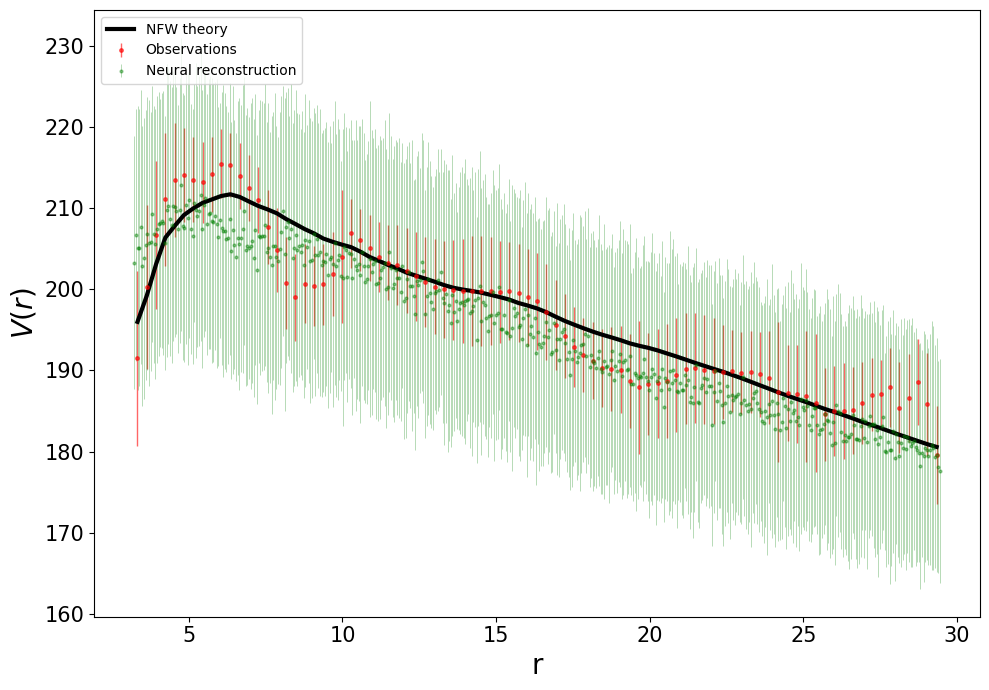

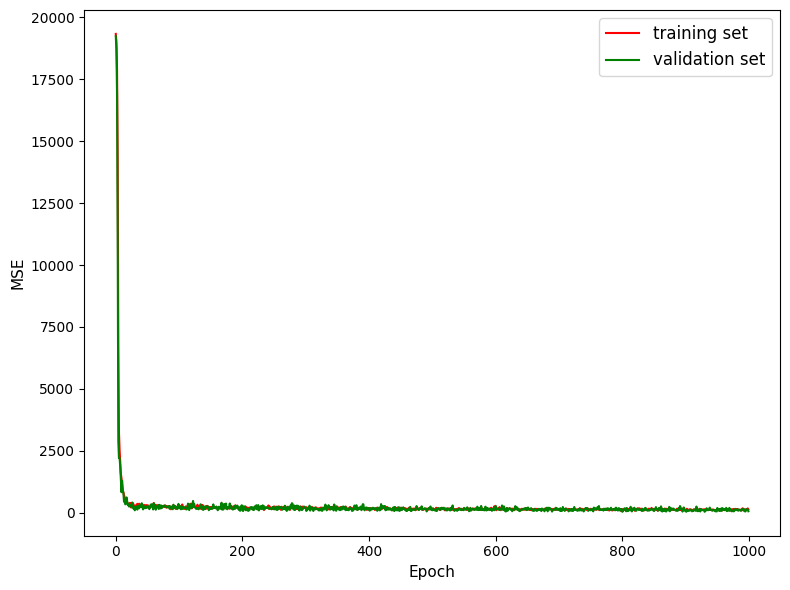

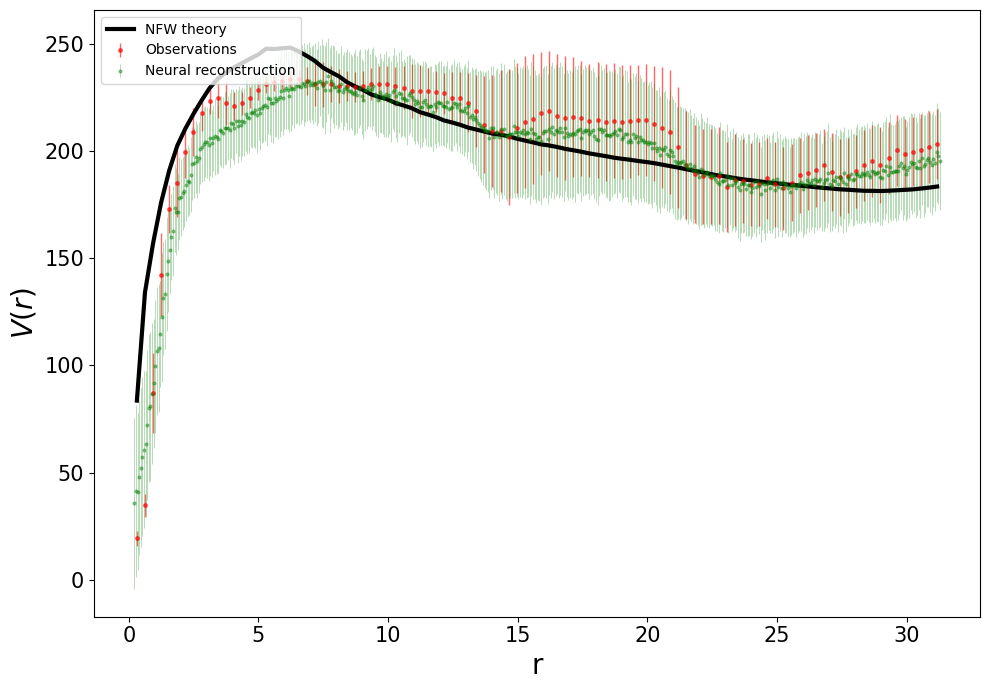

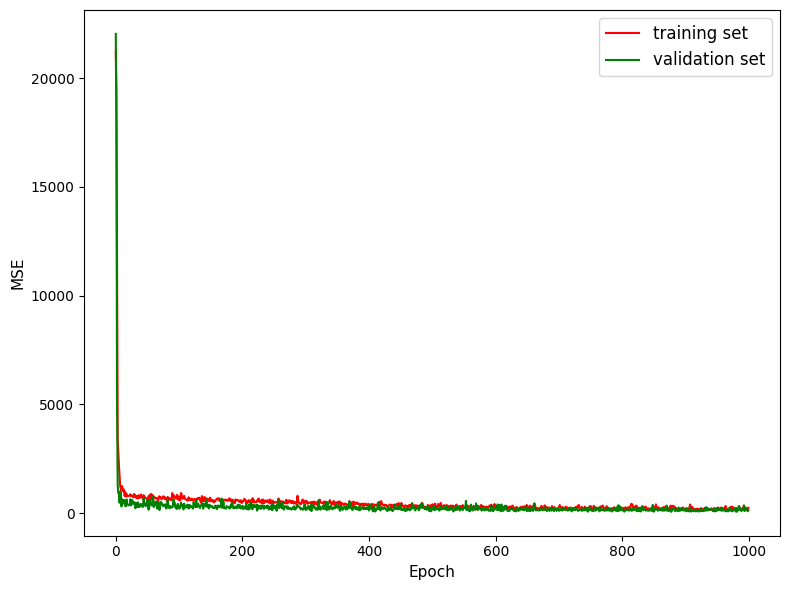

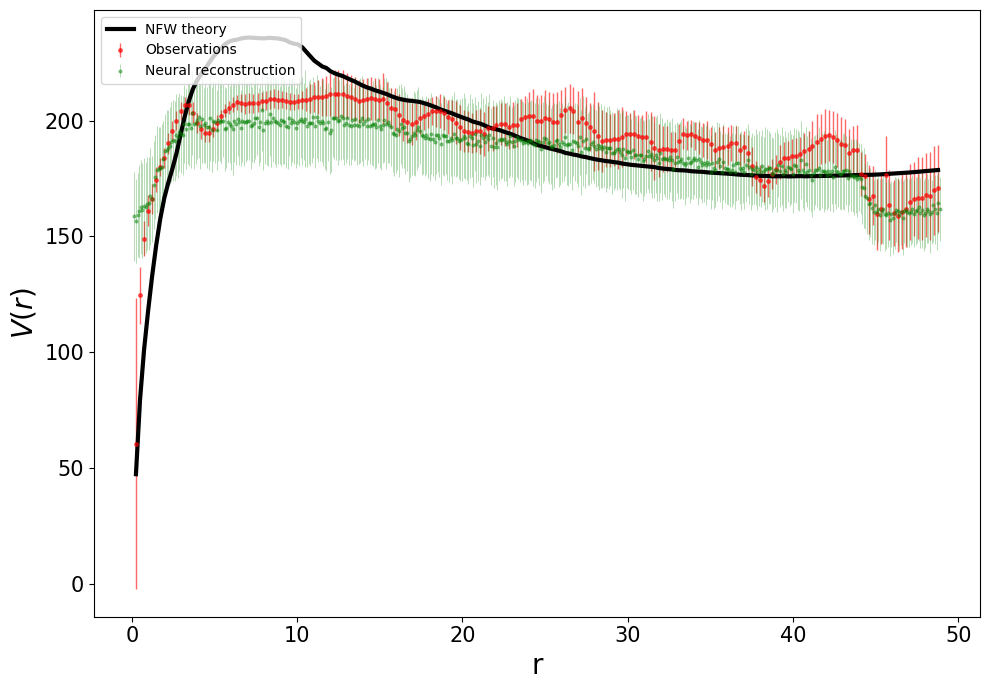

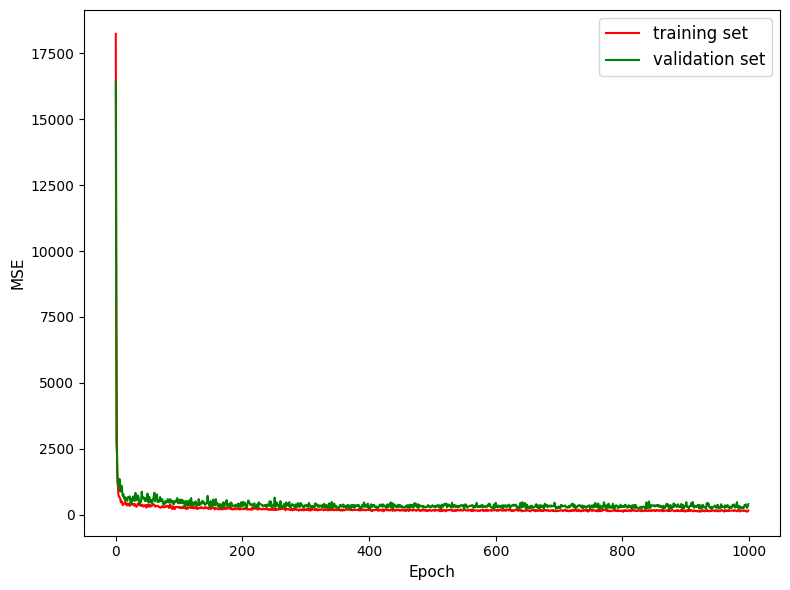

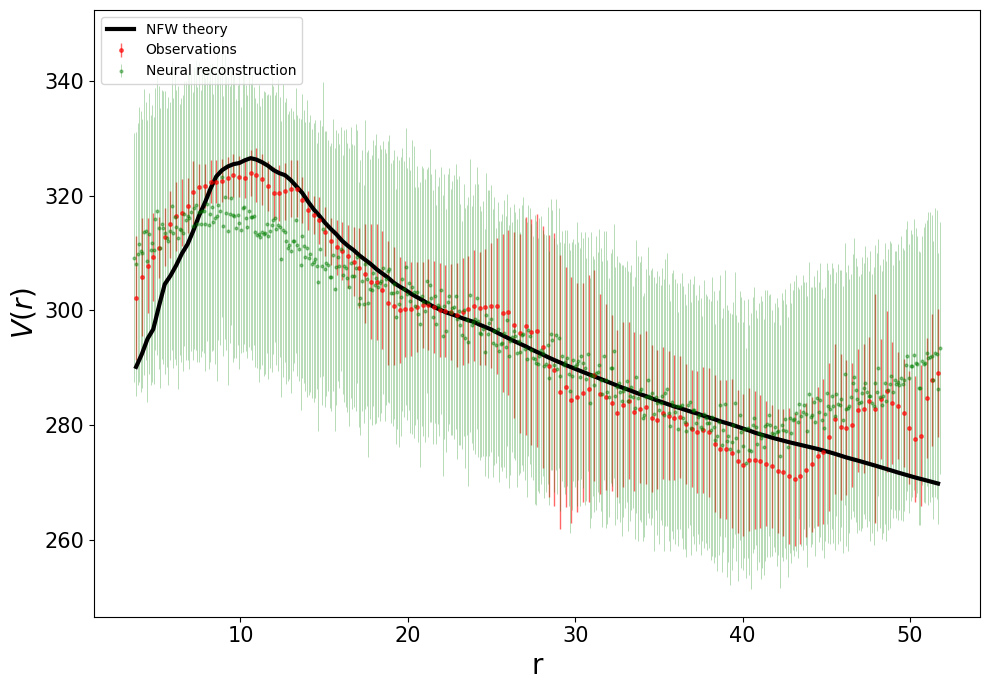

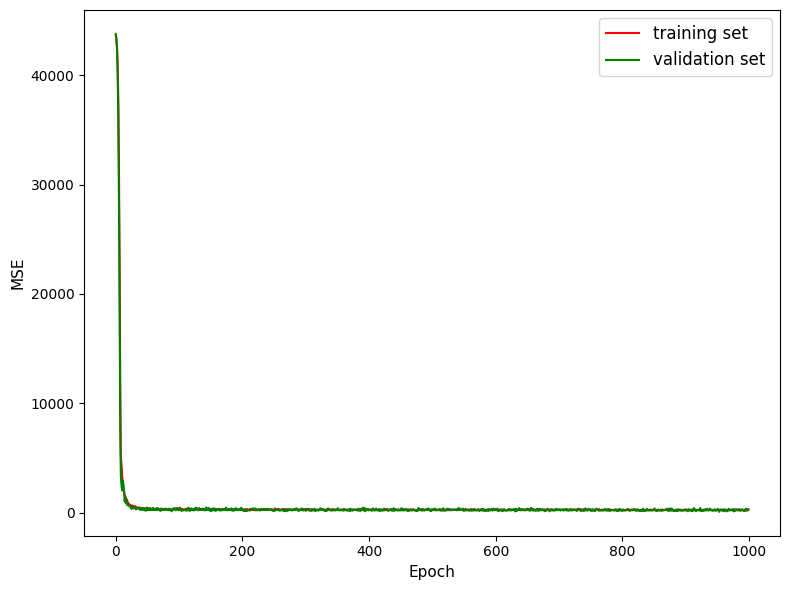

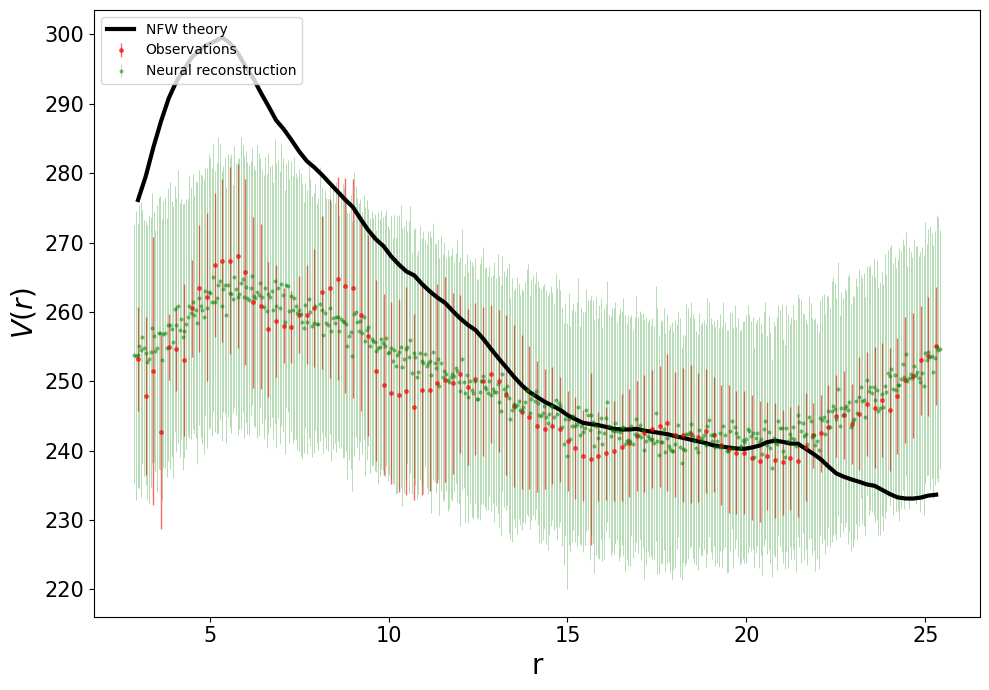

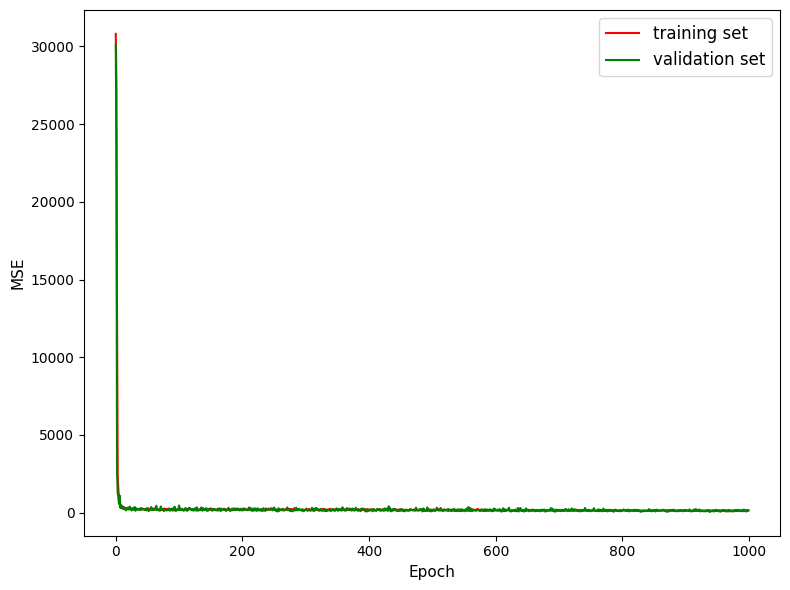

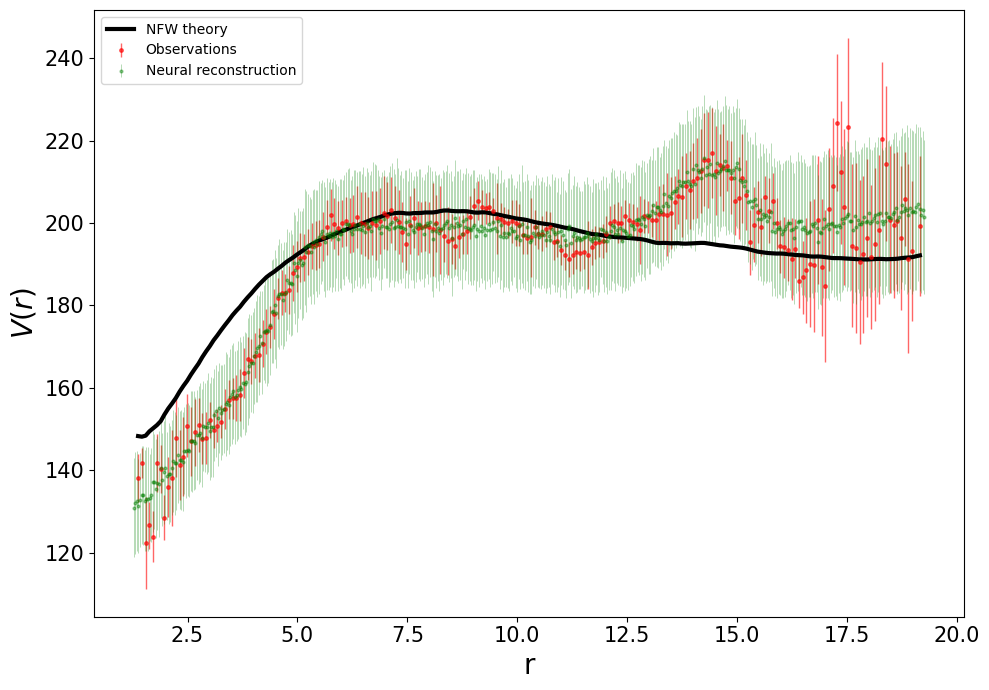

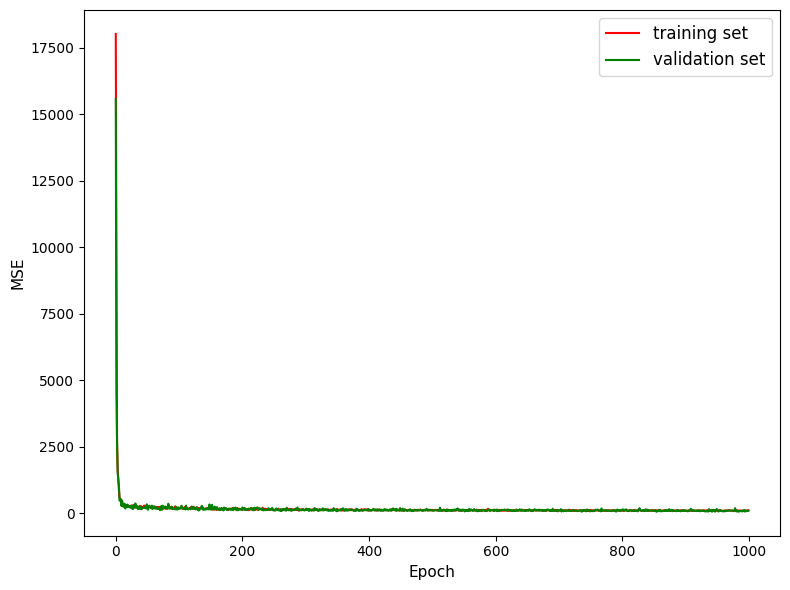

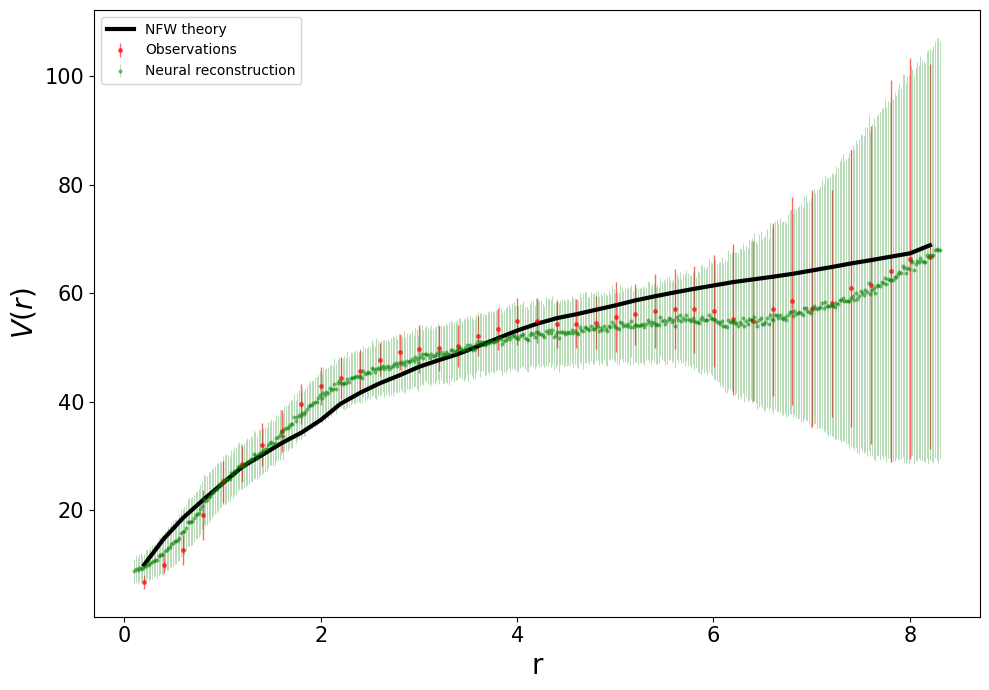

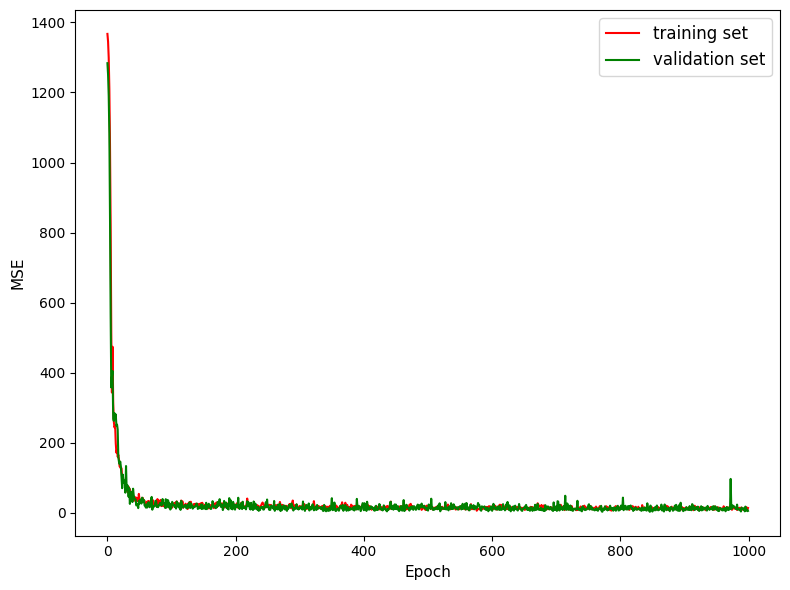

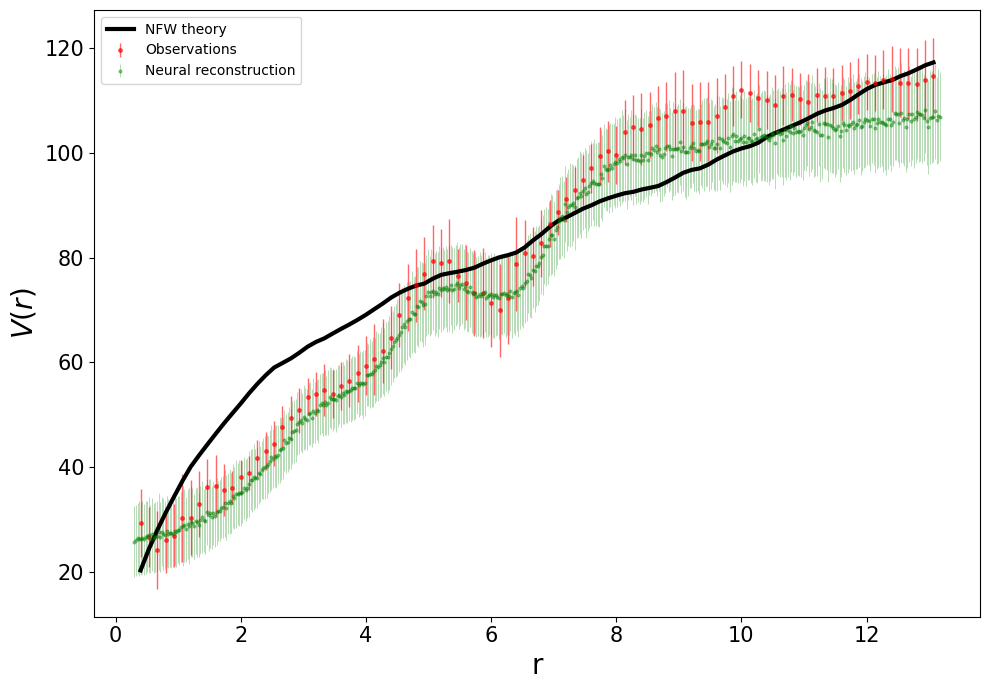

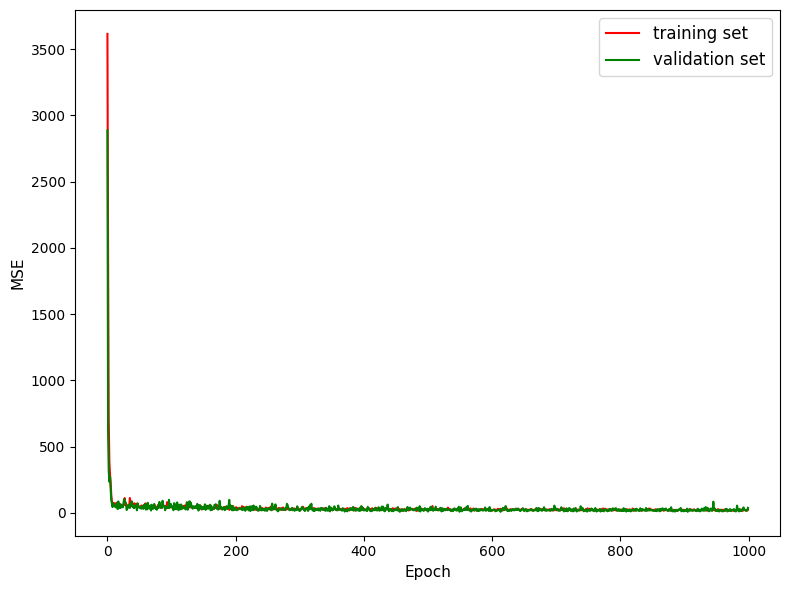

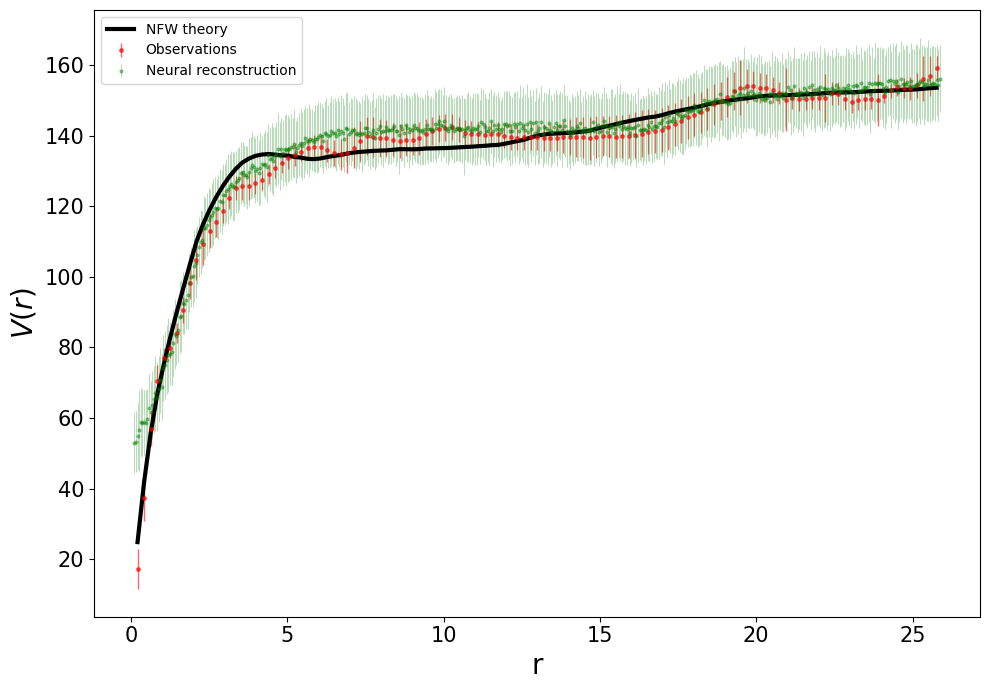

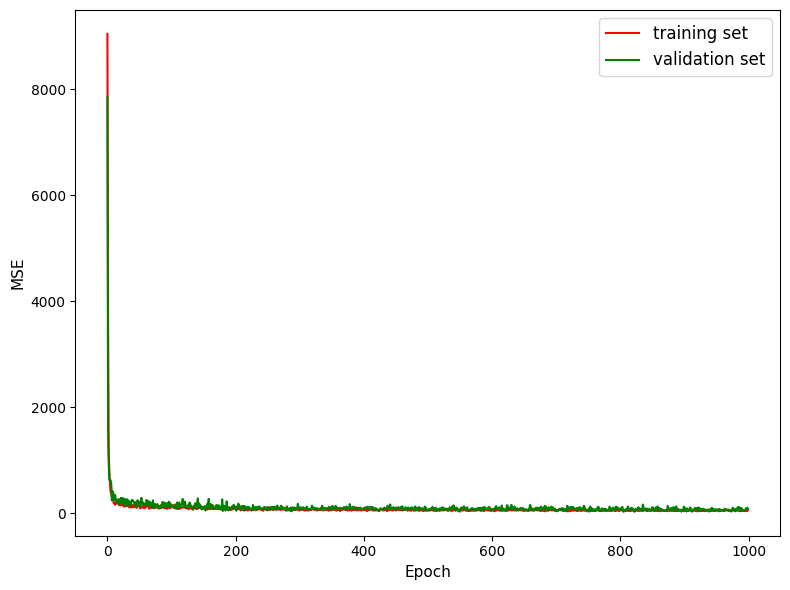

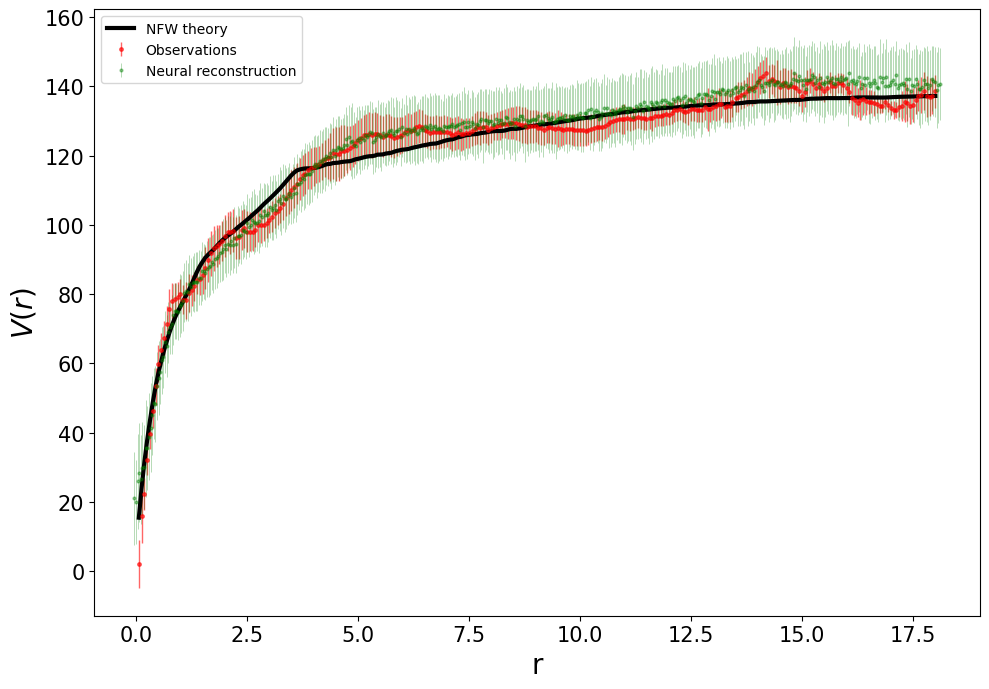

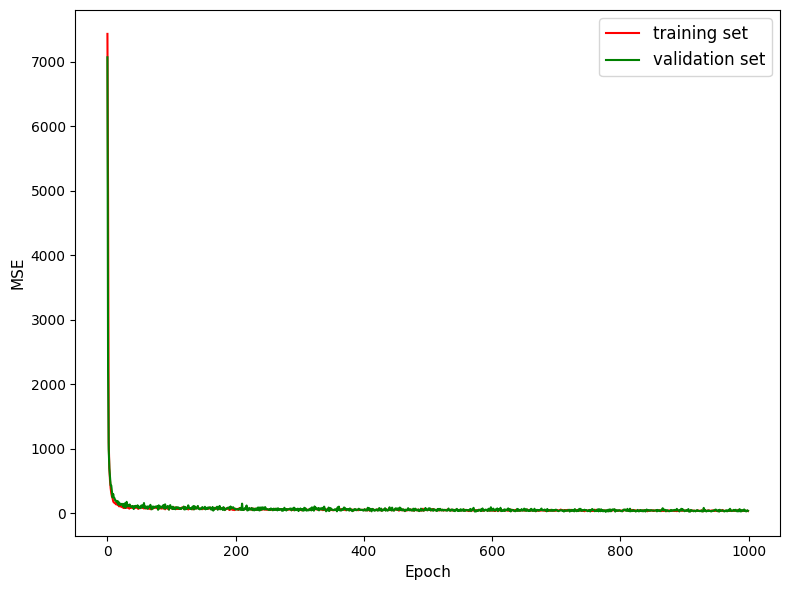

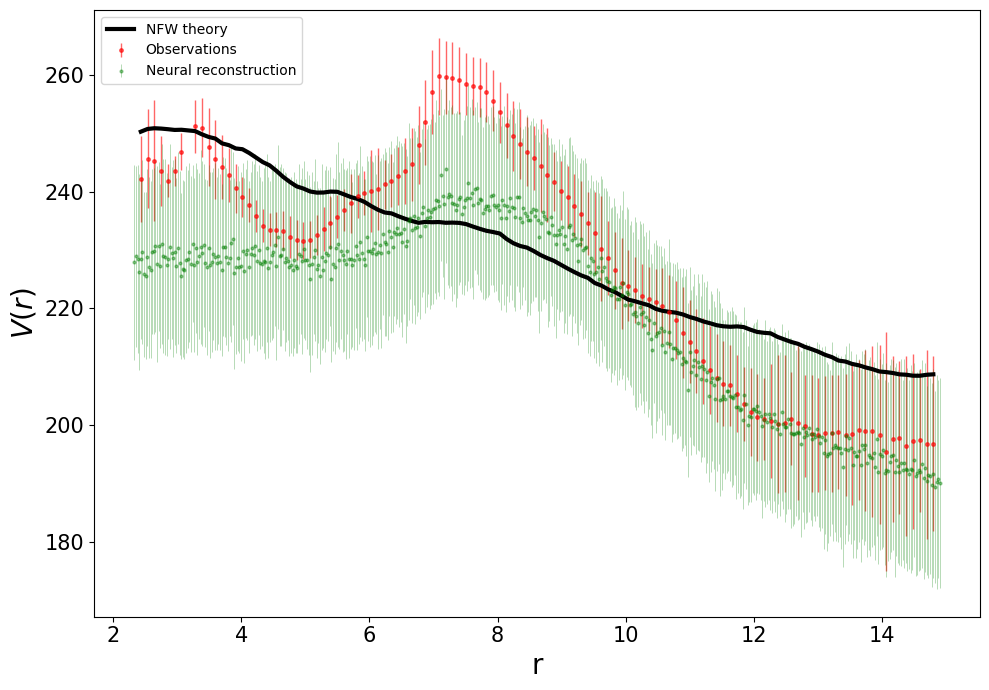

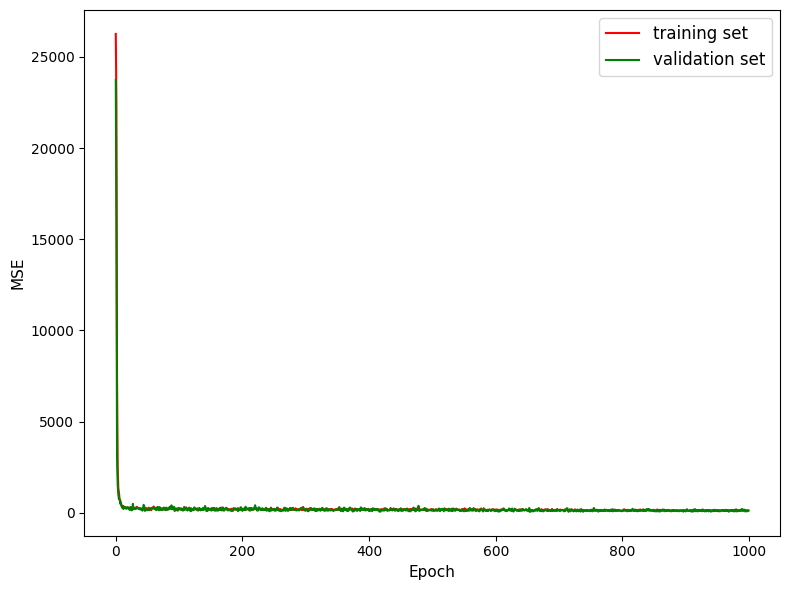

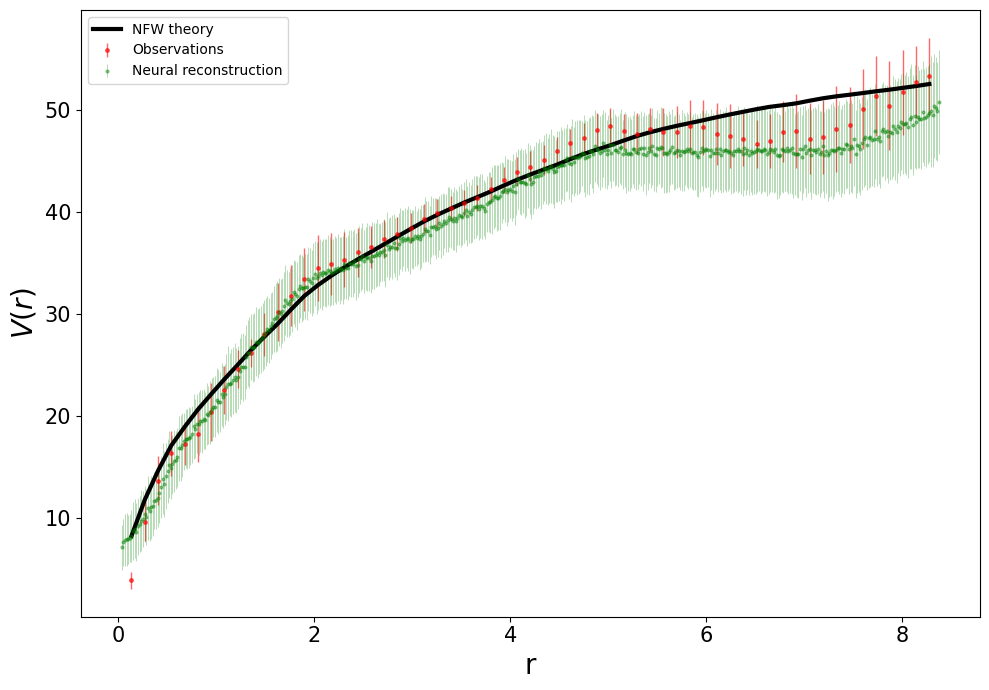

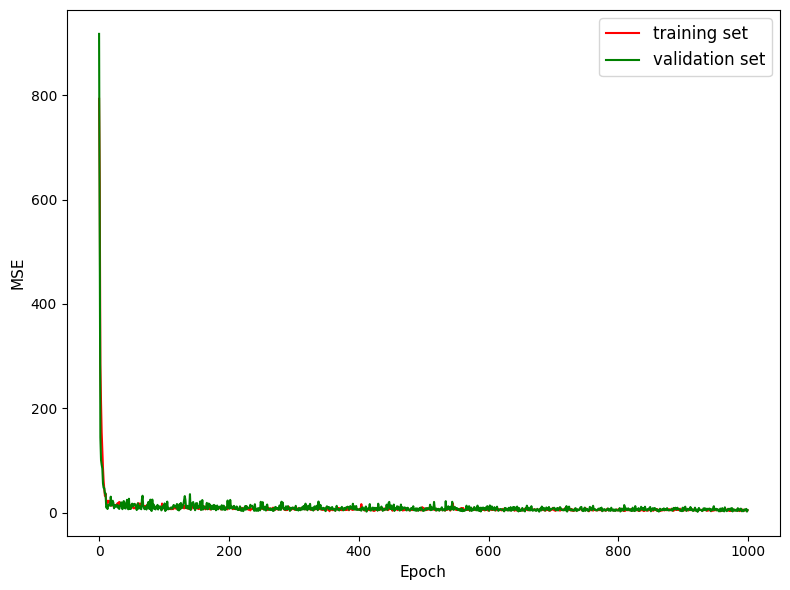

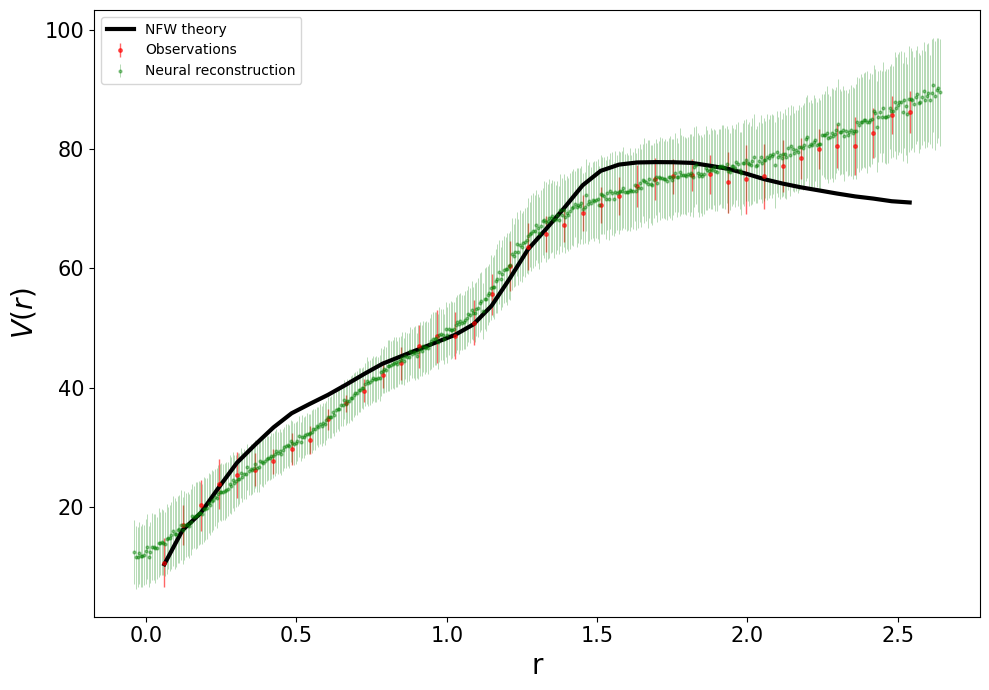

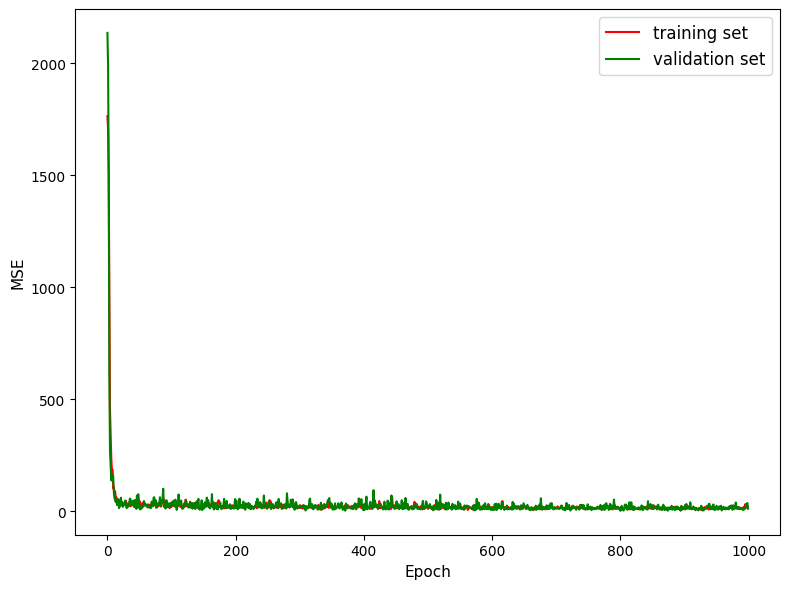

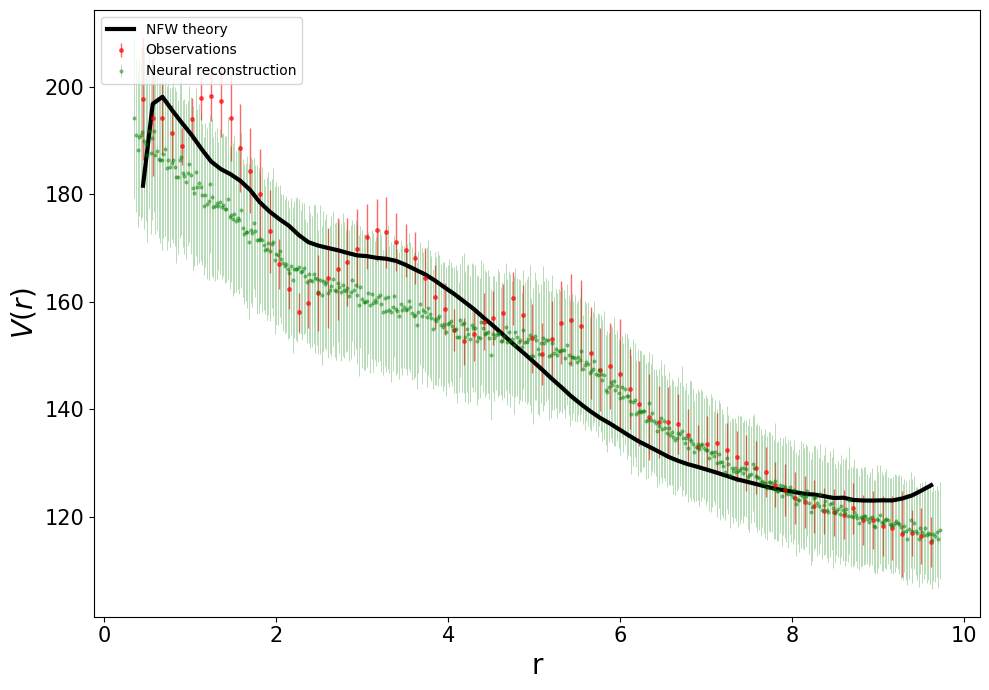

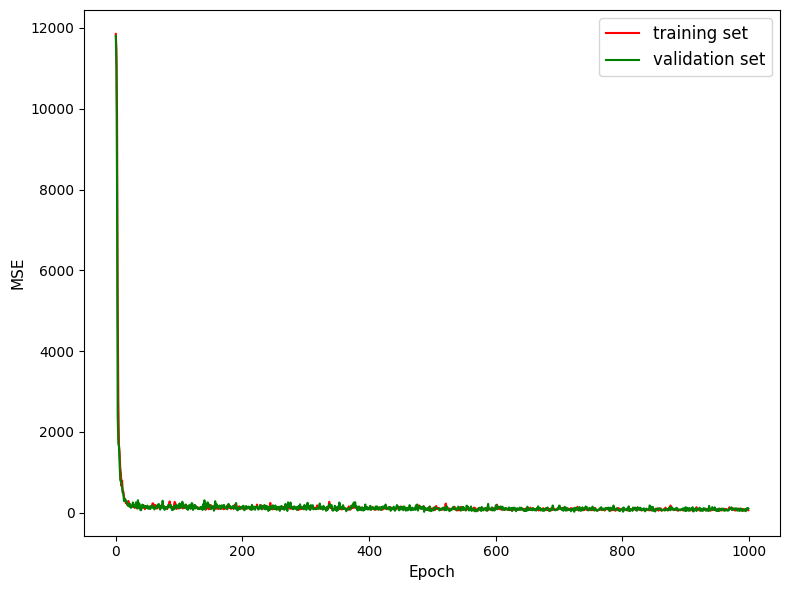

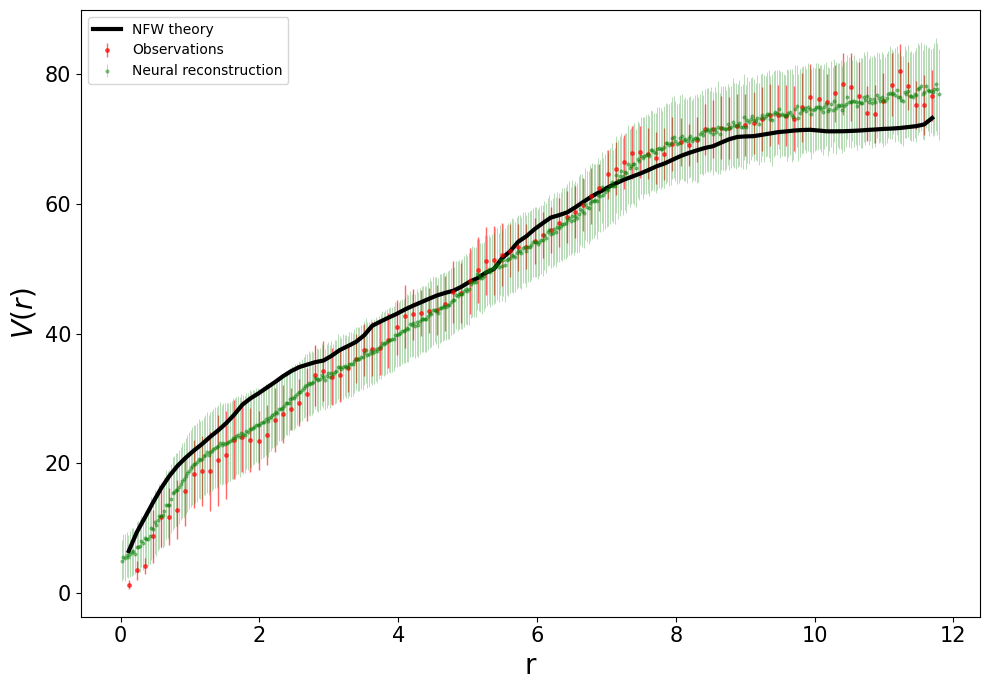

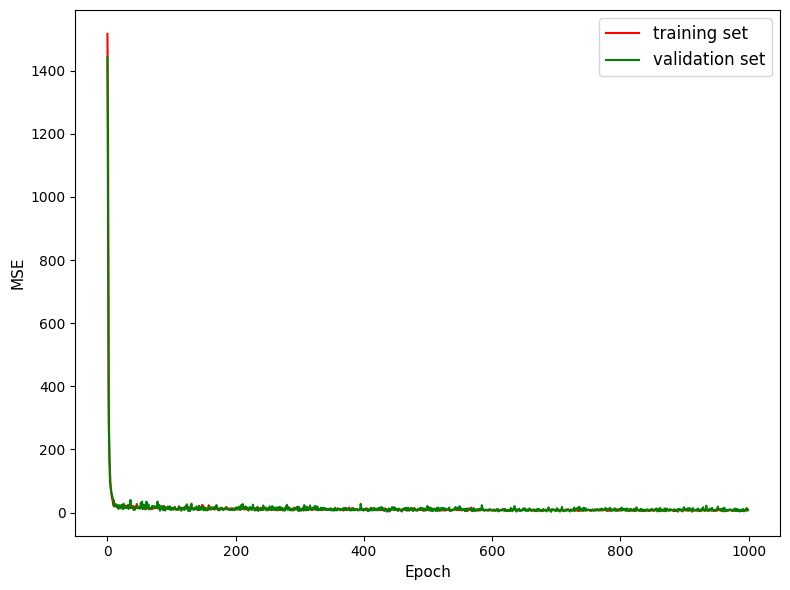

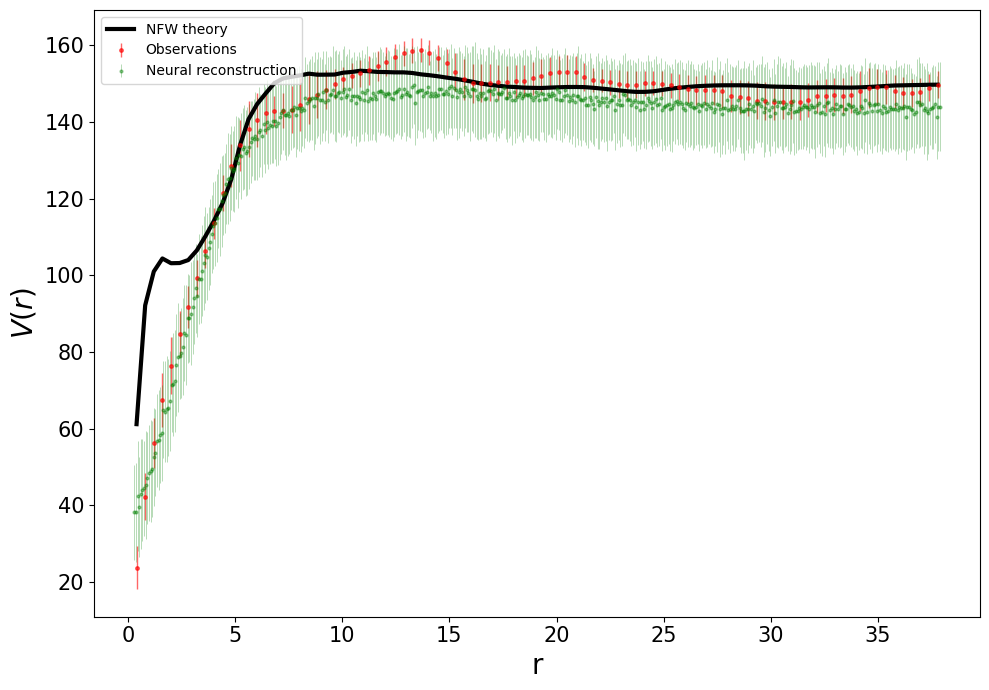

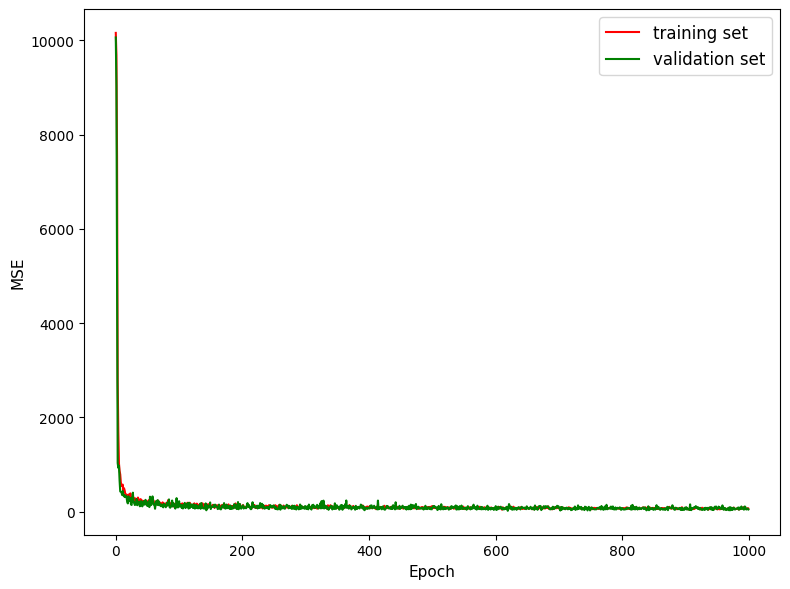

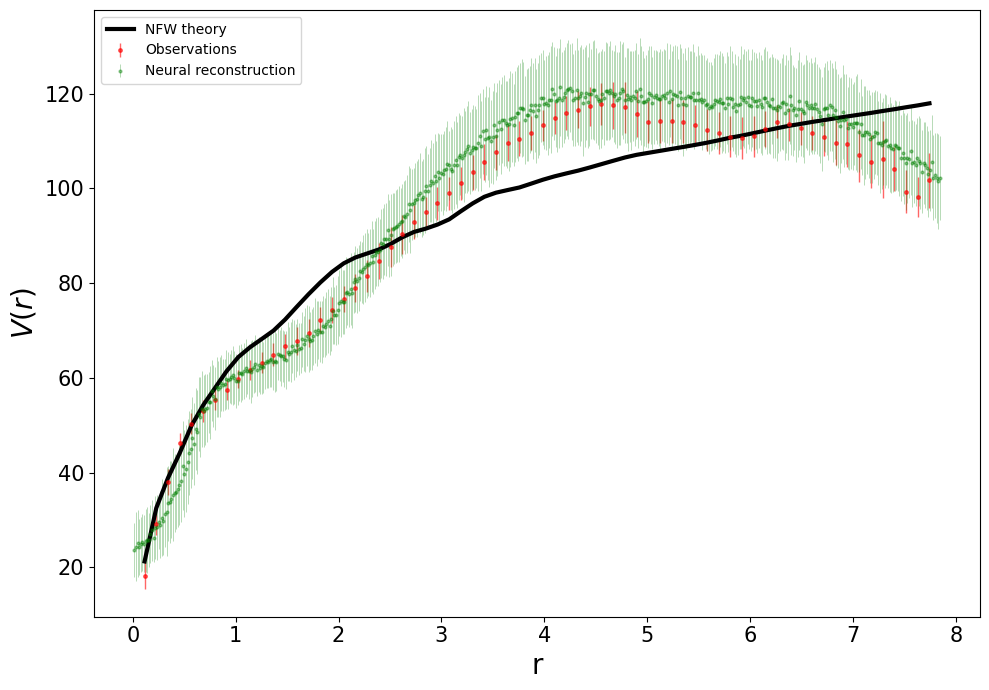

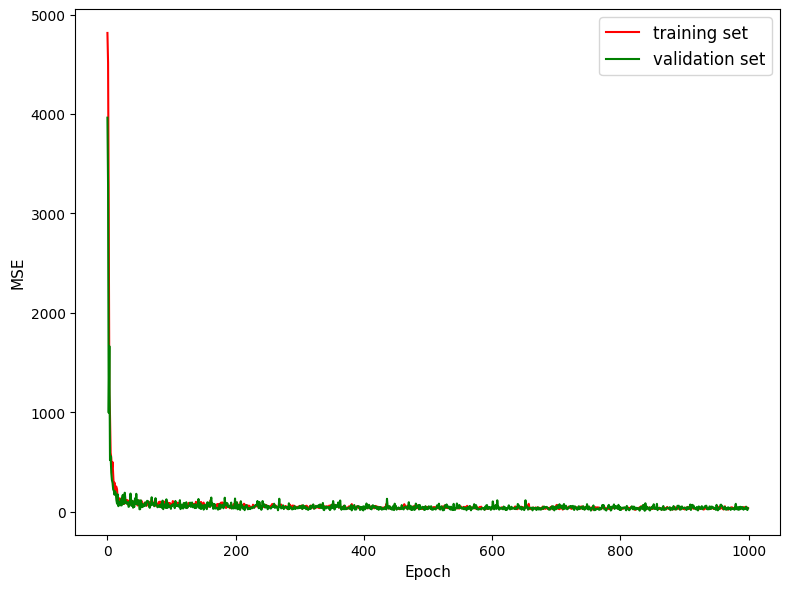

In [6]:
history_all = []

for idx, file in enumerate(files):
    print("Model {}/{}".format(idx+1, len(files)))
    print("-"*10)
    
    history_ind = {}
    
    data = np.loadtxt(files[idx], skiprows=12) 
    df = pd.DataFrame(data, columns=['Radius', 'vgas', 'vdisk', 'vbulge', 
                                     'vobs', 'err_vobs', 'Vu', 'Vt','Rxv', 'Vxy'])
    N = len(df.values)
    df = df[['Radius', 'vobs','err_vobs', 'Vt']]


    randomize = np.random.permutation(N)
    data = df.values[randomize]

    z = data[:,0]
    y = data[:,1:3]
    
    scalerz = StandardScaler()
    scalerz.fit(z.reshape(-1,1))
    # apply transform
    z = scalerz.transform(z.reshape(-1,1))
    
    split = 0.8
    ntrain = int(split * len(z))
    indx = [ntrain]
    z_train, z_test = np.split(z, indx)
    y_train, y_test = np.split(y, indx)
    
    print("X_train shape: {} | y_train shape: {} | x_val shape: {} | y_val shape: {}".format(np.shape(z_train), 
                                                                                             np.shape(y_train), 
                                                                                             np.shape(z_test), 
                                                                                             np.shape(y_test)))

    population_size = 6  # max of individuals per generation
    max_generations = 8    # number of generations
    gene_length = 8        # lenght of the gene, depends on how many hiperparameters are tested 2*hyp
    k = 1                  # num. of finalist individuals

    # Define the hyperparameters for the search
    hyperparams = {'deep': [3, 4], 'num_units': [50, 100, 150, 200], 'batch_size': [4, 8, 16, 32]}

    # generate a Nnogada instance
    net_fit = Nnogada(hyp_to_find=hyperparams, X_train=z_train, Y_train=y_train, X_val=z_test, Y_val=y_test, 
                      neural_library='keras', regression=True)
    # Set the possible values of hyperparameters and not use the default values from hyperparameters.py
    net_fit.set_hyperparameters()
          
    best_population = net_fit.ga_with_elitism(population_size, max_generations, gene_length, k)
          
    deep = int(best_population['deep'])
    num_units = int(best_population['num_units'])
    batch_size = int(best_population['batch_size'])
            
    optimizer = Adam(lr=0.0005)
    
    model = model_regression_dropout(num_hidden_layers=deep, num_nodes=num_units)

    # Compile Keras model
    model.compile(loss='mse', optimizer=optimizer)  
    model_train = model.fit(z_train, y_train, batch_size=batch_size,
                            epochs=1000,verbose=1,
                            validation_data=(z_test, y_test))
                     
    history_ind['idx'] = idx
    history_ind['deep'] = deep
    history_ind['batch_size'] = batch_size
    history_ind['num_units'] = num_units
    history_ind['val_loss'] = model_train.history['val_loss'][-1]
          
    history_all.append(history_ind)   
         
    model.save('models/RC_model_{}.h5'.format(idx+1))
  
    # Generate test data
    test_batch_size = 500
    # x_test = np.random.uniform(0, 2., test_batch_size)
    x_test = np.linspace(min(df['Radius'].values)-0.1, max(df['Radius'].values)+0.1, test_batch_size)

    mc_dropout_num = 100  # Run Dropout 100 times
    predictions = np.zeros((mc_dropout_num, test_batch_size, 2))
    for i in range(mc_dropout_num):
        predictions[i] = model.predict(scalerz.transform(x_test.reshape(-1,1)))

    # get mean results and its varience
    prediction_mc_dropout = np.mean(predictions, axis=0)
    std_mc_dropout = np.std(predictions, axis=0)
    
    # plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    overlapping = 0.6
    # Plotting
    plt.figure(figsize=(10, 7), dpi=100)
    sigma = np.sqrt(std_mc_dropout[:, 0]**2 + std_mc_dropout[:, 1]**2+ prediction_mc_dropout[:,1]**2)

    plt.plot(df['Radius'].values, df['Vt'].values, color='k', linewidth=3, label='NFW theory',alpha=1)

    plt.errorbar(df['Radius'].values, df['vobs'].values, yerr=df['err_vobs'].values, fmt='.', 
                 color='red', elinewidth=1, ecolor='red', markersize=5, label='Observations', alpha=overlapping)

    plt.errorbar(x_test, prediction_mc_dropout[:,0], yerr=sigma, markersize=2, fmt='o', 
                 ecolor='green', capthick=2, elinewidth=0.5, alpha=overlapping-0.2, c='green',
                 label='Neural reconstruction')


    plt.ylabel("$V(r)$", fontsize=20)
    plt.xlabel("r", fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.legend(loc='upper left')
    plt.tight_layout()

    plt.savefig("neural_reconstruction_RC_{}.png".format(idx+1), dpi=100)
          
    plt.figure(figsize=(8, 6), dpi=100)

    plt.plot(model_train.history['loss'], color='r', )
    plt.plot(model_train.history['val_loss'], color='g')

    plt.ylabel('MSE', fontsize=11)
    plt.xlabel('Epoch', fontsize=11)
    plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
    plt.xticks(fontsize=10)
    plt.savefig('loss_fn_neural_RC_{}'.format(idx+1), dpi=100)
    print("-"*10)
    # plt.ylim(0, 200)

